In [1]:
from google.colab import drive #Only if you are using Google Drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
%cd /content/gdrive/My\ Drive/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:
! ls -al /content/gdrive/MyDrive/devwav | wc

ls: cannot open directory '/content/gdrive/MyDrive/devwav': Input/output error
      0       0       0


In [2]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import time
devf = '/content/gdrive/My Drive/dev.csv'
devcsv = pd.read_csv(devf)
dfdev = pd.DataFrame(devcsv)
dftest = dfdev[dfdev['split'] == 'val'].copy()
print(dftest.info())
print(dftest.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4170 entries, 5 to 40898
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fname   4170 non-null   int64 
 1   labels  4170 non-null   object
 2   mids    4170 non-null   object
 3   split   4170 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.9+ KB
None
     fname                                             labels  \
5   345111  Electric_guitar,Guitar,Plucked_string_instrume...   
9   160826  Electric_guitar,Guitar,Plucked_string_instrume...   
13  420945  Electric_guitar,Guitar,Plucked_string_instrume...   
14  420946  Electric_guitar,Guitar,Plucked_string_instrume...   
15  420947  Electric_guitar,Guitar,Plucked_string_instrume...   

                                             mids split  
5   /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf   val  
9   /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf   val  
13  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf   val

In [3]:
dev_audio_dir = '/content/gdrive/MyDrive/devwav/'
dev_png_dir = '/content/gdrive/MyDrive/trainpng4/'
dftest["wavfiles"] = dftest.apply(lambda row: dev_audio_dir+str(row.fname)+'.wav', axis=1)
dftest["figfiles"] = dftest.apply(lambda row: dev_png_dir+str(row.fname)+'.png', axis=1)

dftest.info()
dftest.head()
startime = time.ctime()
print(time.ctime())
srhz=44100
frame_size = int(srhz/1000*960)
frame_shift = int(srhz/1000*25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4170 entries, 5 to 40898
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     4170 non-null   int64 
 1   labels    4170 non-null   object
 2   mids      4170 non-null   object
 3   split     4170 non-null   object
 4   wavfiles  4170 non-null   object
 5   figfiles  4170 non-null   object
dtypes: int64(1), object(5)
memory usage: 228.0+ KB
Fri Apr 29 04:23:15 2022


In [4]:
rowcount=dftest.shape[0]
print(rowcount)
df_1 = dftest.iloc[:2000,:]
df_2 = dftest.iloc[2001:4000,:]
df_3 = dftest.iloc[4001:,:]

4170


In [5]:
def generate_melspec(df):
  filect = 0
  for i in df.itertuples():
    filect = filect+1
    file = i[5]
    #print('wav file: '+file)
    pngfile = i[6]
    #print('png file: '+pngfile)
    print('FileCount = '+str(filect)+': Working on spectogram '+pngfile)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    hop_length = 11025 # in num. of samples
    n_fft = 42336 # window in num. of samples
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
    log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    fig2.set_size_inches(2.9, 2.98)
    #plt.imshow(cmap='gray_r')
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

Fri Apr 29 04:23:22 2022
Working on subset from df_1
FileCount = 1: Working on spectogram /content/gdrive/MyDrive/trainpng4/345111.png
FileCount = 2: Working on spectogram /content/gdrive/MyDrive/trainpng4/160826.png
FileCount = 3: Working on spectogram /content/gdrive/MyDrive/trainpng4/420945.png
FileCount = 4: Working on spectogram /content/gdrive/MyDrive/trainpng4/420946.png
FileCount = 5: Working on spectogram /content/gdrive/MyDrive/trainpng4/420947.png
FileCount = 6: Working on spectogram /content/gdrive/MyDrive/trainpng4/86100.png
FileCount = 7: Working on spectogram /content/gdrive/MyDrive/trainpng4/51319.png
FileCount = 8: Working on spectogram /content/gdrive/MyDrive/trainpng4/193768.png
FileCount = 9: Working on spectogram /content/gdrive/MyDrive/trainpng4/232713.png
FileCount = 10: Working on spectogram /content/gdrive/MyDrive/trainpng4/232715.png
FileCount = 11: Working on spectogram /content/gdrive/MyDrive/trainpng4/232717.png
FileCount = 12: Working on spectogram /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35351
  n_fft, y.shape[-1]


FileCount = 46: Working on spectogram /content/gdrive/MyDrive/trainpng4/378579.png
FileCount = 47: Working on spectogram /content/gdrive/MyDrive/trainpng4/265983.png
FileCount = 48: Working on spectogram /content/gdrive/MyDrive/trainpng4/265984.png
FileCount = 49: Working on spectogram /content/gdrive/MyDrive/trainpng4/265986.png
FileCount = 50: Working on spectogram /content/gdrive/MyDrive/trainpng4/265988.png
FileCount = 51: Working on spectogram /content/gdrive/MyDrive/trainpng4/266025.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37223
  n_fft, y.shape[-1]


FileCount = 52: Working on spectogram /content/gdrive/MyDrive/trainpng4/266026.png
FileCount = 53: Working on spectogram /content/gdrive/MyDrive/trainpng4/183553.png
FileCount = 54: Working on spectogram /content/gdrive/MyDrive/trainpng4/183556.png
FileCount = 55: Working on spectogram /content/gdrive/MyDrive/trainpng4/237088.png
FileCount = 56: Working on spectogram /content/gdrive/MyDrive/trainpng4/275366.png
FileCount = 57: Working on spectogram /content/gdrive/MyDrive/trainpng4/18350.png
FileCount = 58: Working on spectogram /content/gdrive/MyDrive/trainpng4/18351.png
FileCount = 59: Working on spectogram /content/gdrive/MyDrive/trainpng4/18352.png
FileCount = 60: Working on spectogram /content/gdrive/MyDrive/trainpng4/18353.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41984
  n_fft, y.shape[-1]


FileCount = 61: Working on spectogram /content/gdrive/MyDrive/trainpng4/18354.png
FileCount = 62: Working on spectogram /content/gdrive/MyDrive/trainpng4/18355.png
FileCount = 63: Working on spectogram /content/gdrive/MyDrive/trainpng4/18356.png
FileCount = 64: Working on spectogram /content/gdrive/MyDrive/trainpng4/158649.png
FileCount = 65: Working on spectogram /content/gdrive/MyDrive/trainpng4/158650.png
FileCount = 66: Working on spectogram /content/gdrive/MyDrive/trainpng4/158651.png
FileCount = 67: Working on spectogram /content/gdrive/MyDrive/trainpng4/174080.png
FileCount = 68: Working on spectogram /content/gdrive/MyDrive/trainpng4/16427.png
FileCount = 69: Working on spectogram /content/gdrive/MyDrive/trainpng4/16428.png
FileCount = 70: Working on spectogram /content/gdrive/MyDrive/trainpng4/208948.png
FileCount = 71: Working on spectogram /content/gdrive/MyDrive/trainpng4/118862.png
FileCount = 72: Working on spectogram /content/gdrive/MyDrive/trainpng4/52307.png
FileCount 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13670
  n_fft, y.shape[-1]


FileCount = 81: Working on spectogram /content/gdrive/MyDrive/trainpng4/323809.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39730
  n_fft, y.shape[-1]


FileCount = 82: Working on spectogram /content/gdrive/MyDrive/trainpng4/83189.png
FileCount = 83: Working on spectogram /content/gdrive/MyDrive/trainpng4/335099.png
FileCount = 84: Working on spectogram /content/gdrive/MyDrive/trainpng4/151842.png
FileCount = 85: Working on spectogram /content/gdrive/MyDrive/trainpng4/432422.png
FileCount = 86: Working on spectogram /content/gdrive/MyDrive/trainpng4/133426.png
FileCount = 87: Working on spectogram /content/gdrive/MyDrive/trainpng4/407890.png
FileCount = 88: Working on spectogram /content/gdrive/MyDrive/trainpng4/325970.png
FileCount = 89: Working on spectogram /content/gdrive/MyDrive/trainpng4/250194.png
FileCount = 90: Working on spectogram /content/gdrive/MyDrive/trainpng4/250195.png
FileCount = 91: Working on spectogram /content/gdrive/MyDrive/trainpng4/366930.png
FileCount = 92: Working on spectogram /content/gdrive/MyDrive/trainpng4/207196.png
FileCount = 93: Working on spectogram /content/gdrive/MyDrive/trainpng4/168307.png
FileC

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16622
  n_fft, y.shape[-1]


FileCount = 95: Working on spectogram /content/gdrive/MyDrive/trainpng4/97373.png
FileCount = 96: Working on spectogram /content/gdrive/MyDrive/trainpng4/207293.png
FileCount = 97: Working on spectogram /content/gdrive/MyDrive/trainpng4/50631.png
FileCount = 98: Working on spectogram /content/gdrive/MyDrive/trainpng4/185812.png
FileCount = 99: Working on spectogram /content/gdrive/MyDrive/trainpng4/190945.png
FileCount = 100: Working on spectogram /content/gdrive/MyDrive/trainpng4/214510.png
FileCount = 101: Working on spectogram /content/gdrive/MyDrive/trainpng4/196124.png
FileCount = 102: Working on spectogram /content/gdrive/MyDrive/trainpng4/395824.png
FileCount = 103: Working on spectogram /content/gdrive/MyDrive/trainpng4/368203.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13937
  n_fft, y.shape[-1]


FileCount = 104: Working on spectogram /content/gdrive/MyDrive/trainpng4/198243.png
FileCount = 105: Working on spectogram /content/gdrive/MyDrive/trainpng4/268930.png
FileCount = 106: Working on spectogram /content/gdrive/MyDrive/trainpng4/167564.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16910
  n_fft, y.shape[-1]


FileCount = 107: Working on spectogram /content/gdrive/MyDrive/trainpng4/167565.png
FileCount = 108: Working on spectogram /content/gdrive/MyDrive/trainpng4/85645.png
FileCount = 109: Working on spectogram /content/gdrive/MyDrive/trainpng4/67255.png
FileCount = 110: Working on spectogram /content/gdrive/MyDrive/trainpng4/366306.png
FileCount = 111: Working on spectogram /content/gdrive/MyDrive/trainpng4/160502.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20924
  n_fft, y.shape[-1]


FileCount = 112: Working on spectogram /content/gdrive/MyDrive/trainpng4/421627.png
FileCount = 113: Working on spectogram /content/gdrive/MyDrive/trainpng4/428815.png
FileCount = 114: Working on spectogram /content/gdrive/MyDrive/trainpng4/94993.png
FileCount = 115: Working on spectogram /content/gdrive/MyDrive/trainpng4/391988.png
FileCount = 116: Working on spectogram /content/gdrive/MyDrive/trainpng4/185145.png
FileCount = 117: Working on spectogram /content/gdrive/MyDrive/trainpng4/29524.png
FileCount = 118: Working on spectogram /content/gdrive/MyDrive/trainpng4/33624.png
FileCount = 119: Working on spectogram /content/gdrive/MyDrive/trainpng4/131935.png
FileCount = 120: Working on spectogram /content/gdrive/MyDrive/trainpng4/181189.png
FileCount = 121: Working on spectogram /content/gdrive/MyDrive/trainpng4/272335.png
FileCount = 122: Working on spectogram /content/gdrive/MyDrive/trainpng4/191457.png
FileCount = 123: Working on spectogram /content/gdrive/MyDrive/trainpng4/46059.

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18049
  n_fft, y.shape[-1]


FileCount = 138: Working on spectogram /content/gdrive/MyDrive/trainpng4/331540.png
FileCount = 139: Working on spectogram /content/gdrive/MyDrive/trainpng4/331542.png
FileCount = 140: Working on spectogram /content/gdrive/MyDrive/trainpng4/381775.png
FileCount = 141: Working on spectogram /content/gdrive/MyDrive/trainpng4/399254.png
FileCount = 142: Working on spectogram /content/gdrive/MyDrive/trainpng4/117165.png
FileCount = 143: Working on spectogram /content/gdrive/MyDrive/trainpng4/254907.png
FileCount = 144: Working on spectogram /content/gdrive/MyDrive/trainpng4/221644.png
FileCount = 145: Working on spectogram /content/gdrive/MyDrive/trainpng4/379754.png
FileCount = 146: Working on spectogram /content/gdrive/MyDrive/trainpng4/162443.png
FileCount = 147: Working on spectogram /content/gdrive/MyDrive/trainpng4/268015.png
FileCount = 148: Working on spectogram /content/gdrive/MyDrive/trainpng4/151359.png
FileCount = 149: Working on spectogram /content/gdrive/MyDrive/trainpng4/138

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26368
  n_fft, y.shape[-1]


FileCount = 179: Working on spectogram /content/gdrive/MyDrive/trainpng4/268221.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31362
  n_fft, y.shape[-1]


FileCount = 180: Working on spectogram /content/gdrive/MyDrive/trainpng4/353265.png
FileCount = 181: Working on spectogram /content/gdrive/MyDrive/trainpng4/156031.png
FileCount = 182: Working on spectogram /content/gdrive/MyDrive/trainpng4/62936.png
FileCount = 183: Working on spectogram /content/gdrive/MyDrive/trainpng4/62940.png
FileCount = 184: Working on spectogram /content/gdrive/MyDrive/trainpng4/62942.png
FileCount = 185: Working on spectogram /content/gdrive/MyDrive/trainpng4/62944.png
FileCount = 186: Working on spectogram /content/gdrive/MyDrive/trainpng4/132918.png
FileCount = 187: Working on spectogram /content/gdrive/MyDrive/trainpng4/120527.png
FileCount = 188: Working on spectogram /content/gdrive/MyDrive/trainpng4/109754.png
FileCount = 189: Working on spectogram /content/gdrive/MyDrive/trainpng4/407060.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39547
  n_fft, y.shape[-1]


FileCount = 190: Working on spectogram /content/gdrive/MyDrive/trainpng4/161813.png
FileCount = 191: Working on spectogram /content/gdrive/MyDrive/trainpng4/189504.png
FileCount = 192: Working on spectogram /content/gdrive/MyDrive/trainpng4/19035.png
FileCount = 193: Working on spectogram /content/gdrive/MyDrive/trainpng4/181355.png
FileCount = 194: Working on spectogram /content/gdrive/MyDrive/trainpng4/76934.png
FileCount = 195: Working on spectogram /content/gdrive/MyDrive/trainpng4/42142.png
FileCount = 196: Working on spectogram /content/gdrive/MyDrive/trainpng4/258237.png
FileCount = 197: Working on spectogram /content/gdrive/MyDrive/trainpng4/170750.png
FileCount = 198: Working on spectogram /content/gdrive/MyDrive/trainpng4/9508.png
FileCount = 199: Working on spectogram /content/gdrive/MyDrive/trainpng4/212787.png
FileCount = 200: Working on spectogram /content/gdrive/MyDrive/trainpng4/243519.png
FileCount = 201: Working on spectogram /content/gdrive/MyDrive/trainpng4/329041.p

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16053
  n_fft, y.shape[-1]


FileCount = 203: Working on spectogram /content/gdrive/MyDrive/trainpng4/186748.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33994
  n_fft, y.shape[-1]


FileCount = 204: Working on spectogram /content/gdrive/MyDrive/trainpng4/420223.png
FileCount = 205: Working on spectogram /content/gdrive/MyDrive/trainpng4/420229.png
FileCount = 206: Working on spectogram /content/gdrive/MyDrive/trainpng4/420230.png
FileCount = 207: Working on spectogram /content/gdrive/MyDrive/trainpng4/76683.png
FileCount = 208: Working on spectogram /content/gdrive/MyDrive/trainpng4/327047.png
FileCount = 209: Working on spectogram /content/gdrive/MyDrive/trainpng4/250317.png
FileCount = 210: Working on spectogram /content/gdrive/MyDrive/trainpng4/321489.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38588
  n_fft, y.shape[-1]


FileCount = 211: Working on spectogram /content/gdrive/MyDrive/trainpng4/319939.png
FileCount = 212: Working on spectogram /content/gdrive/MyDrive/trainpng4/323046.png
FileCount = 213: Working on spectogram /content/gdrive/MyDrive/trainpng4/395105.png
FileCount = 214: Working on spectogram /content/gdrive/MyDrive/trainpng4/391948.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27422
  n_fft, y.shape[-1]


FileCount = 215: Working on spectogram /content/gdrive/MyDrive/trainpng4/170899.png
FileCount = 216: Working on spectogram /content/gdrive/MyDrive/trainpng4/170901.png
FileCount = 217: Working on spectogram /content/gdrive/MyDrive/trainpng4/341178.png
FileCount = 218: Working on spectogram /content/gdrive/MyDrive/trainpng4/262233.png
FileCount = 219: Working on spectogram /content/gdrive/MyDrive/trainpng4/272492.png
FileCount = 220: Working on spectogram /content/gdrive/MyDrive/trainpng4/329016.png
FileCount = 221: Working on spectogram /content/gdrive/MyDrive/trainpng4/258367.png
FileCount = 222: Working on spectogram /content/gdrive/MyDrive/trainpng4/258371.png
FileCount = 223: Working on spectogram /content/gdrive/MyDrive/trainpng4/249168.png
FileCount = 224: Working on spectogram /content/gdrive/MyDrive/trainpng4/249170.png
FileCount = 225: Working on spectogram /content/gdrive/MyDrive/trainpng4/101857.png
FileCount = 226: Working on spectogram /content/gdrive/MyDrive/trainpng4/372

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35264
  n_fft, y.shape[-1]


FileCount = 228: Working on spectogram /content/gdrive/MyDrive/trainpng4/87632.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39890
  n_fft, y.shape[-1]


FileCount = 229: Working on spectogram /content/gdrive/MyDrive/trainpng4/87633.png
FileCount = 230: Working on spectogram /content/gdrive/MyDrive/trainpng4/87635.png
FileCount = 231: Working on spectogram /content/gdrive/MyDrive/trainpng4/87680.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41472
  n_fft, y.shape[-1]


FileCount = 232: Working on spectogram /content/gdrive/MyDrive/trainpng4/87681.png
FileCount = 233: Working on spectogram /content/gdrive/MyDrive/trainpng4/87682.png
FileCount = 234: Working on spectogram /content/gdrive/MyDrive/trainpng4/87683.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36352
  n_fft, y.shape[-1]


FileCount = 235: Working on spectogram /content/gdrive/MyDrive/trainpng4/73348.png
FileCount = 236: Working on spectogram /content/gdrive/MyDrive/trainpng4/87703.png
FileCount = 237: Working on spectogram /content/gdrive/MyDrive/trainpng4/87704.png
FileCount = 238: Working on spectogram /content/gdrive/MyDrive/trainpng4/87705.png
FileCount = 239: Working on spectogram /content/gdrive/MyDrive/trainpng4/87709.png
FileCount = 240: Working on spectogram /content/gdrive/MyDrive/trainpng4/371382.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31167
  n_fft, y.shape[-1]


FileCount = 241: Working on spectogram /content/gdrive/MyDrive/trainpng4/371384.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36255
  n_fft, y.shape[-1]


FileCount = 242: Working on spectogram /content/gdrive/MyDrive/trainpng4/371385.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35831
  n_fft, y.shape[-1]


FileCount = 243: Working on spectogram /content/gdrive/MyDrive/trainpng4/341756.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22978
  n_fft, y.shape[-1]


FileCount = 244: Working on spectogram /content/gdrive/MyDrive/trainpng4/63246.png
FileCount = 245: Working on spectogram /content/gdrive/MyDrive/trainpng4/256860.png
FileCount = 246: Working on spectogram /content/gdrive/MyDrive/trainpng4/160606.png
FileCount = 247: Working on spectogram /content/gdrive/MyDrive/trainpng4/398341.png
FileCount = 248: Working on spectogram /content/gdrive/MyDrive/trainpng4/191487.png
FileCount = 249: Working on spectogram /content/gdrive/MyDrive/trainpng4/416732.png
FileCount = 250: Working on spectogram /content/gdrive/MyDrive/trainpng4/433721.png
FileCount = 251: Working on spectogram /content/gdrive/MyDrive/trainpng4/246318.png
FileCount = 252: Working on spectogram /content/gdrive/MyDrive/trainpng4/324783.png
FileCount = 253: Working on spectogram /content/gdrive/MyDrive/trainpng4/349401.png
FileCount = 254: Working on spectogram /content/gdrive/MyDrive/trainpng4/347033.png
FileCount = 255: Working on spectogram /content/gdrive/MyDrive/trainpng4/3470

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35371
  n_fft, y.shape[-1]


FileCount = 294: Working on spectogram /content/gdrive/MyDrive/trainpng4/260433.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29467
  n_fft, y.shape[-1]


FileCount = 295: Working on spectogram /content/gdrive/MyDrive/trainpng4/260434.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36927
  n_fft, y.shape[-1]


FileCount = 296: Working on spectogram /content/gdrive/MyDrive/trainpng4/162169.png
FileCount = 297: Working on spectogram /content/gdrive/MyDrive/trainpng4/376197.png
FileCount = 298: Working on spectogram /content/gdrive/MyDrive/trainpng4/371091.png
FileCount = 299: Working on spectogram /content/gdrive/MyDrive/trainpng4/371092.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41160
  n_fft, y.shape[-1]


FileCount = 300: Working on spectogram /content/gdrive/MyDrive/trainpng4/371093.png
FileCount = 301: Working on spectogram /content/gdrive/MyDrive/trainpng4/378321.png
FileCount = 302: Working on spectogram /content/gdrive/MyDrive/trainpng4/126465.png
FileCount = 303: Working on spectogram /content/gdrive/MyDrive/trainpng4/420356.png
FileCount = 304: Working on spectogram /content/gdrive/MyDrive/trainpng4/244238.png
FileCount = 305: Working on spectogram /content/gdrive/MyDrive/trainpng4/161309.png
FileCount = 306: Working on spectogram /content/gdrive/MyDrive/trainpng4/163364.png
FileCount = 307: Working on spectogram /content/gdrive/MyDrive/trainpng4/85550.png
FileCount = 308: Working on spectogram /content/gdrive/MyDrive/trainpng4/127543.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38794
  n_fft, y.shape[-1]


FileCount = 309: Working on spectogram /content/gdrive/MyDrive/trainpng4/366179.png
FileCount = 310: Working on spectogram /content/gdrive/MyDrive/trainpng4/430702.png
FileCount = 311: Working on spectogram /content/gdrive/MyDrive/trainpng4/353928.png
FileCount = 312: Working on spectogram /content/gdrive/MyDrive/trainpng4/408218.png
FileCount = 313: Working on spectogram /content/gdrive/MyDrive/trainpng4/272065.png
FileCount = 314: Working on spectogram /content/gdrive/MyDrive/trainpng4/359126.png
FileCount = 315: Working on spectogram /content/gdrive/MyDrive/trainpng4/212698.png
FileCount = 316: Working on spectogram /content/gdrive/MyDrive/trainpng4/118515.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40273
  n_fft, y.shape[-1]


FileCount = 317: Working on spectogram /content/gdrive/MyDrive/trainpng4/208696.png
FileCount = 318: Working on spectogram /content/gdrive/MyDrive/trainpng4/145209.png
FileCount = 319: Working on spectogram /content/gdrive/MyDrive/trainpng4/68449.png
FileCount = 320: Working on spectogram /content/gdrive/MyDrive/trainpng4/92019.png
FileCount = 321: Working on spectogram /content/gdrive/MyDrive/trainpng4/47012.png
FileCount = 322: Working on spectogram /content/gdrive/MyDrive/trainpng4/47013.png
FileCount = 323: Working on spectogram /content/gdrive/MyDrive/trainpng4/327591.png
FileCount = 324: Working on spectogram /content/gdrive/MyDrive/trainpng4/144321.png
FileCount = 325: Working on spectogram /content/gdrive/MyDrive/trainpng4/360410.png
FileCount = 326: Working on spectogram /content/gdrive/MyDrive/trainpng4/41348.png
FileCount = 327: Working on spectogram /content/gdrive/MyDrive/trainpng4/328611.png
FileCount = 328: Working on spectogram /content/gdrive/MyDrive/trainpng4/159197.p

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25431
  n_fft, y.shape[-1]


FileCount = 385: Working on spectogram /content/gdrive/MyDrive/trainpng4/34854.png
FileCount = 386: Working on spectogram /content/gdrive/MyDrive/trainpng4/412038.png
FileCount = 387: Working on spectogram /content/gdrive/MyDrive/trainpng4/59001.png
FileCount = 388: Working on spectogram /content/gdrive/MyDrive/trainpng4/93771.png
FileCount = 389: Working on spectogram /content/gdrive/MyDrive/trainpng4/425881.png
FileCount = 390: Working on spectogram /content/gdrive/MyDrive/trainpng4/250506.png
FileCount = 391: Working on spectogram /content/gdrive/MyDrive/trainpng4/201285.png
FileCount = 392: Working on spectogram /content/gdrive/MyDrive/trainpng4/376477.png
FileCount = 393: Working on spectogram /content/gdrive/MyDrive/trainpng4/198776.png
FileCount = 394: Working on spectogram /content/gdrive/MyDrive/trainpng4/200426.png
FileCount = 395: Working on spectogram /content/gdrive/MyDrive/trainpng4/243819.png
FileCount = 396: Working on spectogram /content/gdrive/MyDrive/trainpng4/243820

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35155
  n_fft, y.shape[-1]


FileCount = 398: Working on spectogram /content/gdrive/MyDrive/trainpng4/256659.png
FileCount = 399: Working on spectogram /content/gdrive/MyDrive/trainpng4/174944.png
FileCount = 400: Working on spectogram /content/gdrive/MyDrive/trainpng4/174948.png
FileCount = 401: Working on spectogram /content/gdrive/MyDrive/trainpng4/174952.png
FileCount = 402: Working on spectogram /content/gdrive/MyDrive/trainpng4/174955.png
FileCount = 403: Working on spectogram /content/gdrive/MyDrive/trainpng4/174958.png
FileCount = 404: Working on spectogram /content/gdrive/MyDrive/trainpng4/174960.png
FileCount = 405: Working on spectogram /content/gdrive/MyDrive/trainpng4/60689.png
FileCount = 406: Working on spectogram /content/gdrive/MyDrive/trainpng4/257344.png
FileCount = 407: Working on spectogram /content/gdrive/MyDrive/trainpng4/249684.png
FileCount = 408: Working on spectogram /content/gdrive/MyDrive/trainpng4/322314.png
FileCount = 409: Working on spectogram /content/gdrive/MyDrive/trainpng4/4120

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35347
  n_fft, y.shape[-1]


FileCount = 439: Working on spectogram /content/gdrive/MyDrive/trainpng4/412374.png
FileCount = 440: Working on spectogram /content/gdrive/MyDrive/trainpng4/184802.png
FileCount = 441: Working on spectogram /content/gdrive/MyDrive/trainpng4/256513.png
FileCount = 442: Working on spectogram /content/gdrive/MyDrive/trainpng4/151089.png
FileCount = 443: Working on spectogram /content/gdrive/MyDrive/trainpng4/169581.png
FileCount = 444: Working on spectogram /content/gdrive/MyDrive/trainpng4/408788.png
FileCount = 445: Working on spectogram /content/gdrive/MyDrive/trainpng4/422640.png
FileCount = 446: Working on spectogram /content/gdrive/MyDrive/trainpng4/422639.png
FileCount = 447: Working on spectogram /content/gdrive/MyDrive/trainpng4/178991.png
FileCount = 448: Working on spectogram /content/gdrive/MyDrive/trainpng4/209772.png
FileCount = 449: Working on spectogram /content/gdrive/MyDrive/trainpng4/237937.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33860
  n_fft, y.shape[-1]


FileCount = 450: Working on spectogram /content/gdrive/MyDrive/trainpng4/378740.png
FileCount = 451: Working on spectogram /content/gdrive/MyDrive/trainpng4/30203.png
FileCount = 452: Working on spectogram /content/gdrive/MyDrive/trainpng4/257912.png
FileCount = 453: Working on spectogram /content/gdrive/MyDrive/trainpng4/190484.png
FileCount = 454: Working on spectogram /content/gdrive/MyDrive/trainpng4/219333.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26549
  n_fft, y.shape[-1]


FileCount = 455: Working on spectogram /content/gdrive/MyDrive/trainpng4/266450.png
FileCount = 456: Working on spectogram /content/gdrive/MyDrive/trainpng4/96517.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27010
  n_fft, y.shape[-1]


FileCount = 457: Working on spectogram /content/gdrive/MyDrive/trainpng4/262421.png
FileCount = 458: Working on spectogram /content/gdrive/MyDrive/trainpng4/262423.png
FileCount = 459: Working on spectogram /content/gdrive/MyDrive/trainpng4/262424.png
FileCount = 460: Working on spectogram /content/gdrive/MyDrive/trainpng4/242003.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28501
  n_fft, y.shape[-1]


FileCount = 461: Working on spectogram /content/gdrive/MyDrive/trainpng4/242004.png
FileCount = 462: Working on spectogram /content/gdrive/MyDrive/trainpng4/149845.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29165
  n_fft, y.shape[-1]


FileCount = 463: Working on spectogram /content/gdrive/MyDrive/trainpng4/324522.png
FileCount = 464: Working on spectogram /content/gdrive/MyDrive/trainpng4/324527.png
FileCount = 465: Working on spectogram /content/gdrive/MyDrive/trainpng4/221906.png
FileCount = 466: Working on spectogram /content/gdrive/MyDrive/trainpng4/221907.png
FileCount = 467: Working on spectogram /content/gdrive/MyDrive/trainpng4/221908.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17425
  n_fft, y.shape[-1]


FileCount = 468: Working on spectogram /content/gdrive/MyDrive/trainpng4/234197.png
FileCount = 469: Working on spectogram /content/gdrive/MyDrive/trainpng4/221909.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29436
  n_fft, y.shape[-1]


FileCount = 470: Working on spectogram /content/gdrive/MyDrive/trainpng4/234284.png
FileCount = 471: Working on spectogram /content/gdrive/MyDrive/trainpng4/68431.png
FileCount = 472: Working on spectogram /content/gdrive/MyDrive/trainpng4/260957.png
FileCount = 473: Working on spectogram /content/gdrive/MyDrive/trainpng4/260958.png
FileCount = 474: Working on spectogram /content/gdrive/MyDrive/trainpng4/260959.png
FileCount = 475: Working on spectogram /content/gdrive/MyDrive/trainpng4/260960.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34169
  n_fft, y.shape[-1]


FileCount = 476: Working on spectogram /content/gdrive/MyDrive/trainpng4/252784.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37376
  n_fft, y.shape[-1]


FileCount = 477: Working on spectogram /content/gdrive/MyDrive/trainpng4/177050.png
FileCount = 478: Working on spectogram /content/gdrive/MyDrive/trainpng4/324515.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36004
  n_fft, y.shape[-1]


FileCount = 479: Working on spectogram /content/gdrive/MyDrive/trainpng4/324517.png
FileCount = 480: Working on spectogram /content/gdrive/MyDrive/trainpng4/324518.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37606
  n_fft, y.shape[-1]


FileCount = 481: Working on spectogram /content/gdrive/MyDrive/trainpng4/324521.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36192
  n_fft, y.shape[-1]


FileCount = 482: Working on spectogram /content/gdrive/MyDrive/trainpng4/324516.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35869
  n_fft, y.shape[-1]


FileCount = 483: Working on spectogram /content/gdrive/MyDrive/trainpng4/324524.png
FileCount = 484: Working on spectogram /content/gdrive/MyDrive/trainpng4/324523.png
FileCount = 485: Working on spectogram /content/gdrive/MyDrive/trainpng4/324528.png
FileCount = 486: Working on spectogram /content/gdrive/MyDrive/trainpng4/121783.png
FileCount = 487: Working on spectogram /content/gdrive/MyDrive/trainpng4/338891.png
FileCount = 488: Working on spectogram /content/gdrive/MyDrive/trainpng4/338894.png
FileCount = 489: Working on spectogram /content/gdrive/MyDrive/trainpng4/338896.png
FileCount = 490: Working on spectogram /content/gdrive/MyDrive/trainpng4/338897.png
FileCount = 491: Working on spectogram /content/gdrive/MyDrive/trainpng4/338898.png
FileCount = 492: Working on spectogram /content/gdrive/MyDrive/trainpng4/109597.png
FileCount = 493: Working on spectogram /content/gdrive/MyDrive/trainpng4/109598.png
FileCount = 494: Working on spectogram /content/gdrive/MyDrive/trainpng4/109

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26330
  n_fft, y.shape[-1]


FileCount = 495: Working on spectogram /content/gdrive/MyDrive/trainpng4/109601.png
FileCount = 496: Working on spectogram /content/gdrive/MyDrive/trainpng4/109600.png
FileCount = 497: Working on spectogram /content/gdrive/MyDrive/trainpng4/160878.png
FileCount = 498: Working on spectogram /content/gdrive/MyDrive/trainpng4/242811.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17408
  n_fft, y.shape[-1]


FileCount = 499: Working on spectogram /content/gdrive/MyDrive/trainpng4/402628.png
FileCount = 500: Working on spectogram /content/gdrive/MyDrive/trainpng4/419096.png
FileCount = 501: Working on spectogram /content/gdrive/MyDrive/trainpng4/419097.png
FileCount = 502: Working on spectogram /content/gdrive/MyDrive/trainpng4/419098.png
FileCount = 503: Working on spectogram /content/gdrive/MyDrive/trainpng4/419100.png
FileCount = 504: Working on spectogram /content/gdrive/MyDrive/trainpng4/419101.png
FileCount = 505: Working on spectogram /content/gdrive/MyDrive/trainpng4/419102.png
FileCount = 506: Working on spectogram /content/gdrive/MyDrive/trainpng4/419103.png
FileCount = 507: Working on spectogram /content/gdrive/MyDrive/trainpng4/419104.png
FileCount = 508: Working on spectogram /content/gdrive/MyDrive/trainpng4/419106.png
FileCount = 509: Working on spectogram /content/gdrive/MyDrive/trainpng4/419108.png
FileCount = 510: Working on spectogram /content/gdrive/MyDrive/trainpng4/400

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41970
  n_fft, y.shape[-1]


FileCount = 514: Working on spectogram /content/gdrive/MyDrive/trainpng4/261861.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14336
  n_fft, y.shape[-1]


FileCount = 515: Working on spectogram /content/gdrive/MyDrive/trainpng4/257797.png
FileCount = 516: Working on spectogram /content/gdrive/MyDrive/trainpng4/257798.png
FileCount = 517: Working on spectogram /content/gdrive/MyDrive/trainpng4/186119.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25964
  n_fft, y.shape[-1]


FileCount = 518: Working on spectogram /content/gdrive/MyDrive/trainpng4/61225.png
FileCount = 519: Working on spectogram /content/gdrive/MyDrive/trainpng4/22367.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33869
  n_fft, y.shape[-1]


FileCount = 520: Working on spectogram /content/gdrive/MyDrive/trainpng4/88511.png
FileCount = 521: Working on spectogram /content/gdrive/MyDrive/trainpng4/249893.png
FileCount = 522: Working on spectogram /content/gdrive/MyDrive/trainpng4/277593.png
FileCount = 523: Working on spectogram /content/gdrive/MyDrive/trainpng4/277594.png
FileCount = 524: Working on spectogram /content/gdrive/MyDrive/trainpng4/277595.png
FileCount = 525: Working on spectogram /content/gdrive/MyDrive/trainpng4/262237.png
FileCount = 526: Working on spectogram /content/gdrive/MyDrive/trainpng4/277596.png
FileCount = 527: Working on spectogram /content/gdrive/MyDrive/trainpng4/277598.png
FileCount = 528: Working on spectogram /content/gdrive/MyDrive/trainpng4/262240.png
FileCount = 529: Working on spectogram /content/gdrive/MyDrive/trainpng4/65687.png
FileCount = 530: Working on spectogram /content/gdrive/MyDrive/trainpng4/368841.png
FileCount = 531: Working on spectogram /content/gdrive/MyDrive/trainpng4/69869

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40644
  n_fft, y.shape[-1]


FileCount = 540: Working on spectogram /content/gdrive/MyDrive/trainpng4/246368.png
FileCount = 541: Working on spectogram /content/gdrive/MyDrive/trainpng4/246374.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28750
  n_fft, y.shape[-1]


FileCount = 542: Working on spectogram /content/gdrive/MyDrive/trainpng4/219766.png
FileCount = 543: Working on spectogram /content/gdrive/MyDrive/trainpng4/219772.png
FileCount = 544: Working on spectogram /content/gdrive/MyDrive/trainpng4/76466.png
FileCount = 545: Working on spectogram /content/gdrive/MyDrive/trainpng4/112342.png
FileCount = 546: Working on spectogram /content/gdrive/MyDrive/trainpng4/76531.png
FileCount = 547: Working on spectogram /content/gdrive/MyDrive/trainpng4/368380.png
FileCount = 548: Working on spectogram /content/gdrive/MyDrive/trainpng4/2821.png
FileCount = 549: Working on spectogram /content/gdrive/MyDrive/trainpng4/76673.png
FileCount = 550: Working on spectogram /content/gdrive/MyDrive/trainpng4/255879.png
FileCount = 551: Working on spectogram /content/gdrive/MyDrive/trainpng4/64369.png
FileCount = 552: Working on spectogram /content/gdrive/MyDrive/trainpng4/215990.png
FileCount = 553: Working on spectogram /content/gdrive/MyDrive/trainpng4/215999.pn

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36788
  n_fft, y.shape[-1]


FileCount = 562: Working on spectogram /content/gdrive/MyDrive/trainpng4/71560.png
FileCount = 563: Working on spectogram /content/gdrive/MyDrive/trainpng4/270360.png
FileCount = 564: Working on spectogram /content/gdrive/MyDrive/trainpng4/173080.png
FileCount = 565: Working on spectogram /content/gdrive/MyDrive/trainpng4/86115.png
FileCount = 566: Working on spectogram /content/gdrive/MyDrive/trainpng4/153206.png
FileCount = 567: Working on spectogram /content/gdrive/MyDrive/trainpng4/371330.png
FileCount = 568: Working on spectogram /content/gdrive/MyDrive/trainpng4/203917.png
FileCount = 569: Working on spectogram /content/gdrive/MyDrive/trainpng4/278159.png
FileCount = 570: Working on spectogram /content/gdrive/MyDrive/trainpng4/43673.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22528
  n_fft, y.shape[-1]


FileCount = 571: Working on spectogram /content/gdrive/MyDrive/trainpng4/43674.png
FileCount = 572: Working on spectogram /content/gdrive/MyDrive/trainpng4/267937.png
FileCount = 573: Working on spectogram /content/gdrive/MyDrive/trainpng4/251592.png
FileCount = 574: Working on spectogram /content/gdrive/MyDrive/trainpng4/278193.png
FileCount = 575: Working on spectogram /content/gdrive/MyDrive/trainpng4/79048.png
FileCount = 576: Working on spectogram /content/gdrive/MyDrive/trainpng4/180943.png
FileCount = 577: Working on spectogram /content/gdrive/MyDrive/trainpng4/341738.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36750
  n_fft, y.shape[-1]


FileCount = 578: Working on spectogram /content/gdrive/MyDrive/trainpng4/257517.png
FileCount = 579: Working on spectogram /content/gdrive/MyDrive/trainpng4/257518.png
FileCount = 580: Working on spectogram /content/gdrive/MyDrive/trainpng4/333084.png
FileCount = 581: Working on spectogram /content/gdrive/MyDrive/trainpng4/377124.png
FileCount = 582: Working on spectogram /content/gdrive/MyDrive/trainpng4/79141.png
FileCount = 583: Working on spectogram /content/gdrive/MyDrive/trainpng4/211247.png
FileCount = 584: Working on spectogram /content/gdrive/MyDrive/trainpng4/79163.png
FileCount = 585: Working on spectogram /content/gdrive/MyDrive/trainpng4/330571.png
FileCount = 586: Working on spectogram /content/gdrive/MyDrive/trainpng4/167265.png
FileCount = 587: Working on spectogram /content/gdrive/MyDrive/trainpng4/426376.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22570
  n_fft, y.shape[-1]


FileCount = 588: Working on spectogram /content/gdrive/MyDrive/trainpng4/173081.png
FileCount = 589: Working on spectogram /content/gdrive/MyDrive/trainpng4/147381.png
FileCount = 590: Working on spectogram /content/gdrive/MyDrive/trainpng4/185804.png
FileCount = 591: Working on spectogram /content/gdrive/MyDrive/trainpng4/392153.png
FileCount = 592: Working on spectogram /content/gdrive/MyDrive/trainpng4/244925.png
FileCount = 593: Working on spectogram /content/gdrive/MyDrive/trainpng4/95744.png
FileCount = 594: Working on spectogram /content/gdrive/MyDrive/trainpng4/219366.png
FileCount = 595: Working on spectogram /content/gdrive/MyDrive/trainpng4/365326.png
FileCount = 596: Working on spectogram /content/gdrive/MyDrive/trainpng4/412155.png
FileCount = 597: Working on spectogram /content/gdrive/MyDrive/trainpng4/264877.png
FileCount = 598: Working on spectogram /content/gdrive/MyDrive/trainpng4/209666.png
FileCount = 599: Working on spectogram /content/gdrive/MyDrive/trainpng4/3425

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33074
  n_fft, y.shape[-1]


FileCount = 703: Working on spectogram /content/gdrive/MyDrive/trainpng4/36902.png
FileCount = 704: Working on spectogram /content/gdrive/MyDrive/trainpng4/128042.png
FileCount = 705: Working on spectogram /content/gdrive/MyDrive/trainpng4/34872.png
FileCount = 706: Working on spectogram /content/gdrive/MyDrive/trainpng4/108631.png
FileCount = 707: Working on spectogram /content/gdrive/MyDrive/trainpng4/364662.png
FileCount = 708: Working on spectogram /content/gdrive/MyDrive/trainpng4/182395.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37952
  n_fft, y.shape[-1]


FileCount = 709: Working on spectogram /content/gdrive/MyDrive/trainpng4/389254.png
FileCount = 710: Working on spectogram /content/gdrive/MyDrive/trainpng4/264332.png
FileCount = 711: Working on spectogram /content/gdrive/MyDrive/trainpng4/261286.png
FileCount = 712: Working on spectogram /content/gdrive/MyDrive/trainpng4/348332.png
FileCount = 713: Working on spectogram /content/gdrive/MyDrive/trainpng4/131258.png
FileCount = 714: Working on spectogram /content/gdrive/MyDrive/trainpng4/400576.png
FileCount = 715: Working on spectogram /content/gdrive/MyDrive/trainpng4/147672.png
FileCount = 716: Working on spectogram /content/gdrive/MyDrive/trainpng4/157950.png
FileCount = 717: Working on spectogram /content/gdrive/MyDrive/trainpng4/142641.png
FileCount = 718: Working on spectogram /content/gdrive/MyDrive/trainpng4/162148.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19968
  n_fft, y.shape[-1]


FileCount = 719: Working on spectogram /content/gdrive/MyDrive/trainpng4/398724.png
FileCount = 720: Working on spectogram /content/gdrive/MyDrive/trainpng4/235913.png
FileCount = 721: Working on spectogram /content/gdrive/MyDrive/trainpng4/236967.png
FileCount = 722: Working on spectogram /content/gdrive/MyDrive/trainpng4/11722.png
FileCount = 723: Working on spectogram /content/gdrive/MyDrive/trainpng4/35296.png
FileCount = 724: Working on spectogram /content/gdrive/MyDrive/trainpng4/381434.png
FileCount = 725: Working on spectogram /content/gdrive/MyDrive/trainpng4/117271.png
FileCount = 726: Working on spectogram /content/gdrive/MyDrive/trainpng4/365089.png
FileCount = 727: Working on spectogram /content/gdrive/MyDrive/trainpng4/196127.png
FileCount = 728: Working on spectogram /content/gdrive/MyDrive/trainpng4/54823.png
FileCount = 729: Working on spectogram /content/gdrive/MyDrive/trainpng4/184880.png
FileCount = 730: Working on spectogram /content/gdrive/MyDrive/trainpng4/211548

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26606
  n_fft, y.shape[-1]


FileCount = 731: Working on spectogram /content/gdrive/MyDrive/trainpng4/432755.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16896
  n_fft, y.shape[-1]


FileCount = 732: Working on spectogram /content/gdrive/MyDrive/trainpng4/119420.png
FileCount = 733: Working on spectogram /content/gdrive/MyDrive/trainpng4/379531.png
FileCount = 734: Working on spectogram /content/gdrive/MyDrive/trainpng4/144028.png
FileCount = 735: Working on spectogram /content/gdrive/MyDrive/trainpng4/107190.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35054
  n_fft, y.shape[-1]


FileCount = 736: Working on spectogram /content/gdrive/MyDrive/trainpng4/55013.png
FileCount = 737: Working on spectogram /content/gdrive/MyDrive/trainpng4/220901.png
FileCount = 738: Working on spectogram /content/gdrive/MyDrive/trainpng4/220904.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32676
  n_fft, y.shape[-1]


FileCount = 739: Working on spectogram /content/gdrive/MyDrive/trainpng4/244469.png
FileCount = 740: Working on spectogram /content/gdrive/MyDrive/trainpng4/86774.png
FileCount = 741: Working on spectogram /content/gdrive/MyDrive/trainpng4/381692.png
FileCount = 742: Working on spectogram /content/gdrive/MyDrive/trainpng4/404233.png
FileCount = 743: Working on spectogram /content/gdrive/MyDrive/trainpng4/47926.png
FileCount = 744: Working on spectogram /content/gdrive/MyDrive/trainpng4/180052.png
FileCount = 745: Working on spectogram /content/gdrive/MyDrive/trainpng4/72538.png
FileCount = 746: Working on spectogram /content/gdrive/MyDrive/trainpng4/381799.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23870
  n_fft, y.shape[-1]


FileCount = 747: Working on spectogram /content/gdrive/MyDrive/trainpng4/128891.png
FileCount = 748: Working on spectogram /content/gdrive/MyDrive/trainpng4/72579.png
FileCount = 749: Working on spectogram /content/gdrive/MyDrive/trainpng4/116400.png
FileCount = 750: Working on spectogram /content/gdrive/MyDrive/trainpng4/410555.png
FileCount = 751: Working on spectogram /content/gdrive/MyDrive/trainpng4/178118.png
FileCount = 752: Working on spectogram /content/gdrive/MyDrive/trainpng4/360411.png
FileCount = 753: Working on spectogram /content/gdrive/MyDrive/trainpng4/369648.png
FileCount = 754: Working on spectogram /content/gdrive/MyDrive/trainpng4/146343.png
FileCount = 755: Working on spectogram /content/gdrive/MyDrive/trainpng4/327138.png
FileCount = 756: Working on spectogram /content/gdrive/MyDrive/trainpng4/266603.png
FileCount = 757: Working on spectogram /content/gdrive/MyDrive/trainpng4/232271.png
FileCount = 758: Working on spectogram /content/gdrive/MyDrive/trainpng4/1674

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35520
  n_fft, y.shape[-1]


FileCount = 772: Working on spectogram /content/gdrive/MyDrive/trainpng4/368736.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33895
  n_fft, y.shape[-1]


FileCount = 773: Working on spectogram /content/gdrive/MyDrive/trainpng4/100465.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38530
  n_fft, y.shape[-1]


FileCount = 774: Working on spectogram /content/gdrive/MyDrive/trainpng4/155790.png
FileCount = 775: Working on spectogram /content/gdrive/MyDrive/trainpng4/368805.png
FileCount = 776: Working on spectogram /content/gdrive/MyDrive/trainpng4/164020.png
FileCount = 777: Working on spectogram /content/gdrive/MyDrive/trainpng4/198952.png
FileCount = 778: Working on spectogram /content/gdrive/MyDrive/trainpng4/184651.png
FileCount = 779: Working on spectogram /content/gdrive/MyDrive/trainpng4/147901.png
FileCount = 780: Working on spectogram /content/gdrive/MyDrive/trainpng4/221640.png
FileCount = 781: Working on spectogram /content/gdrive/MyDrive/trainpng4/371158.png
FileCount = 782: Working on spectogram /content/gdrive/MyDrive/trainpng4/369124.png
FileCount = 783: Working on spectogram /content/gdrive/MyDrive/trainpng4/369126.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30848
  n_fft, y.shape[-1]


FileCount = 784: Working on spectogram /content/gdrive/MyDrive/trainpng4/238159.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23104
  n_fft, y.shape[-1]


FileCount = 785: Working on spectogram /content/gdrive/MyDrive/trainpng4/115295.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17516
  n_fft, y.shape[-1]


FileCount = 786: Working on spectogram /content/gdrive/MyDrive/trainpng4/150139.png
FileCount = 787: Working on spectogram /content/gdrive/MyDrive/trainpng4/162455.png
FileCount = 788: Working on spectogram /content/gdrive/MyDrive/trainpng4/148166.png
FileCount = 789: Working on spectogram /content/gdrive/MyDrive/trainpng4/197322.png
FileCount = 790: Working on spectogram /content/gdrive/MyDrive/trainpng4/217805.png
FileCount = 791: Working on spectogram /content/gdrive/MyDrive/trainpng4/180961.png
FileCount = 792: Working on spectogram /content/gdrive/MyDrive/trainpng4/369395.png
FileCount = 793: Working on spectogram /content/gdrive/MyDrive/trainpng4/353093.png
FileCount = 794: Working on spectogram /content/gdrive/MyDrive/trainpng4/260939.png
FileCount = 795: Working on spectogram /content/gdrive/MyDrive/trainpng4/160590.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22073
  n_fft, y.shape[-1]


FileCount = 796: Working on spectogram /content/gdrive/MyDrive/trainpng4/146323.png
FileCount = 797: Working on spectogram /content/gdrive/MyDrive/trainpng4/273303.png
FileCount = 798: Working on spectogram /content/gdrive/MyDrive/trainpng4/201667.png
FileCount = 799: Working on spectogram /content/gdrive/MyDrive/trainpng4/35799.png
FileCount = 800: Working on spectogram /content/gdrive/MyDrive/trainpng4/35800.png
FileCount = 801: Working on spectogram /content/gdrive/MyDrive/trainpng4/89147.png
FileCount = 802: Working on spectogram /content/gdrive/MyDrive/trainpng4/187534.png
FileCount = 803: Working on spectogram /content/gdrive/MyDrive/trainpng4/156904.png
FileCount = 804: Working on spectogram /content/gdrive/MyDrive/trainpng4/255216.png
FileCount = 805: Working on spectogram /content/gdrive/MyDrive/trainpng4/52593.png
FileCount = 806: Working on spectogram /content/gdrive/MyDrive/trainpng4/161195.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35277
  n_fft, y.shape[-1]


FileCount = 807: Working on spectogram /content/gdrive/MyDrive/trainpng4/138679.png
FileCount = 808: Working on spectogram /content/gdrive/MyDrive/trainpng4/220612.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25088
  n_fft, y.shape[-1]


FileCount = 809: Working on spectogram /content/gdrive/MyDrive/trainpng4/220613.png
FileCount = 810: Working on spectogram /content/gdrive/MyDrive/trainpng4/149177.png
FileCount = 811: Working on spectogram /content/gdrive/MyDrive/trainpng4/161475.png
FileCount = 812: Working on spectogram /content/gdrive/MyDrive/trainpng4/345844.png
FileCount = 813: Working on spectogram /content/gdrive/MyDrive/trainpng4/137034.png
FileCount = 814: Working on spectogram /content/gdrive/MyDrive/trainpng4/147317.png
FileCount = 815: Working on spectogram /content/gdrive/MyDrive/trainpng4/266105.png
FileCount = 816: Working on spectogram /content/gdrive/MyDrive/trainpng4/165795.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39217
  n_fft, y.shape[-1]


FileCount = 817: Working on spectogram /content/gdrive/MyDrive/trainpng4/36815.png
FileCount = 818: Working on spectogram /content/gdrive/MyDrive/trainpng4/128979.png
FileCount = 819: Working on spectogram /content/gdrive/MyDrive/trainpng4/128981.png
FileCount = 820: Working on spectogram /content/gdrive/MyDrive/trainpng4/329716.png
FileCount = 821: Working on spectogram /content/gdrive/MyDrive/trainpng4/212600.png
FileCount = 822: Working on spectogram /content/gdrive/MyDrive/trainpng4/212602.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13312
  n_fft, y.shape[-1]


FileCount = 823: Working on spectogram /content/gdrive/MyDrive/trainpng4/257963.png
FileCount = 824: Working on spectogram /content/gdrive/MyDrive/trainpng4/127558.png
FileCount = 825: Working on spectogram /content/gdrive/MyDrive/trainpng4/347761.png
FileCount = 826: Working on spectogram /content/gdrive/MyDrive/trainpng4/111615.png
FileCount = 827: Working on spectogram /content/gdrive/MyDrive/trainpng4/232510.png
FileCount = 828: Working on spectogram /content/gdrive/MyDrive/trainpng4/259582.png
FileCount = 829: Working on spectogram /content/gdrive/MyDrive/trainpng4/118054.png
FileCount = 830: Working on spectogram /content/gdrive/MyDrive/trainpng4/135039.png
FileCount = 831: Working on spectogram /content/gdrive/MyDrive/trainpng4/89604.png
FileCount = 832: Working on spectogram /content/gdrive/MyDrive/trainpng4/368138.png
FileCount = 833: Working on spectogram /content/gdrive/MyDrive/trainpng4/379440.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29822
  n_fft, y.shape[-1]


FileCount = 834: Working on spectogram /content/gdrive/MyDrive/trainpng4/368081.png
FileCount = 835: Working on spectogram /content/gdrive/MyDrive/trainpng4/187973.png
FileCount = 836: Working on spectogram /content/gdrive/MyDrive/trainpng4/187974.png
FileCount = 837: Working on spectogram /content/gdrive/MyDrive/trainpng4/187975.png
FileCount = 838: Working on spectogram /content/gdrive/MyDrive/trainpng4/431156.png
FileCount = 839: Working on spectogram /content/gdrive/MyDrive/trainpng4/204110.png
FileCount = 840: Working on spectogram /content/gdrive/MyDrive/trainpng4/160674.png
FileCount = 841: Working on spectogram /content/gdrive/MyDrive/trainpng4/417296.png
FileCount = 842: Working on spectogram /content/gdrive/MyDrive/trainpng4/333355.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21504
  n_fft, y.shape[-1]


FileCount = 843: Working on spectogram /content/gdrive/MyDrive/trainpng4/394784.png
FileCount = 844: Working on spectogram /content/gdrive/MyDrive/trainpng4/408900.png
FileCount = 845: Working on spectogram /content/gdrive/MyDrive/trainpng4/406991.png
FileCount = 846: Working on spectogram /content/gdrive/MyDrive/trainpng4/344610.png
FileCount = 847: Working on spectogram /content/gdrive/MyDrive/trainpng4/274693.png
FileCount = 848: Working on spectogram /content/gdrive/MyDrive/trainpng4/391882.png
FileCount = 849: Working on spectogram /content/gdrive/MyDrive/trainpng4/52290.png
FileCount = 850: Working on spectogram /content/gdrive/MyDrive/trainpng4/366445.png
FileCount = 851: Working on spectogram /content/gdrive/MyDrive/trainpng4/197955.png
FileCount = 852: Working on spectogram /content/gdrive/MyDrive/trainpng4/329555.png
FileCount = 853: Working on spectogram /content/gdrive/MyDrive/trainpng4/135508.png
FileCount = 854: Working on spectogram /content/gdrive/MyDrive/trainpng4/1725

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17373
  n_fft, y.shape[-1]


FileCount = 858: Working on spectogram /content/gdrive/MyDrive/trainpng4/186486.png
FileCount = 859: Working on spectogram /content/gdrive/MyDrive/trainpng4/186497.png
FileCount = 860: Working on spectogram /content/gdrive/MyDrive/trainpng4/186501.png
FileCount = 861: Working on spectogram /content/gdrive/MyDrive/trainpng4/186508.png
FileCount = 862: Working on spectogram /content/gdrive/MyDrive/trainpng4/186509.png
FileCount = 863: Working on spectogram /content/gdrive/MyDrive/trainpng4/186510.png
FileCount = 864: Working on spectogram /content/gdrive/MyDrive/trainpng4/377335.png
FileCount = 865: Working on spectogram /content/gdrive/MyDrive/trainpng4/21099.png
FileCount = 866: Working on spectogram /content/gdrive/MyDrive/trainpng4/21100.png
FileCount = 867: Working on spectogram /content/gdrive/MyDrive/trainpng4/21101.png
FileCount = 868: Working on spectogram /content/gdrive/MyDrive/trainpng4/21102.png
FileCount = 869: Working on spectogram /content/gdrive/MyDrive/trainpng4/328545.

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27513
  n_fft, y.shape[-1]


FileCount = 885: Working on spectogram /content/gdrive/MyDrive/trainpng4/71370.png
FileCount = 886: Working on spectogram /content/gdrive/MyDrive/trainpng4/138272.png
FileCount = 887: Working on spectogram /content/gdrive/MyDrive/trainpng4/253638.png
FileCount = 888: Working on spectogram /content/gdrive/MyDrive/trainpng4/132584.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31186
  n_fft, y.shape[-1]


FileCount = 889: Working on spectogram /content/gdrive/MyDrive/trainpng4/147450.png
FileCount = 890: Working on spectogram /content/gdrive/MyDrive/trainpng4/334620.png
FileCount = 891: Working on spectogram /content/gdrive/MyDrive/trainpng4/135549.png
FileCount = 892: Working on spectogram /content/gdrive/MyDrive/trainpng4/95380.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37776
  n_fft, y.shape[-1]


FileCount = 893: Working on spectogram /content/gdrive/MyDrive/trainpng4/81754.png
FileCount = 894: Working on spectogram /content/gdrive/MyDrive/trainpng4/420692.png
FileCount = 895: Working on spectogram /content/gdrive/MyDrive/trainpng4/420700.png
FileCount = 896: Working on spectogram /content/gdrive/MyDrive/trainpng4/240893.png
FileCount = 897: Working on spectogram /content/gdrive/MyDrive/trainpng4/387931.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14592
  n_fft, y.shape[-1]


FileCount = 898: Working on spectogram /content/gdrive/MyDrive/trainpng4/331800.png
FileCount = 899: Working on spectogram /content/gdrive/MyDrive/trainpng4/331802.png
FileCount = 900: Working on spectogram /content/gdrive/MyDrive/trainpng4/212219.png
FileCount = 901: Working on spectogram /content/gdrive/MyDrive/trainpng4/333677.png
FileCount = 902: Working on spectogram /content/gdrive/MyDrive/trainpng4/47553.png
FileCount = 903: Working on spectogram /content/gdrive/MyDrive/trainpng4/47556.png
FileCount = 904: Working on spectogram /content/gdrive/MyDrive/trainpng4/92975.png
FileCount = 905: Working on spectogram /content/gdrive/MyDrive/trainpng4/386782.png
FileCount = 906: Working on spectogram /content/gdrive/MyDrive/trainpng4/168123.png
FileCount = 907: Working on spectogram /content/gdrive/MyDrive/trainpng4/168588.png
FileCount = 908: Working on spectogram /content/gdrive/MyDrive/trainpng4/168589.png
FileCount = 909: Working on spectogram /content/gdrive/MyDrive/trainpng4/389526

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40795
  n_fft, y.shape[-1]


FileCount = 945: Working on spectogram /content/gdrive/MyDrive/trainpng4/91924.png
FileCount = 946: Working on spectogram /content/gdrive/MyDrive/trainpng4/63270.png
FileCount = 947: Working on spectogram /content/gdrive/MyDrive/trainpng4/63271.png
FileCount = 948: Working on spectogram /content/gdrive/MyDrive/trainpng4/63272.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18560
  n_fft, y.shape[-1]


FileCount = 949: Working on spectogram /content/gdrive/MyDrive/trainpng4/168251.png
FileCount = 950: Working on spectogram /content/gdrive/MyDrive/trainpng4/36161.png
FileCount = 951: Working on spectogram /content/gdrive/MyDrive/trainpng4/65903.png
FileCount = 952: Working on spectogram /content/gdrive/MyDrive/trainpng4/70102.png
FileCount = 953: Working on spectogram /content/gdrive/MyDrive/trainpng4/127451.png
FileCount = 954: Working on spectogram /content/gdrive/MyDrive/trainpng4/21986.png
FileCount = 955: Working on spectogram /content/gdrive/MyDrive/trainpng4/34795.png
FileCount = 956: Working on spectogram /content/gdrive/MyDrive/trainpng4/34796.png
FileCount = 957: Working on spectogram /content/gdrive/MyDrive/trainpng4/433646.png
FileCount = 958: Working on spectogram /content/gdrive/MyDrive/trainpng4/34805.png
FileCount = 959: Working on spectogram /content/gdrive/MyDrive/trainpng4/51705.png
FileCount = 960: Working on spectogram /content/gdrive/MyDrive/trainpng4/204465.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20714
  n_fft, y.shape[-1]


FileCount = 997: Working on spectogram /content/gdrive/MyDrive/trainpng4/333910.png
FileCount = 998: Working on spectogram /content/gdrive/MyDrive/trainpng4/37558.png
FileCount = 999: Working on spectogram /content/gdrive/MyDrive/trainpng4/326386.png
FileCount = 1000: Working on spectogram /content/gdrive/MyDrive/trainpng4/360300.png
FileCount = 1001: Working on spectogram /content/gdrive/MyDrive/trainpng4/368522.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17776
  n_fft, y.shape[-1]


FileCount = 1002: Working on spectogram /content/gdrive/MyDrive/trainpng4/400875.png
FileCount = 1003: Working on spectogram /content/gdrive/MyDrive/trainpng4/323481.png
FileCount = 1004: Working on spectogram /content/gdrive/MyDrive/trainpng4/434183.png
FileCount = 1005: Working on spectogram /content/gdrive/MyDrive/trainpng4/24604.png
FileCount = 1006: Working on spectogram /content/gdrive/MyDrive/trainpng4/330590.png
FileCount = 1007: Working on spectogram /content/gdrive/MyDrive/trainpng4/330593.png
FileCount = 1008: Working on spectogram /content/gdrive/MyDrive/trainpng4/639.png
FileCount = 1009: Working on spectogram /content/gdrive/MyDrive/trainpng4/13155.png
FileCount = 1010: Working on spectogram /content/gdrive/MyDrive/trainpng4/759.png
FileCount = 1011: Working on spectogram /content/gdrive/MyDrive/trainpng4/156490.png
FileCount = 1012: Working on spectogram /content/gdrive/MyDrive/trainpng4/156501.png
FileCount = 1013: Working on spectogram /content/gdrive/MyDrive/trainpng4

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13920
  n_fft, y.shape[-1]


FileCount = 1062: Working on spectogram /content/gdrive/MyDrive/trainpng4/218037.png
FileCount = 1063: Working on spectogram /content/gdrive/MyDrive/trainpng4/21665.png
FileCount = 1064: Working on spectogram /content/gdrive/MyDrive/trainpng4/21666.png
FileCount = 1065: Working on spectogram /content/gdrive/MyDrive/trainpng4/21667.png
FileCount = 1066: Working on spectogram /content/gdrive/MyDrive/trainpng4/21668.png
FileCount = 1067: Working on spectogram /content/gdrive/MyDrive/trainpng4/21669.png
FileCount = 1068: Working on spectogram /content/gdrive/MyDrive/trainpng4/21670.png
FileCount = 1069: Working on spectogram /content/gdrive/MyDrive/trainpng4/21671.png
FileCount = 1070: Working on spectogram /content/gdrive/MyDrive/trainpng4/21672.png
FileCount = 1071: Working on spectogram /content/gdrive/MyDrive/trainpng4/21673.png
FileCount = 1072: Working on spectogram /content/gdrive/MyDrive/trainpng4/21674.png
FileCount = 1073: Working on spectogram /content/gdrive/MyDrive/trainpng4/2

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14980
  n_fft, y.shape[-1]


FileCount = 1074: Working on spectogram /content/gdrive/MyDrive/trainpng4/21676.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19668
  n_fft, y.shape[-1]


FileCount = 1075: Working on spectogram /content/gdrive/MyDrive/trainpng4/21677.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20639
  n_fft, y.shape[-1]


FileCount = 1076: Working on spectogram /content/gdrive/MyDrive/trainpng4/21678.png
FileCount = 1077: Working on spectogram /content/gdrive/MyDrive/trainpng4/21679.png
FileCount = 1078: Working on spectogram /content/gdrive/MyDrive/trainpng4/268215.png
FileCount = 1079: Working on spectogram /content/gdrive/MyDrive/trainpng4/22686.png
FileCount = 1080: Working on spectogram /content/gdrive/MyDrive/trainpng4/350426.png
FileCount = 1081: Working on spectogram /content/gdrive/MyDrive/trainpng4/178580.png
FileCount = 1082: Working on spectogram /content/gdrive/MyDrive/trainpng4/88590.png
FileCount = 1083: Working on spectogram /content/gdrive/MyDrive/trainpng4/179055.png
FileCount = 1084: Working on spectogram /content/gdrive/MyDrive/trainpng4/23801.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21590
  n_fft, y.shape[-1]


FileCount = 1085: Working on spectogram /content/gdrive/MyDrive/trainpng4/90018.png
FileCount = 1086: Working on spectogram /content/gdrive/MyDrive/trainpng4/90019.png
FileCount = 1087: Working on spectogram /content/gdrive/MyDrive/trainpng4/90020.png
FileCount = 1088: Working on spectogram /content/gdrive/MyDrive/trainpng4/90021.png
FileCount = 1089: Working on spectogram /content/gdrive/MyDrive/trainpng4/90022.png
FileCount = 1090: Working on spectogram /content/gdrive/MyDrive/trainpng4/90023.png
FileCount = 1091: Working on spectogram /content/gdrive/MyDrive/trainpng4/90024.png
FileCount = 1092: Working on spectogram /content/gdrive/MyDrive/trainpng4/90025.png
FileCount = 1093: Working on spectogram /content/gdrive/MyDrive/trainpng4/90026.png
FileCount = 1094: Working on spectogram /content/gdrive/MyDrive/trainpng4/187911.png
FileCount = 1095: Working on spectogram /content/gdrive/MyDrive/trainpng4/186382.png
FileCount = 1096: Working on spectogram /content/gdrive/MyDrive/trainpng4/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33844
  n_fft, y.shape[-1]


FileCount = 1098: Working on spectogram /content/gdrive/MyDrive/trainpng4/345731.png
FileCount = 1099: Working on spectogram /content/gdrive/MyDrive/trainpng4/382645.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28946
  n_fft, y.shape[-1]


FileCount = 1100: Working on spectogram /content/gdrive/MyDrive/trainpng4/342201.png
FileCount = 1101: Working on spectogram /content/gdrive/MyDrive/trainpng4/366793.png
FileCount = 1102: Working on spectogram /content/gdrive/MyDrive/trainpng4/426739.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22979
  n_fft, y.shape[-1]


FileCount = 1103: Working on spectogram /content/gdrive/MyDrive/trainpng4/426740.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22321
  n_fft, y.shape[-1]


FileCount = 1104: Working on spectogram /content/gdrive/MyDrive/trainpng4/333061.png
FileCount = 1105: Working on spectogram /content/gdrive/MyDrive/trainpng4/338719.png
FileCount = 1106: Working on spectogram /content/gdrive/MyDrive/trainpng4/418109.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39696
  n_fft, y.shape[-1]


FileCount = 1107: Working on spectogram /content/gdrive/MyDrive/trainpng4/221516.png
FileCount = 1108: Working on spectogram /content/gdrive/MyDrive/trainpng4/344406.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20233
  n_fft, y.shape[-1]


FileCount = 1109: Working on spectogram /content/gdrive/MyDrive/trainpng4/389463.png
FileCount = 1110: Working on spectogram /content/gdrive/MyDrive/trainpng4/387961.png
FileCount = 1111: Working on spectogram /content/gdrive/MyDrive/trainpng4/387962.png
FileCount = 1112: Working on spectogram /content/gdrive/MyDrive/trainpng4/387963.png
FileCount = 1113: Working on spectogram /content/gdrive/MyDrive/trainpng4/108926.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19544
  n_fft, y.shape[-1]


FileCount = 1114: Working on spectogram /content/gdrive/MyDrive/trainpng4/202131.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34799
  n_fft, y.shape[-1]


FileCount = 1115: Working on spectogram /content/gdrive/MyDrive/trainpng4/32660.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22861
  n_fft, y.shape[-1]


FileCount = 1116: Working on spectogram /content/gdrive/MyDrive/trainpng4/194480.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26332
  n_fft, y.shape[-1]


FileCount = 1117: Working on spectogram /content/gdrive/MyDrive/trainpng4/208318.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31563
  n_fft, y.shape[-1]


FileCount = 1118: Working on spectogram /content/gdrive/MyDrive/trainpng4/208319.png
FileCount = 1119: Working on spectogram /content/gdrive/MyDrive/trainpng4/208320.png
FileCount = 1120: Working on spectogram /content/gdrive/MyDrive/trainpng4/332256.png
FileCount = 1121: Working on spectogram /content/gdrive/MyDrive/trainpng4/17296.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24387
  n_fft, y.shape[-1]


FileCount = 1122: Working on spectogram /content/gdrive/MyDrive/trainpng4/223726.png
FileCount = 1123: Working on spectogram /content/gdrive/MyDrive/trainpng4/165600.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18241
  n_fft, y.shape[-1]


FileCount = 1124: Working on spectogram /content/gdrive/MyDrive/trainpng4/407685.png
FileCount = 1125: Working on spectogram /content/gdrive/MyDrive/trainpng4/380033.png
FileCount = 1126: Working on spectogram /content/gdrive/MyDrive/trainpng4/170748.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35840
  n_fft, y.shape[-1]


FileCount = 1127: Working on spectogram /content/gdrive/MyDrive/trainpng4/240138.png
FileCount = 1128: Working on spectogram /content/gdrive/MyDrive/trainpng4/111645.png
FileCount = 1129: Working on spectogram /content/gdrive/MyDrive/trainpng4/152606.png
FileCount = 1130: Working on spectogram /content/gdrive/MyDrive/trainpng4/152605.png
FileCount = 1131: Working on spectogram /content/gdrive/MyDrive/trainpng4/223774.png
FileCount = 1132: Working on spectogram /content/gdrive/MyDrive/trainpng4/46663.png
FileCount = 1133: Working on spectogram /content/gdrive/MyDrive/trainpng4/46705.png
FileCount = 1134: Working on spectogram /content/gdrive/MyDrive/trainpng4/330868.png
FileCount = 1135: Working on spectogram /content/gdrive/MyDrive/trainpng4/128638.png
FileCount = 1136: Working on spectogram /content/gdrive/MyDrive/trainpng4/331025.png
FileCount = 1137: Working on spectogram /content/gdrive/MyDrive/trainpng4/249210.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40384
  n_fft, y.shape[-1]


FileCount = 1138: Working on spectogram /content/gdrive/MyDrive/trainpng4/11676.png
FileCount = 1139: Working on spectogram /content/gdrive/MyDrive/trainpng4/11678.png
FileCount = 1140: Working on spectogram /content/gdrive/MyDrive/trainpng4/221143.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17713
  n_fft, y.shape[-1]


FileCount = 1141: Working on spectogram /content/gdrive/MyDrive/trainpng4/77292.png
FileCount = 1142: Working on spectogram /content/gdrive/MyDrive/trainpng4/77299.png
FileCount = 1143: Working on spectogram /content/gdrive/MyDrive/trainpng4/51245.png
FileCount = 1144: Working on spectogram /content/gdrive/MyDrive/trainpng4/353458.png
FileCount = 1145: Working on spectogram /content/gdrive/MyDrive/trainpng4/353469.png
FileCount = 1146: Working on spectogram /content/gdrive/MyDrive/trainpng4/353475.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14258
  n_fft, y.shape[-1]


FileCount = 1147: Working on spectogram /content/gdrive/MyDrive/trainpng4/353474.png
FileCount = 1148: Working on spectogram /content/gdrive/MyDrive/trainpng4/353476.png
FileCount = 1149: Working on spectogram /content/gdrive/MyDrive/trainpng4/353477.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15646
  n_fft, y.shape[-1]


FileCount = 1150: Working on spectogram /content/gdrive/MyDrive/trainpng4/353480.png
FileCount = 1151: Working on spectogram /content/gdrive/MyDrive/trainpng4/353483.png
FileCount = 1152: Working on spectogram /content/gdrive/MyDrive/trainpng4/96557.png
FileCount = 1153: Working on spectogram /content/gdrive/MyDrive/trainpng4/83245.png
FileCount = 1154: Working on spectogram /content/gdrive/MyDrive/trainpng4/96559.png
FileCount = 1155: Working on spectogram /content/gdrive/MyDrive/trainpng4/96561.png
FileCount = 1156: Working on spectogram /content/gdrive/MyDrive/trainpng4/59697.png
FileCount = 1157: Working on spectogram /content/gdrive/MyDrive/trainpng4/96563.png
FileCount = 1158: Working on spectogram /content/gdrive/MyDrive/trainpng4/192826.png
FileCount = 1159: Working on spectogram /content/gdrive/MyDrive/trainpng4/405842.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21264
  n_fft, y.shape[-1]


FileCount = 1160: Working on spectogram /content/gdrive/MyDrive/trainpng4/275891.png
FileCount = 1161: Working on spectogram /content/gdrive/MyDrive/trainpng4/75228.png
FileCount = 1162: Working on spectogram /content/gdrive/MyDrive/trainpng4/189943.png
FileCount = 1163: Working on spectogram /content/gdrive/MyDrive/trainpng4/189946.png
FileCount = 1164: Working on spectogram /content/gdrive/MyDrive/trainpng4/189947.png
FileCount = 1165: Working on spectogram /content/gdrive/MyDrive/trainpng4/202244.png
FileCount = 1166: Working on spectogram /content/gdrive/MyDrive/trainpng4/173645.png
FileCount = 1167: Working on spectogram /content/gdrive/MyDrive/trainpng4/372322.png
FileCount = 1168: Working on spectogram /content/gdrive/MyDrive/trainpng4/103015.png
FileCount = 1169: Working on spectogram /content/gdrive/MyDrive/trainpng4/353457.png
FileCount = 1170: Working on spectogram /content/gdrive/MyDrive/trainpng4/173801.png
FileCount = 1171: Working on spectogram /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13376
  n_fft, y.shape[-1]


FileCount = 1177: Working on spectogram /content/gdrive/MyDrive/trainpng4/148246.png
FileCount = 1178: Working on spectogram /content/gdrive/MyDrive/trainpng4/148247.png
FileCount = 1179: Working on spectogram /content/gdrive/MyDrive/trainpng4/148252.png
FileCount = 1180: Working on spectogram /content/gdrive/MyDrive/trainpng4/148253.png
FileCount = 1181: Working on spectogram /content/gdrive/MyDrive/trainpng4/148254.png
FileCount = 1182: Working on spectogram /content/gdrive/MyDrive/trainpng4/148256.png
FileCount = 1183: Working on spectogram /content/gdrive/MyDrive/trainpng4/148257.png
FileCount = 1184: Working on spectogram /content/gdrive/MyDrive/trainpng4/107302.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14560
  n_fft, y.shape[-1]


FileCount = 1185: Working on spectogram /content/gdrive/MyDrive/trainpng4/275363.png
FileCount = 1186: Working on spectogram /content/gdrive/MyDrive/trainpng4/275365.png
FileCount = 1187: Working on spectogram /content/gdrive/MyDrive/trainpng4/43952.png
FileCount = 1188: Working on spectogram /content/gdrive/MyDrive/trainpng4/43955.png
FileCount = 1189: Working on spectogram /content/gdrive/MyDrive/trainpng4/31673.png
FileCount = 1190: Working on spectogram /content/gdrive/MyDrive/trainpng4/31674.png
FileCount = 1191: Working on spectogram /content/gdrive/MyDrive/trainpng4/31675.png
FileCount = 1192: Working on spectogram /content/gdrive/MyDrive/trainpng4/9201.png
FileCount = 1193: Working on spectogram /content/gdrive/MyDrive/trainpng4/410888.png
FileCount = 1194: Working on spectogram /content/gdrive/MyDrive/trainpng4/17602.png
FileCount = 1195: Working on spectogram /content/gdrive/MyDrive/trainpng4/17603.png
FileCount = 1196: Working on spectogram /content/gdrive/MyDrive/trainpng4/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39109
  n_fft, y.shape[-1]


FileCount = 1323: Working on spectogram /content/gdrive/MyDrive/trainpng4/372900.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40715
  n_fft, y.shape[-1]


FileCount = 1324: Working on spectogram /content/gdrive/MyDrive/trainpng4/138404.png
FileCount = 1325: Working on spectogram /content/gdrive/MyDrive/trainpng4/57536.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39609
  n_fft, y.shape[-1]


FileCount = 1326: Working on spectogram /content/gdrive/MyDrive/trainpng4/19278.png
FileCount = 1327: Working on spectogram /content/gdrive/MyDrive/trainpng4/362327.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38016
  n_fft, y.shape[-1]


FileCount = 1328: Working on spectogram /content/gdrive/MyDrive/trainpng4/220019.png
FileCount = 1329: Working on spectogram /content/gdrive/MyDrive/trainpng4/220018.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26107
  n_fft, y.shape[-1]


FileCount = 1330: Working on spectogram /content/gdrive/MyDrive/trainpng4/213889.png
FileCount = 1331: Working on spectogram /content/gdrive/MyDrive/trainpng4/170382.png
FileCount = 1332: Working on spectogram /content/gdrive/MyDrive/trainpng4/9107.png
FileCount = 1333: Working on spectogram /content/gdrive/MyDrive/trainpng4/430508.png
FileCount = 1334: Working on spectogram /content/gdrive/MyDrive/trainpng4/110010.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37434
  n_fft, y.shape[-1]


FileCount = 1335: Working on spectogram /content/gdrive/MyDrive/trainpng4/110011.png
FileCount = 1336: Working on spectogram /content/gdrive/MyDrive/trainpng4/156102.png
FileCount = 1337: Working on spectogram /content/gdrive/MyDrive/trainpng4/26104.png
FileCount = 1338: Working on spectogram /content/gdrive/MyDrive/trainpng4/120160.png
FileCount = 1339: Working on spectogram /content/gdrive/MyDrive/trainpng4/330429.png
FileCount = 1340: Working on spectogram /content/gdrive/MyDrive/trainpng4/108843.png
FileCount = 1341: Working on spectogram /content/gdrive/MyDrive/trainpng4/344712.png
FileCount = 1342: Working on spectogram /content/gdrive/MyDrive/trainpng4/407406.png
FileCount = 1343: Working on spectogram /content/gdrive/MyDrive/trainpng4/429130.png
FileCount = 1344: Working on spectogram /content/gdrive/MyDrive/trainpng4/324977.png
FileCount = 1345: Working on spectogram /content/gdrive/MyDrive/trainpng4/395883.png
FileCount = 1346: Working on spectogram /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37044
  n_fft, y.shape[-1]


FileCount = 1353: Working on spectogram /content/gdrive/MyDrive/trainpng4/387197.png
FileCount = 1354: Working on spectogram /content/gdrive/MyDrive/trainpng4/86142.png
FileCount = 1355: Working on spectogram /content/gdrive/MyDrive/trainpng4/377982.png
FileCount = 1356: Working on spectogram /content/gdrive/MyDrive/trainpng4/79056.png
FileCount = 1357: Working on spectogram /content/gdrive/MyDrive/trainpng4/155903.png
FileCount = 1358: Working on spectogram /content/gdrive/MyDrive/trainpng4/379137.png
FileCount = 1359: Working on spectogram /content/gdrive/MyDrive/trainpng4/379142.png
FileCount = 1360: Working on spectogram /content/gdrive/MyDrive/trainpng4/21767.png
FileCount = 1361: Working on spectogram /content/gdrive/MyDrive/trainpng4/379144.png
FileCount = 1362: Working on spectogram /content/gdrive/MyDrive/trainpng4/268560.png
FileCount = 1363: Working on spectogram /content/gdrive/MyDrive/trainpng4/77168.png
FileCount = 1364: Working on spectogram /content/gdrive/MyDrive/train

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22050
  n_fft, y.shape[-1]


FileCount = 1395: Working on spectogram /content/gdrive/MyDrive/trainpng4/412430.png
FileCount = 1396: Working on spectogram /content/gdrive/MyDrive/trainpng4/413720.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15489
  n_fft, y.shape[-1]


FileCount = 1397: Working on spectogram /content/gdrive/MyDrive/trainpng4/53292.png
FileCount = 1398: Working on spectogram /content/gdrive/MyDrive/trainpng4/30934.png
FileCount = 1399: Working on spectogram /content/gdrive/MyDrive/trainpng4/274679.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34560
  n_fft, y.shape[-1]


FileCount = 1400: Working on spectogram /content/gdrive/MyDrive/trainpng4/76095.png
FileCount = 1401: Working on spectogram /content/gdrive/MyDrive/trainpng4/353615.png
FileCount = 1402: Working on spectogram /content/gdrive/MyDrive/trainpng4/363874.png
FileCount = 1403: Working on spectogram /content/gdrive/MyDrive/trainpng4/207224.png
FileCount = 1404: Working on spectogram /content/gdrive/MyDrive/trainpng4/262699.png
FileCount = 1405: Working on spectogram /content/gdrive/MyDrive/trainpng4/266824.png
FileCount = 1406: Working on spectogram /content/gdrive/MyDrive/trainpng4/345685.png
FileCount = 1407: Working on spectogram /content/gdrive/MyDrive/trainpng4/259697.png
FileCount = 1408: Working on spectogram /content/gdrive/MyDrive/trainpng4/91777.png
FileCount = 1409: Working on spectogram /content/gdrive/MyDrive/trainpng4/90756.png
FileCount = 1410: Working on spectogram /content/gdrive/MyDrive/trainpng4/352905.png
FileCount = 1411: Working on spectogram /content/gdrive/MyDrive/trai

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30392
  n_fft, y.shape[-1]


FileCount = 1424: Working on spectogram /content/gdrive/MyDrive/trainpng4/382275.png
FileCount = 1425: Working on spectogram /content/gdrive/MyDrive/trainpng4/138462.png
FileCount = 1426: Working on spectogram /content/gdrive/MyDrive/trainpng4/140493.png
FileCount = 1427: Working on spectogram /content/gdrive/MyDrive/trainpng4/109083.png
FileCount = 1428: Working on spectogram /content/gdrive/MyDrive/trainpng4/410464.png
FileCount = 1429: Working on spectogram /content/gdrive/MyDrive/trainpng4/410483.png
FileCount = 1430: Working on spectogram /content/gdrive/MyDrive/trainpng4/219644.png
FileCount = 1431: Working on spectogram /content/gdrive/MyDrive/trainpng4/331703.png
FileCount = 1432: Working on spectogram /content/gdrive/MyDrive/trainpng4/243794.png
FileCount = 1433: Working on spectogram /content/gdrive/MyDrive/trainpng4/362357.png
FileCount = 1434: Working on spectogram /content/gdrive/MyDrive/trainpng4/411540.png
FileCount = 1435: Working on spectogram /content/gdrive/MyDrive/t

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22401
  n_fft, y.shape[-1]


FileCount = 1453: Working on spectogram /content/gdrive/MyDrive/trainpng4/259181.png
FileCount = 1454: Working on spectogram /content/gdrive/MyDrive/trainpng4/362633.png
FileCount = 1455: Working on spectogram /content/gdrive/MyDrive/trainpng4/318614.png
FileCount = 1456: Working on spectogram /content/gdrive/MyDrive/trainpng4/372917.png
FileCount = 1457: Working on spectogram /content/gdrive/MyDrive/trainpng4/334043.png
FileCount = 1458: Working on spectogram /content/gdrive/MyDrive/trainpng4/233795.png
FileCount = 1459: Working on spectogram /content/gdrive/MyDrive/trainpng4/136544.png
FileCount = 1460: Working on spectogram /content/gdrive/MyDrive/trainpng4/345474.png
FileCount = 1461: Working on spectogram /content/gdrive/MyDrive/trainpng4/426372.png
FileCount = 1462: Working on spectogram /content/gdrive/MyDrive/trainpng4/208317.png
FileCount = 1463: Working on spectogram /content/gdrive/MyDrive/trainpng4/188878.png
FileCount = 1464: Working on spectogram /content/gdrive/MyDrive/t

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21639
  n_fft, y.shape[-1]


FileCount = 1498: Working on spectogram /content/gdrive/MyDrive/trainpng4/91793.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23296
  n_fft, y.shape[-1]


FileCount = 1499: Working on spectogram /content/gdrive/MyDrive/trainpng4/435557.png
FileCount = 1500: Working on spectogram /content/gdrive/MyDrive/trainpng4/91040.png
FileCount = 1501: Working on spectogram /content/gdrive/MyDrive/trainpng4/91045.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17474
  n_fft, y.shape[-1]


FileCount = 1502: Working on spectogram /content/gdrive/MyDrive/trainpng4/257584.png
FileCount = 1503: Working on spectogram /content/gdrive/MyDrive/trainpng4/407434.png
FileCount = 1504: Working on spectogram /content/gdrive/MyDrive/trainpng4/339017.png
FileCount = 1505: Working on spectogram /content/gdrive/MyDrive/trainpng4/326990.png
FileCount = 1506: Working on spectogram /content/gdrive/MyDrive/trainpng4/379408.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28505
  n_fft, y.shape[-1]


FileCount = 1507: Working on spectogram /content/gdrive/MyDrive/trainpng4/219369.png
FileCount = 1508: Working on spectogram /content/gdrive/MyDrive/trainpng4/182510.png
FileCount = 1509: Working on spectogram /content/gdrive/MyDrive/trainpng4/161839.png
FileCount = 1510: Working on spectogram /content/gdrive/MyDrive/trainpng4/88499.png
FileCount = 1511: Working on spectogram /content/gdrive/MyDrive/trainpng4/394910.png
FileCount = 1512: Working on spectogram /content/gdrive/MyDrive/trainpng4/327482.png
FileCount = 1513: Working on spectogram /content/gdrive/MyDrive/trainpng4/176232.png
FileCount = 1514: Working on spectogram /content/gdrive/MyDrive/trainpng4/141795.png
FileCount = 1515: Working on spectogram /content/gdrive/MyDrive/trainpng4/76382.png
FileCount = 1516: Working on spectogram /content/gdrive/MyDrive/trainpng4/431535.png
FileCount = 1517: Working on spectogram /content/gdrive/MyDrive/trainpng4/250139.png
FileCount = 1518: Working on spectogram /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14339
  n_fft, y.shape[-1]


FileCount = 1549: Working on spectogram /content/gdrive/MyDrive/trainpng4/377044.png
FileCount = 1550: Working on spectogram /content/gdrive/MyDrive/trainpng4/21765.png
FileCount = 1551: Working on spectogram /content/gdrive/MyDrive/trainpng4/21766.png
FileCount = 1552: Working on spectogram /content/gdrive/MyDrive/trainpng4/389432.png
FileCount = 1553: Working on spectogram /content/gdrive/MyDrive/trainpng4/381261.png
FileCount = 1554: Working on spectogram /content/gdrive/MyDrive/trainpng4/366112.png
FileCount = 1555: Working on spectogram /content/gdrive/MyDrive/trainpng4/389685.png
FileCount = 1556: Working on spectogram /content/gdrive/MyDrive/trainpng4/88661.png
FileCount = 1557: Working on spectogram /content/gdrive/MyDrive/trainpng4/272022.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31269
  n_fft, y.shape[-1]


FileCount = 1558: Working on spectogram /content/gdrive/MyDrive/trainpng4/134816.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25982
  n_fft, y.shape[-1]


FileCount = 1559: Working on spectogram /content/gdrive/MyDrive/trainpng4/94988.png
FileCount = 1560: Working on spectogram /content/gdrive/MyDrive/trainpng4/255208.png
FileCount = 1561: Working on spectogram /content/gdrive/MyDrive/trainpng4/365519.png
FileCount = 1562: Working on spectogram /content/gdrive/MyDrive/trainpng4/70893.png
FileCount = 1563: Working on spectogram /content/gdrive/MyDrive/trainpng4/233381.png
FileCount = 1564: Working on spectogram /content/gdrive/MyDrive/trainpng4/2139.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34030
  n_fft, y.shape[-1]


FileCount = 1565: Working on spectogram /content/gdrive/MyDrive/trainpng4/233586.png
FileCount = 1566: Working on spectogram /content/gdrive/MyDrive/trainpng4/131879.png
FileCount = 1567: Working on spectogram /content/gdrive/MyDrive/trainpng4/394795.png
FileCount = 1568: Working on spectogram /content/gdrive/MyDrive/trainpng4/380669.png
FileCount = 1569: Working on spectogram /content/gdrive/MyDrive/trainpng4/94198.png
FileCount = 1570: Working on spectogram /content/gdrive/MyDrive/trainpng4/94202.png
FileCount = 1571: Working on spectogram /content/gdrive/MyDrive/trainpng4/94203.png
FileCount = 1572: Working on spectogram /content/gdrive/MyDrive/trainpng4/94205.png
FileCount = 1573: Working on spectogram /content/gdrive/MyDrive/trainpng4/94206.png
FileCount = 1574: Working on spectogram /content/gdrive/MyDrive/trainpng4/329557.png
FileCount = 1575: Working on spectogram /content/gdrive/MyDrive/trainpng4/172495.png
FileCount = 1576: Working on spectogram /content/gdrive/MyDrive/trainp

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26869
  n_fft, y.shape[-1]


FileCount = 1582: Working on spectogram /content/gdrive/MyDrive/trainpng4/379395.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27539
  n_fft, y.shape[-1]


FileCount = 1583: Working on spectogram /content/gdrive/MyDrive/trainpng4/382620.png
FileCount = 1584: Working on spectogram /content/gdrive/MyDrive/trainpng4/353956.png
FileCount = 1585: Working on spectogram /content/gdrive/MyDrive/trainpng4/324275.png
FileCount = 1586: Working on spectogram /content/gdrive/MyDrive/trainpng4/34733.png
FileCount = 1587: Working on spectogram /content/gdrive/MyDrive/trainpng4/22909.png
FileCount = 1588: Working on spectogram /content/gdrive/MyDrive/trainpng4/433861.png
FileCount = 1589: Working on spectogram /content/gdrive/MyDrive/trainpng4/108849.png
FileCount = 1590: Working on spectogram /content/gdrive/MyDrive/trainpng4/249159.png
FileCount = 1591: Working on spectogram /content/gdrive/MyDrive/trainpng4/171510.png
FileCount = 1592: Working on spectogram /content/gdrive/MyDrive/trainpng4/56492.png
FileCount = 1593: Working on spectogram /content/gdrive/MyDrive/trainpng4/252015.png
FileCount = 1594: Working on spectogram /content/gdrive/MyDrive/trai

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41534
  n_fft, y.shape[-1]


FileCount = 1597: Working on spectogram /content/gdrive/MyDrive/trainpng4/374098.png
FileCount = 1598: Working on spectogram /content/gdrive/MyDrive/trainpng4/374100.png
FileCount = 1599: Working on spectogram /content/gdrive/MyDrive/trainpng4/374108.png
FileCount = 1600: Working on spectogram /content/gdrive/MyDrive/trainpng4/374109.png
FileCount = 1601: Working on spectogram /content/gdrive/MyDrive/trainpng4/374110.png
FileCount = 1602: Working on spectogram /content/gdrive/MyDrive/trainpng4/374112.png
FileCount = 1603: Working on spectogram /content/gdrive/MyDrive/trainpng4/374115.png
FileCount = 1604: Working on spectogram /content/gdrive/MyDrive/trainpng4/374116.png
FileCount = 1605: Working on spectogram /content/gdrive/MyDrive/trainpng4/374119.png
FileCount = 1606: Working on spectogram /content/gdrive/MyDrive/trainpng4/374120.png
FileCount = 1607: Working on spectogram /content/gdrive/MyDrive/trainpng4/374121.png
FileCount = 1608: Working on spectogram /content/gdrive/MyDrive/t

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40862
  n_fft, y.shape[-1]


FileCount = 1609: Working on spectogram /content/gdrive/MyDrive/trainpng4/374127.png
FileCount = 1610: Working on spectogram /content/gdrive/MyDrive/trainpng4/374129.png
FileCount = 1611: Working on spectogram /content/gdrive/MyDrive/trainpng4/374130.png
FileCount = 1612: Working on spectogram /content/gdrive/MyDrive/trainpng4/374132.png
FileCount = 1613: Working on spectogram /content/gdrive/MyDrive/trainpng4/374133.png
FileCount = 1614: Working on spectogram /content/gdrive/MyDrive/trainpng4/374165.png
FileCount = 1615: Working on spectogram /content/gdrive/MyDrive/trainpng4/374170.png
FileCount = 1616: Working on spectogram /content/gdrive/MyDrive/trainpng4/374173.png
FileCount = 1617: Working on spectogram /content/gdrive/MyDrive/trainpng4/374175.png
FileCount = 1618: Working on spectogram /content/gdrive/MyDrive/trainpng4/374183.png
FileCount = 1619: Working on spectogram /content/gdrive/MyDrive/trainpng4/10828.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27222
  n_fft, y.shape[-1]


FileCount = 1620: Working on spectogram /content/gdrive/MyDrive/trainpng4/10903.png
FileCount = 1621: Working on spectogram /content/gdrive/MyDrive/trainpng4/349514.png
FileCount = 1622: Working on spectogram /content/gdrive/MyDrive/trainpng4/64425.png
FileCount = 1623: Working on spectogram /content/gdrive/MyDrive/trainpng4/117765.png
FileCount = 1624: Working on spectogram /content/gdrive/MyDrive/trainpng4/349511.png
FileCount = 1625: Working on spectogram /content/gdrive/MyDrive/trainpng4/374045.png
FileCount = 1626: Working on spectogram /content/gdrive/MyDrive/trainpng4/374048.png
FileCount = 1627: Working on spectogram /content/gdrive/MyDrive/trainpng4/374050.png
FileCount = 1628: Working on spectogram /content/gdrive/MyDrive/trainpng4/374053.png
FileCount = 1629: Working on spectogram /content/gdrive/MyDrive/trainpng4/374054.png
FileCount = 1630: Working on spectogram /content/gdrive/MyDrive/trainpng4/374055.png
FileCount = 1631: Working on spectogram /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33198
  n_fft, y.shape[-1]


FileCount = 1636: Working on spectogram /content/gdrive/MyDrive/trainpng4/374065.png
FileCount = 1637: Working on spectogram /content/gdrive/MyDrive/trainpng4/374069.png
FileCount = 1638: Working on spectogram /content/gdrive/MyDrive/trainpng4/374071.png
FileCount = 1639: Working on spectogram /content/gdrive/MyDrive/trainpng4/374074.png
FileCount = 1640: Working on spectogram /content/gdrive/MyDrive/trainpng4/374077.png
FileCount = 1641: Working on spectogram /content/gdrive/MyDrive/trainpng4/374078.png
FileCount = 1642: Working on spectogram /content/gdrive/MyDrive/trainpng4/374079.png
FileCount = 1643: Working on spectogram /content/gdrive/MyDrive/trainpng4/374084.png
FileCount = 1644: Working on spectogram /content/gdrive/MyDrive/trainpng4/349515.png
FileCount = 1645: Working on spectogram /content/gdrive/MyDrive/trainpng4/374095.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36821
  n_fft, y.shape[-1]


FileCount = 1646: Working on spectogram /content/gdrive/MyDrive/trainpng4/374096.png
FileCount = 1647: Working on spectogram /content/gdrive/MyDrive/trainpng4/374099.png
FileCount = 1648: Working on spectogram /content/gdrive/MyDrive/trainpng4/374094.png
FileCount = 1649: Working on spectogram /content/gdrive/MyDrive/trainpng4/374104.png
FileCount = 1650: Working on spectogram /content/gdrive/MyDrive/trainpng4/374106.png
FileCount = 1651: Working on spectogram /content/gdrive/MyDrive/trainpng4/374101.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38523
  n_fft, y.shape[-1]


FileCount = 1652: Working on spectogram /content/gdrive/MyDrive/trainpng4/374102.png
FileCount = 1653: Working on spectogram /content/gdrive/MyDrive/trainpng4/374105.png
FileCount = 1654: Working on spectogram /content/gdrive/MyDrive/trainpng4/374113.png
FileCount = 1655: Working on spectogram /content/gdrive/MyDrive/trainpng4/374107.png
FileCount = 1656: Working on spectogram /content/gdrive/MyDrive/trainpng4/374117.png
FileCount = 1657: Working on spectogram /content/gdrive/MyDrive/trainpng4/374124.png
FileCount = 1658: Working on spectogram /content/gdrive/MyDrive/trainpng4/374125.png
FileCount = 1659: Working on spectogram /content/gdrive/MyDrive/trainpng4/374126.png
FileCount = 1660: Working on spectogram /content/gdrive/MyDrive/trainpng4/99961.png
FileCount = 1661: Working on spectogram /content/gdrive/MyDrive/trainpng4/75452.png
FileCount = 1662: Working on spectogram /content/gdrive/MyDrive/trainpng4/85892.png
FileCount = 1663: Working on spectogram /content/gdrive/MyDrive/trai

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38400
  n_fft, y.shape[-1]


FileCount = 1674: Working on spectogram /content/gdrive/MyDrive/trainpng4/155833.png
FileCount = 1675: Working on spectogram /content/gdrive/MyDrive/trainpng4/267221.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22016
  n_fft, y.shape[-1]


FileCount = 1676: Working on spectogram /content/gdrive/MyDrive/trainpng4/197900.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39434
  n_fft, y.shape[-1]


FileCount = 1677: Working on spectogram /content/gdrive/MyDrive/trainpng4/394792.png
FileCount = 1678: Working on spectogram /content/gdrive/MyDrive/trainpng4/52295.png
FileCount = 1679: Working on spectogram /content/gdrive/MyDrive/trainpng4/205832.png
FileCount = 1680: Working on spectogram /content/gdrive/MyDrive/trainpng4/351623.png
FileCount = 1681: Working on spectogram /content/gdrive/MyDrive/trainpng4/410335.png
FileCount = 1682: Working on spectogram /content/gdrive/MyDrive/trainpng4/47385.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16562
  n_fft, y.shape[-1]


FileCount = 1683: Working on spectogram /content/gdrive/MyDrive/trainpng4/47388.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14520
  n_fft, y.shape[-1]


FileCount = 1684: Working on spectogram /content/gdrive/MyDrive/trainpng4/269343.png
FileCount = 1685: Working on spectogram /content/gdrive/MyDrive/trainpng4/162208.png
FileCount = 1686: Working on spectogram /content/gdrive/MyDrive/trainpng4/259499.png
FileCount = 1687: Working on spectogram /content/gdrive/MyDrive/trainpng4/390548.png
FileCount = 1688: Working on spectogram /content/gdrive/MyDrive/trainpng4/400653.png
FileCount = 1689: Working on spectogram /content/gdrive/MyDrive/trainpng4/329744.png
FileCount = 1690: Working on spectogram /content/gdrive/MyDrive/trainpng4/7721.png
FileCount = 1691: Working on spectogram /content/gdrive/MyDrive/trainpng4/360793.png
FileCount = 1692: Working on spectogram /content/gdrive/MyDrive/trainpng4/360799.png
FileCount = 1693: Working on spectogram /content/gdrive/MyDrive/trainpng4/324708.png
FileCount = 1694: Working on spectogram /content/gdrive/MyDrive/trainpng4/82802.png
FileCount = 1695: Working on spectogram /content/gdrive/MyDrive/trai

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17203
  n_fft, y.shape[-1]


FileCount = 1800: Working on spectogram /content/gdrive/MyDrive/trainpng4/51247.png
FileCount = 1801: Working on spectogram /content/gdrive/MyDrive/trainpng4/174158.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17194
  n_fft, y.shape[-1]


FileCount = 1802: Working on spectogram /content/gdrive/MyDrive/trainpng4/387186.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14175
  n_fft, y.shape[-1]


FileCount = 1803: Working on spectogram /content/gdrive/MyDrive/trainpng4/129160.png
FileCount = 1804: Working on spectogram /content/gdrive/MyDrive/trainpng4/344216.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18817
  n_fft, y.shape[-1]


FileCount = 1805: Working on spectogram /content/gdrive/MyDrive/trainpng4/360674.png
FileCount = 1806: Working on spectogram /content/gdrive/MyDrive/trainpng4/26900.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15509
  n_fft, y.shape[-1]


FileCount = 1807: Working on spectogram /content/gdrive/MyDrive/trainpng4/74118.png
FileCount = 1808: Working on spectogram /content/gdrive/MyDrive/trainpng4/74122.png
FileCount = 1809: Working on spectogram /content/gdrive/MyDrive/trainpng4/422292.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15283
  n_fft, y.shape[-1]


FileCount = 1810: Working on spectogram /content/gdrive/MyDrive/trainpng4/74145.png
FileCount = 1811: Working on spectogram /content/gdrive/MyDrive/trainpng4/441.png
FileCount = 1812: Working on spectogram /content/gdrive/MyDrive/trainpng4/443.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36736
  n_fft, y.shape[-1]


FileCount = 1813: Working on spectogram /content/gdrive/MyDrive/trainpng4/444.png
FileCount = 1814: Working on spectogram /content/gdrive/MyDrive/trainpng4/445.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39296
  n_fft, y.shape[-1]


FileCount = 1815: Working on spectogram /content/gdrive/MyDrive/trainpng4/446.png
FileCount = 1816: Working on spectogram /content/gdrive/MyDrive/trainpng4/74177.png
FileCount = 1817: Working on spectogram /content/gdrive/MyDrive/trainpng4/74184.png
FileCount = 1818: Working on spectogram /content/gdrive/MyDrive/trainpng4/107000.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15120
  n_fft, y.shape[-1]


FileCount = 1819: Working on spectogram /content/gdrive/MyDrive/trainpng4/377378.png
FileCount = 1820: Working on spectogram /content/gdrive/MyDrive/trainpng4/94822.png
FileCount = 1821: Working on spectogram /content/gdrive/MyDrive/trainpng4/94824.png
FileCount = 1822: Working on spectogram /content/gdrive/MyDrive/trainpng4/94825.png
FileCount = 1823: Working on spectogram /content/gdrive/MyDrive/trainpng4/256665.png
FileCount = 1824: Working on spectogram /content/gdrive/MyDrive/trainpng4/35592.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28213
  n_fft, y.shape[-1]


FileCount = 1825: Working on spectogram /content/gdrive/MyDrive/trainpng4/338700.png
FileCount = 1826: Working on spectogram /content/gdrive/MyDrive/trainpng4/338701.png
FileCount = 1827: Working on spectogram /content/gdrive/MyDrive/trainpng4/35607.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24290
  n_fft, y.shape[-1]


FileCount = 1828: Working on spectogram /content/gdrive/MyDrive/trainpng4/35613.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30319
  n_fft, y.shape[-1]


FileCount = 1829: Working on spectogram /content/gdrive/MyDrive/trainpng4/338806.png
FileCount = 1830: Working on spectogram /content/gdrive/MyDrive/trainpng4/232335.png
FileCount = 1831: Working on spectogram /content/gdrive/MyDrive/trainpng4/209824.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38348
  n_fft, y.shape[-1]


FileCount = 1832: Working on spectogram /content/gdrive/MyDrive/trainpng4/209829.png
FileCount = 1833: Working on spectogram /content/gdrive/MyDrive/trainpng4/160710.png
FileCount = 1834: Working on spectogram /content/gdrive/MyDrive/trainpng4/15314.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28470
  n_fft, y.shape[-1]


FileCount = 1835: Working on spectogram /content/gdrive/MyDrive/trainpng4/265179.png
FileCount = 1836: Working on spectogram /content/gdrive/MyDrive/trainpng4/265180.png
FileCount = 1837: Working on spectogram /content/gdrive/MyDrive/trainpng4/424927.png
FileCount = 1838: Working on spectogram /content/gdrive/MyDrive/trainpng4/265181.png
FileCount = 1839: Working on spectogram /content/gdrive/MyDrive/trainpng4/39908.png
FileCount = 1840: Working on spectogram /content/gdrive/MyDrive/trainpng4/193524.png
FileCount = 1841: Working on spectogram /content/gdrive/MyDrive/trainpng4/111653.png
FileCount = 1842: Working on spectogram /content/gdrive/MyDrive/trainpng4/111657.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36032
  n_fft, y.shape[-1]


FileCount = 1843: Working on spectogram /content/gdrive/MyDrive/trainpng4/72754.png
FileCount = 1844: Working on spectogram /content/gdrive/MyDrive/trainpng4/144480.png
FileCount = 1845: Working on spectogram /content/gdrive/MyDrive/trainpng4/144481.png
FileCount = 1846: Working on spectogram /content/gdrive/MyDrive/trainpng4/144482.png
FileCount = 1847: Working on spectogram /content/gdrive/MyDrive/trainpng4/144483.png
FileCount = 1848: Working on spectogram /content/gdrive/MyDrive/trainpng4/144484.png
FileCount = 1849: Working on spectogram /content/gdrive/MyDrive/trainpng4/144485.png
FileCount = 1850: Working on spectogram /content/gdrive/MyDrive/trainpng4/277688.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18466
  n_fft, y.shape[-1]


FileCount = 1851: Working on spectogram /content/gdrive/MyDrive/trainpng4/91325.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22298
  n_fft, y.shape[-1]


FileCount = 1852: Working on spectogram /content/gdrive/MyDrive/trainpng4/212206.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17210
  n_fft, y.shape[-1]


FileCount = 1853: Working on spectogram /content/gdrive/MyDrive/trainpng4/212210.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26826
  n_fft, y.shape[-1]


FileCount = 1854: Working on spectogram /content/gdrive/MyDrive/trainpng4/212211.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20932
  n_fft, y.shape[-1]


FileCount = 1855: Working on spectogram /content/gdrive/MyDrive/trainpng4/99586.png
FileCount = 1856: Working on spectogram /content/gdrive/MyDrive/trainpng4/44330.png
FileCount = 1857: Working on spectogram /content/gdrive/MyDrive/trainpng4/152947.png
FileCount = 1858: Working on spectogram /content/gdrive/MyDrive/trainpng4/99706.png
FileCount = 1859: Working on spectogram /content/gdrive/MyDrive/trainpng4/15799.png
FileCount = 1860: Working on spectogram /content/gdrive/MyDrive/trainpng4/26060.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24851
  n_fft, y.shape[-1]


FileCount = 1861: Working on spectogram /content/gdrive/MyDrive/trainpng4/77305.png
FileCount = 1862: Working on spectogram /content/gdrive/MyDrive/trainpng4/50709.png
FileCount = 1863: Working on spectogram /content/gdrive/MyDrive/trainpng4/50715.png
FileCount = 1864: Working on spectogram /content/gdrive/MyDrive/trainpng4/50710.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14283
  n_fft, y.shape[-1]


FileCount = 1865: Working on spectogram /content/gdrive/MyDrive/trainpng4/415271.png
FileCount = 1866: Working on spectogram /content/gdrive/MyDrive/trainpng4/50759.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16151
  n_fft, y.shape[-1]


FileCount = 1867: Working on spectogram /content/gdrive/MyDrive/trainpng4/372313.png
FileCount = 1868: Working on spectogram /content/gdrive/MyDrive/trainpng4/46709.png
FileCount = 1869: Working on spectogram /content/gdrive/MyDrive/trainpng4/128630.png
FileCount = 1870: Working on spectogram /content/gdrive/MyDrive/trainpng4/161427.png
FileCount = 1871: Working on spectogram /content/gdrive/MyDrive/trainpng4/165523.png
FileCount = 1872: Working on spectogram /content/gdrive/MyDrive/trainpng4/91900.png
FileCount = 1873: Working on spectogram /content/gdrive/MyDrive/trainpng4/151316.png
FileCount = 1874: Working on spectogram /content/gdrive/MyDrive/trainpng4/259919.png
FileCount = 1875: Working on spectogram /content/gdrive/MyDrive/trainpng4/151407.png
FileCount = 1876: Working on spectogram /content/gdrive/MyDrive/trainpng4/151417.png
FileCount = 1877: Working on spectogram /content/gdrive/MyDrive/trainpng4/151433.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40673
  n_fft, y.shape[-1]


FileCount = 1878: Working on spectogram /content/gdrive/MyDrive/trainpng4/151434.png
FileCount = 1879: Working on spectogram /content/gdrive/MyDrive/trainpng4/151435.png
FileCount = 1880: Working on spectogram /content/gdrive/MyDrive/trainpng4/151443.png
FileCount = 1881: Working on spectogram /content/gdrive/MyDrive/trainpng4/151445.png
FileCount = 1882: Working on spectogram /content/gdrive/MyDrive/trainpng4/55232.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21113
  n_fft, y.shape[-1]


FileCount = 1883: Working on spectogram /content/gdrive/MyDrive/trainpng4/164883.png
FileCount = 1884: Working on spectogram /content/gdrive/MyDrive/trainpng4/34332.png
FileCount = 1885: Working on spectogram /content/gdrive/MyDrive/trainpng4/2631.png
FileCount = 1886: Working on spectogram /content/gdrive/MyDrive/trainpng4/2632.png
FileCount = 1887: Working on spectogram /content/gdrive/MyDrive/trainpng4/2633.png
FileCount = 1888: Working on spectogram /content/gdrive/MyDrive/trainpng4/2634.png
FileCount = 1889: Working on spectogram /content/gdrive/MyDrive/trainpng4/2635.png
FileCount = 1890: Working on spectogram /content/gdrive/MyDrive/trainpng4/2636.png
FileCount = 1891: Working on spectogram /content/gdrive/MyDrive/trainpng4/2637.png
FileCount = 1892: Working on spectogram /content/gdrive/MyDrive/trainpng4/2638.png
FileCount = 1893: Working on spectogram /content/gdrive/MyDrive/trainpng4/2639.png
FileCount = 1894: Working on spectogram /content/gdrive/MyDrive/trainpng4/2640.png
F

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20376
  n_fft, y.shape[-1]


FileCount = 1904: Working on spectogram /content/gdrive/MyDrive/trainpng4/352737.png
FileCount = 1905: Working on spectogram /content/gdrive/MyDrive/trainpng4/352740.png
FileCount = 1906: Working on spectogram /content/gdrive/MyDrive/trainpng4/109558.png
FileCount = 1907: Working on spectogram /content/gdrive/MyDrive/trainpng4/103078.png
FileCount = 1908: Working on spectogram /content/gdrive/MyDrive/trainpng4/398343.png
FileCount = 1909: Working on spectogram /content/gdrive/MyDrive/trainpng4/404086.png
FileCount = 1910: Working on spectogram /content/gdrive/MyDrive/trainpng4/365734.png
FileCount = 1911: Working on spectogram /content/gdrive/MyDrive/trainpng4/402506.png
FileCount = 1912: Working on spectogram /content/gdrive/MyDrive/trainpng4/69157.png
FileCount = 1913: Working on spectogram /content/gdrive/MyDrive/trainpng4/68160.png
FileCount = 1914: Working on spectogram /content/gdrive/MyDrive/trainpng4/326236.png
FileCount = 1915: Working on spectogram /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29611
  n_fft, y.shape[-1]


FileCount = 1966: Working on spectogram /content/gdrive/MyDrive/trainpng4/63641.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29525
  n_fft, y.shape[-1]


FileCount = 1967: Working on spectogram /content/gdrive/MyDrive/trainpng4/391358.png
FileCount = 1968: Working on spectogram /content/gdrive/MyDrive/trainpng4/391362.png
FileCount = 1969: Working on spectogram /content/gdrive/MyDrive/trainpng4/220365.png
FileCount = 1970: Working on spectogram /content/gdrive/MyDrive/trainpng4/220368.png
FileCount = 1971: Working on spectogram /content/gdrive/MyDrive/trainpng4/219858.png
FileCount = 1972: Working on spectogram /content/gdrive/MyDrive/trainpng4/384213.png
FileCount = 1973: Working on spectogram /content/gdrive/MyDrive/trainpng4/219868.png
FileCount = 1974: Working on spectogram /content/gdrive/MyDrive/trainpng4/219871.png
FileCount = 1975: Working on spectogram /content/gdrive/MyDrive/trainpng4/219883.png
FileCount = 1976: Working on spectogram /content/gdrive/MyDrive/trainpng4/219882.png
FileCount = 1977: Working on spectogram /content/gdrive/MyDrive/trainpng4/89362.png
FileCount = 1978: Working on spectogram /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36161
  n_fft, y.shape[-1]


FileCount = 1992: Working on spectogram /content/gdrive/MyDrive/trainpng4/9706.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32366
  n_fft, y.shape[-1]


FileCount = 1993: Working on spectogram /content/gdrive/MyDrive/trainpng4/396799.png
FileCount = 1994: Working on spectogram /content/gdrive/MyDrive/trainpng4/145801.png
FileCount = 1995: Working on spectogram /content/gdrive/MyDrive/trainpng4/169628.png
FileCount = 1996: Working on spectogram /content/gdrive/MyDrive/trainpng4/350605.png
FileCount = 1997: Working on spectogram /content/gdrive/MyDrive/trainpng4/245873.png
FileCount = 1998: Working on spectogram /content/gdrive/MyDrive/trainpng4/258182.png
FileCount = 1999: Working on spectogram /content/gdrive/MyDrive/trainpng4/145622.png
FileCount = 2000: Working on spectogram /content/gdrive/MyDrive/trainpng4/332184.png
Fri Apr 29 06:02:30 2022


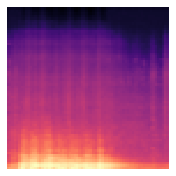

In [6]:
startime = time.ctime()
print(time.ctime())
print('Working on subset from df_1')
generate_melspec(df_1)
print(time.ctime())

In [7]:
! ls /content/gdrive/MyDrive/trainpng4 | wc
! ls /content/gdrive/MyDrive/dumptrainpng2_new | wc
! pwd
! mv /content/gdrive/MyDrive/trainpng4/* /content/gdrive/MyDrive/dumptrainpng2_new/
! ls /content/gdrive/MyDrive/trainpng4 | wc
! ls /content/gdrive/MyDrive/dumptrainpng2_new | wc

   2000    2000   21487
      0       0       0
/content/gdrive/MyDrive
      0       0       0
   2000    2000   21487


Working on subset from df_2
FileCount = 1: Working on spectogram /content/gdrive/MyDrive/trainpng4/332415.png
FileCount = 2: Working on spectogram /content/gdrive/MyDrive/trainpng4/332416.png
FileCount = 3: Working on spectogram /content/gdrive/MyDrive/trainpng4/402074.png
FileCount = 4: Working on spectogram /content/gdrive/MyDrive/trainpng4/148156.png
FileCount = 5: Working on spectogram /content/gdrive/MyDrive/trainpng4/404159.png
FileCount = 6: Working on spectogram /content/gdrive/MyDrive/trainpng4/404163.png
FileCount = 7: Working on spectogram /content/gdrive/MyDrive/trainpng4/391893.png
FileCount = 8: Working on spectogram /content/gdrive/MyDrive/trainpng4/92887.png
FileCount = 9: Working on spectogram /content/gdrive/MyDrive/trainpng4/232164.png
FileCount = 10: Working on spectogram /content/gdrive/MyDrive/trainpng4/232178.png
FileCount = 11: Working on spectogram /content/gdrive/MyDrive/trainpng4/140036.png
FileCount = 12: Working on spectogram /content/gdrive/MyDrive/trainpn

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35464
  n_fft, y.shape[-1]


FileCount = 42: Working on spectogram /content/gdrive/MyDrive/trainpng4/182293.png
FileCount = 43: Working on spectogram /content/gdrive/MyDrive/trainpng4/182295.png
FileCount = 44: Working on spectogram /content/gdrive/MyDrive/trainpng4/193564.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15460
  n_fft, y.shape[-1]


FileCount = 45: Working on spectogram /content/gdrive/MyDrive/trainpng4/174168.png
FileCount = 46: Working on spectogram /content/gdrive/MyDrive/trainpng4/61559.png
FileCount = 47: Working on spectogram /content/gdrive/MyDrive/trainpng4/61560.png
FileCount = 48: Working on spectogram /content/gdrive/MyDrive/trainpng4/61561.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17587
  n_fft, y.shape[-1]


FileCount = 49: Working on spectogram /content/gdrive/MyDrive/trainpng4/61562.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20479
  n_fft, y.shape[-1]


FileCount = 50: Working on spectogram /content/gdrive/MyDrive/trainpng4/61563.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18081
  n_fft, y.shape[-1]


FileCount = 51: Working on spectogram /content/gdrive/MyDrive/trainpng4/61565.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27391
  n_fft, y.shape[-1]


FileCount = 52: Working on spectogram /content/gdrive/MyDrive/trainpng4/61566.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28787
  n_fft, y.shape[-1]


FileCount = 53: Working on spectogram /content/gdrive/MyDrive/trainpng4/61567.png
FileCount = 54: Working on spectogram /content/gdrive/MyDrive/trainpng4/61568.png
FileCount = 55: Working on spectogram /content/gdrive/MyDrive/trainpng4/33132.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24414
  n_fft, y.shape[-1]


FileCount = 56: Working on spectogram /content/gdrive/MyDrive/trainpng4/33138.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18120
  n_fft, y.shape[-1]


FileCount = 57: Working on spectogram /content/gdrive/MyDrive/trainpng4/33139.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23249
  n_fft, y.shape[-1]


FileCount = 58: Working on spectogram /content/gdrive/MyDrive/trainpng4/33136.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33646
  n_fft, y.shape[-1]


FileCount = 59: Working on spectogram /content/gdrive/MyDrive/trainpng4/33148.png
FileCount = 60: Working on spectogram /content/gdrive/MyDrive/trainpng4/404892.png
FileCount = 61: Working on spectogram /content/gdrive/MyDrive/trainpng4/404894.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14907
  n_fft, y.shape[-1]


FileCount = 62: Working on spectogram /content/gdrive/MyDrive/trainpng4/422.png
FileCount = 63: Working on spectogram /content/gdrive/MyDrive/trainpng4/421.png
FileCount = 64: Working on spectogram /content/gdrive/MyDrive/trainpng4/425.png
FileCount = 65: Working on spectogram /content/gdrive/MyDrive/trainpng4/426.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33920
  n_fft, y.shape[-1]


FileCount = 66: Working on spectogram /content/gdrive/MyDrive/trainpng4/423.png
FileCount = 67: Working on spectogram /content/gdrive/MyDrive/trainpng4/424.png
FileCount = 68: Working on spectogram /content/gdrive/MyDrive/trainpng4/36325.png
FileCount = 69: Working on spectogram /content/gdrive/MyDrive/trainpng4/200181.png
FileCount = 70: Working on spectogram /content/gdrive/MyDrive/trainpng4/200182.png
FileCount = 71: Working on spectogram /content/gdrive/MyDrive/trainpng4/200183.png
FileCount = 72: Working on spectogram /content/gdrive/MyDrive/trainpng4/377340.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13230
  n_fft, y.shape[-1]


FileCount = 73: Working on spectogram /content/gdrive/MyDrive/trainpng4/377341.png
FileCount = 74: Working on spectogram /content/gdrive/MyDrive/trainpng4/377342.png
FileCount = 75: Working on spectogram /content/gdrive/MyDrive/trainpng4/377343.png
FileCount = 76: Working on spectogram /content/gdrive/MyDrive/trainpng4/377344.png
FileCount = 77: Working on spectogram /content/gdrive/MyDrive/trainpng4/213504.png
FileCount = 78: Working on spectogram /content/gdrive/MyDrive/trainpng4/377348.png
FileCount = 79: Working on spectogram /content/gdrive/MyDrive/trainpng4/377349.png
FileCount = 80: Working on spectogram /content/gdrive/MyDrive/trainpng4/377352.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26460
  n_fft, y.shape[-1]


FileCount = 81: Working on spectogram /content/gdrive/MyDrive/trainpng4/377353.png
FileCount = 82: Working on spectogram /content/gdrive/MyDrive/trainpng4/377355.png
FileCount = 83: Working on spectogram /content/gdrive/MyDrive/trainpng4/377356.png
FileCount = 84: Working on spectogram /content/gdrive/MyDrive/trainpng4/377357.png
FileCount = 85: Working on spectogram /content/gdrive/MyDrive/trainpng4/377358.png
FileCount = 86: Working on spectogram /content/gdrive/MyDrive/trainpng4/50727.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22050
  n_fft, y.shape[-1]


FileCount = 87: Working on spectogram /content/gdrive/MyDrive/trainpng4/50728.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22309
  n_fft, y.shape[-1]


FileCount = 88: Working on spectogram /content/gdrive/MyDrive/trainpng4/50731.png
FileCount = 89: Working on spectogram /content/gdrive/MyDrive/trainpng4/32305.png
FileCount = 90: Working on spectogram /content/gdrive/MyDrive/trainpng4/128628.png
FileCount = 91: Working on spectogram /content/gdrive/MyDrive/trainpng4/102034.png
FileCount = 92: Working on spectogram /content/gdrive/MyDrive/trainpng4/102036.png
FileCount = 93: Working on spectogram /content/gdrive/MyDrive/trainpng4/103173.png
FileCount = 94: Working on spectogram /content/gdrive/MyDrive/trainpng4/176983.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14364
  n_fft, y.shape[-1]


FileCount = 95: Working on spectogram /content/gdrive/MyDrive/trainpng4/176989.png
FileCount = 96: Working on spectogram /content/gdrive/MyDrive/trainpng4/176990.png
FileCount = 97: Working on spectogram /content/gdrive/MyDrive/trainpng4/186267.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23639
  n_fft, y.shape[-1]


FileCount = 98: Working on spectogram /content/gdrive/MyDrive/trainpng4/251815.png
FileCount = 99: Working on spectogram /content/gdrive/MyDrive/trainpng4/321454.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21805
  n_fft, y.shape[-1]


FileCount = 100: Working on spectogram /content/gdrive/MyDrive/trainpng4/146351.png
FileCount = 101: Working on spectogram /content/gdrive/MyDrive/trainpng4/198574.png
FileCount = 102: Working on spectogram /content/gdrive/MyDrive/trainpng4/193516.png
FileCount = 103: Working on spectogram /content/gdrive/MyDrive/trainpng4/193517.png
FileCount = 104: Working on spectogram /content/gdrive/MyDrive/trainpng4/193519.png
FileCount = 105: Working on spectogram /content/gdrive/MyDrive/trainpng4/41943.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15713
  n_fft, y.shape[-1]


FileCount = 106: Working on spectogram /content/gdrive/MyDrive/trainpng4/41945.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19311
  n_fft, y.shape[-1]


FileCount = 107: Working on spectogram /content/gdrive/MyDrive/trainpng4/76956.png
FileCount = 108: Working on spectogram /content/gdrive/MyDrive/trainpng4/338964.png
FileCount = 109: Working on spectogram /content/gdrive/MyDrive/trainpng4/171822.png
FileCount = 110: Working on spectogram /content/gdrive/MyDrive/trainpng4/90177.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38162
  n_fft, y.shape[-1]


FileCount = 111: Working on spectogram /content/gdrive/MyDrive/trainpng4/210004.png
FileCount = 112: Working on spectogram /content/gdrive/MyDrive/trainpng4/246117.png
FileCount = 113: Working on spectogram /content/gdrive/MyDrive/trainpng4/173311.png
FileCount = 114: Working on spectogram /content/gdrive/MyDrive/trainpng4/251916.png
FileCount = 115: Working on spectogram /content/gdrive/MyDrive/trainpng4/158751.png
FileCount = 116: Working on spectogram /content/gdrive/MyDrive/trainpng4/51291.png
FileCount = 117: Working on spectogram /content/gdrive/MyDrive/trainpng4/160875.png
FileCount = 118: Working on spectogram /content/gdrive/MyDrive/trainpng4/160877.png
FileCount = 119: Working on spectogram /content/gdrive/MyDrive/trainpng4/417975.png
FileCount = 120: Working on spectogram /content/gdrive/MyDrive/trainpng4/400591.png
FileCount = 121: Working on spectogram /content/gdrive/MyDrive/trainpng4/103637.png
FileCount = 122: Working on spectogram /content/gdrive/MyDrive/trainpng4/1036

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36710
  n_fft, y.shape[-1]


FileCount = 199: Working on spectogram /content/gdrive/MyDrive/trainpng4/429331.png
FileCount = 200: Working on spectogram /content/gdrive/MyDrive/trainpng4/198434.png
FileCount = 201: Working on spectogram /content/gdrive/MyDrive/trainpng4/167228.png
FileCount = 202: Working on spectogram /content/gdrive/MyDrive/trainpng4/168816.png
FileCount = 203: Working on spectogram /content/gdrive/MyDrive/trainpng4/255875.png
FileCount = 204: Working on spectogram /content/gdrive/MyDrive/trainpng4/255877.png
FileCount = 205: Working on spectogram /content/gdrive/MyDrive/trainpng4/255876.png
FileCount = 206: Working on spectogram /content/gdrive/MyDrive/trainpng4/255878.png
FileCount = 207: Working on spectogram /content/gdrive/MyDrive/trainpng4/255880.png
FileCount = 208: Working on spectogram /content/gdrive/MyDrive/trainpng4/255881.png
FileCount = 209: Working on spectogram /content/gdrive/MyDrive/trainpng4/12712.png
FileCount = 210: Working on spectogram /content/gdrive/MyDrive/trainpng4/1271

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37669
  n_fft, y.shape[-1]


FileCount = 253: Working on spectogram /content/gdrive/MyDrive/trainpng4/274117.png
FileCount = 254: Working on spectogram /content/gdrive/MyDrive/trainpng4/359142.png
FileCount = 255: Working on spectogram /content/gdrive/MyDrive/trainpng4/359143.png
FileCount = 256: Working on spectogram /content/gdrive/MyDrive/trainpng4/257828.png
FileCount = 257: Working on spectogram /content/gdrive/MyDrive/trainpng4/429508.png
FileCount = 258: Working on spectogram /content/gdrive/MyDrive/trainpng4/214854.png
FileCount = 259: Working on spectogram /content/gdrive/MyDrive/trainpng4/405320.png
FileCount = 260: Working on spectogram /content/gdrive/MyDrive/trainpng4/369490.png
FileCount = 261: Working on spectogram /content/gdrive/MyDrive/trainpng4/370027.png
FileCount = 262: Working on spectogram /content/gdrive/MyDrive/trainpng4/344433.png
FileCount = 263: Working on spectogram /content/gdrive/MyDrive/trainpng4/429509.png
FileCount = 264: Working on spectogram /content/gdrive/MyDrive/trainpng4/391

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29989
  n_fft, y.shape[-1]


FileCount = 267: Working on spectogram /content/gdrive/MyDrive/trainpng4/334208.png
FileCount = 268: Working on spectogram /content/gdrive/MyDrive/trainpng4/334214.png
FileCount = 269: Working on spectogram /content/gdrive/MyDrive/trainpng4/368137.png
FileCount = 270: Working on spectogram /content/gdrive/MyDrive/trainpng4/365328.png
FileCount = 271: Working on spectogram /content/gdrive/MyDrive/trainpng4/407718.png
FileCount = 272: Working on spectogram /content/gdrive/MyDrive/trainpng4/326323.png
FileCount = 273: Working on spectogram /content/gdrive/MyDrive/trainpng4/327123.png
FileCount = 274: Working on spectogram /content/gdrive/MyDrive/trainpng4/327130.png
FileCount = 275: Working on spectogram /content/gdrive/MyDrive/trainpng4/390153.png
FileCount = 276: Working on spectogram /content/gdrive/MyDrive/trainpng4/240691.png
FileCount = 277: Working on spectogram /content/gdrive/MyDrive/trainpng4/263786.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18240
  n_fft, y.shape[-1]


FileCount = 278: Working on spectogram /content/gdrive/MyDrive/trainpng4/390252.png
FileCount = 279: Working on spectogram /content/gdrive/MyDrive/trainpng4/197743.png
FileCount = 280: Working on spectogram /content/gdrive/MyDrive/trainpng4/38017.png
FileCount = 281: Working on spectogram /content/gdrive/MyDrive/trainpng4/275617.png
FileCount = 282: Working on spectogram /content/gdrive/MyDrive/trainpng4/331685.png
FileCount = 283: Working on spectogram /content/gdrive/MyDrive/trainpng4/345024.png
FileCount = 284: Working on spectogram /content/gdrive/MyDrive/trainpng4/62158.png
FileCount = 285: Working on spectogram /content/gdrive/MyDrive/trainpng4/62159.png
FileCount = 286: Working on spectogram /content/gdrive/MyDrive/trainpng4/192766.png
FileCount = 287: Working on spectogram /content/gdrive/MyDrive/trainpng4/219164.png
FileCount = 288: Working on spectogram /content/gdrive/MyDrive/trainpng4/219212.png
FileCount = 289: Working on spectogram /content/gdrive/MyDrive/trainpng4/327761

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20520
  n_fft, y.shape[-1]


FileCount = 336: Working on spectogram /content/gdrive/MyDrive/trainpng4/177229.png
FileCount = 337: Working on spectogram /content/gdrive/MyDrive/trainpng4/169086.png
FileCount = 338: Working on spectogram /content/gdrive/MyDrive/trainpng4/369814.png
FileCount = 339: Working on spectogram /content/gdrive/MyDrive/trainpng4/126110.png
FileCount = 340: Working on spectogram /content/gdrive/MyDrive/trainpng4/369906.png
FileCount = 341: Working on spectogram /content/gdrive/MyDrive/trainpng4/369930.png
FileCount = 342: Working on spectogram /content/gdrive/MyDrive/trainpng4/369932.png
FileCount = 343: Working on spectogram /content/gdrive/MyDrive/trainpng4/369934.png
FileCount = 344: Working on spectogram /content/gdrive/MyDrive/trainpng4/214334.png
FileCount = 345: Working on spectogram /content/gdrive/MyDrive/trainpng4/234849.png
FileCount = 346: Working on spectogram /content/gdrive/MyDrive/trainpng4/193894.png
FileCount = 347: Working on spectogram /content/gdrive/MyDrive/trainpng4/159

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27642
  n_fft, y.shape[-1]


FileCount = 365: Working on spectogram /content/gdrive/MyDrive/trainpng4/409435.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42095
  n_fft, y.shape[-1]


FileCount = 366: Working on spectogram /content/gdrive/MyDrive/trainpng4/397150.png
FileCount = 367: Working on spectogram /content/gdrive/MyDrive/trainpng4/44914.png
FileCount = 368: Working on spectogram /content/gdrive/MyDrive/trainpng4/409480.png
FileCount = 369: Working on spectogram /content/gdrive/MyDrive/trainpng4/409512.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37487
  n_fft, y.shape[-1]


FileCount = 370: Working on spectogram /content/gdrive/MyDrive/trainpng4/368594.png
FileCount = 371: Working on spectogram /content/gdrive/MyDrive/trainpng4/428569.png
FileCount = 372: Working on spectogram /content/gdrive/MyDrive/trainpng4/256307.png
FileCount = 373: Working on spectogram /content/gdrive/MyDrive/trainpng4/344645.png
FileCount = 374: Working on spectogram /content/gdrive/MyDrive/trainpng4/127559.png
FileCount = 375: Working on spectogram /content/gdrive/MyDrive/trainpng4/430710.png
FileCount = 376: Working on spectogram /content/gdrive/MyDrive/trainpng4/86148.png
FileCount = 377: Working on spectogram /content/gdrive/MyDrive/trainpng4/378267.png
FileCount = 378: Working on spectogram /content/gdrive/MyDrive/trainpng4/325560.png
FileCount = 379: Working on spectogram /content/gdrive/MyDrive/trainpng4/326903.png
FileCount = 380: Working on spectogram /content/gdrive/MyDrive/trainpng4/327495.png
FileCount = 381: Working on spectogram /content/gdrive/MyDrive/trainpng4/1865

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36868
  n_fft, y.shape[-1]


FileCount = 398: Working on spectogram /content/gdrive/MyDrive/trainpng4/394148.png
FileCount = 399: Working on spectogram /content/gdrive/MyDrive/trainpng4/368083.png
FileCount = 400: Working on spectogram /content/gdrive/MyDrive/trainpng4/83968.png
FileCount = 401: Working on spectogram /content/gdrive/MyDrive/trainpng4/325663.png
FileCount = 402: Working on spectogram /content/gdrive/MyDrive/trainpng4/325664.png
FileCount = 403: Working on spectogram /content/gdrive/MyDrive/trainpng4/325666.png
FileCount = 404: Working on spectogram /content/gdrive/MyDrive/trainpng4/325667.png
FileCount = 405: Working on spectogram /content/gdrive/MyDrive/trainpng4/325668.png
FileCount = 406: Working on spectogram /content/gdrive/MyDrive/trainpng4/335983.png
FileCount = 407: Working on spectogram /content/gdrive/MyDrive/trainpng4/254071.png
FileCount = 408: Working on spectogram /content/gdrive/MyDrive/trainpng4/422079.png
FileCount = 409: Working on spectogram /content/gdrive/MyDrive/trainpng4/4344

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29743
  n_fft, y.shape[-1]


FileCount = 512: Working on spectogram /content/gdrive/MyDrive/trainpng4/8402.png
FileCount = 513: Working on spectogram /content/gdrive/MyDrive/trainpng4/270599.png
FileCount = 514: Working on spectogram /content/gdrive/MyDrive/trainpng4/270601.png
FileCount = 515: Working on spectogram /content/gdrive/MyDrive/trainpng4/270602.png
FileCount = 516: Working on spectogram /content/gdrive/MyDrive/trainpng4/270603.png
FileCount = 517: Working on spectogram /content/gdrive/MyDrive/trainpng4/8462.png
FileCount = 518: Working on spectogram /content/gdrive/MyDrive/trainpng4/8470.png
FileCount = 519: Working on spectogram /content/gdrive/MyDrive/trainpng4/8481.png
FileCount = 520: Working on spectogram /content/gdrive/MyDrive/trainpng4/8485.png
FileCount = 521: Working on spectogram /content/gdrive/MyDrive/trainpng4/8487.png
FileCount = 522: Working on spectogram /content/gdrive/MyDrive/trainpng4/248176.png
FileCount = 523: Working on spectogram /content/gdrive/MyDrive/trainpng4/346493.png
File

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26656
  n_fft, y.shape[-1]


FileCount = 539: Working on spectogram /content/gdrive/MyDrive/trainpng4/338741.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18211
  n_fft, y.shape[-1]


FileCount = 540: Working on spectogram /content/gdrive/MyDrive/trainpng4/68461.png
FileCount = 541: Working on spectogram /content/gdrive/MyDrive/trainpng4/9102.png
FileCount = 542: Working on spectogram /content/gdrive/MyDrive/trainpng4/41984.png
FileCount = 543: Working on spectogram /content/gdrive/MyDrive/trainpng4/41985.png
FileCount = 544: Working on spectogram /content/gdrive/MyDrive/trainpng4/41986.png
FileCount = 545: Working on spectogram /content/gdrive/MyDrive/trainpng4/41988.png
FileCount = 546: Working on spectogram /content/gdrive/MyDrive/trainpng4/41989.png
FileCount = 547: Working on spectogram /content/gdrive/MyDrive/trainpng4/361573.png
FileCount = 548: Working on spectogram /content/gdrive/MyDrive/trainpng4/361575.png
FileCount = 549: Working on spectogram /content/gdrive/MyDrive/trainpng4/361576.png
FileCount = 550: Working on spectogram /content/gdrive/MyDrive/trainpng4/361578.png
FileCount = 551: Working on spectogram /content/gdrive/MyDrive/trainpng4/361579.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37989
  n_fft, y.shape[-1]


FileCount = 578: Working on spectogram /content/gdrive/MyDrive/trainpng4/175279.png
FileCount = 579: Working on spectogram /content/gdrive/MyDrive/trainpng4/414416.png
FileCount = 580: Working on spectogram /content/gdrive/MyDrive/trainpng4/169188.png
FileCount = 581: Working on spectogram /content/gdrive/MyDrive/trainpng4/27877.png
FileCount = 582: Working on spectogram /content/gdrive/MyDrive/trainpng4/265483.png
FileCount = 583: Working on spectogram /content/gdrive/MyDrive/trainpng4/406796.png
FileCount = 584: Working on spectogram /content/gdrive/MyDrive/trainpng4/269581.png
FileCount = 585: Working on spectogram /content/gdrive/MyDrive/trainpng4/325419.png
FileCount = 586: Working on spectogram /content/gdrive/MyDrive/trainpng4/366392.png
FileCount = 587: Working on spectogram /content/gdrive/MyDrive/trainpng4/429889.png
FileCount = 588: Working on spectogram /content/gdrive/MyDrive/trainpng4/91980.png
FileCount = 589: Working on spectogram /content/gdrive/MyDrive/trainpng4/19951

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24064
  n_fft, y.shape[-1]


FileCount = 600: Working on spectogram /content/gdrive/MyDrive/trainpng4/65799.png
FileCount = 601: Working on spectogram /content/gdrive/MyDrive/trainpng4/66284.png
FileCount = 602: Working on spectogram /content/gdrive/MyDrive/trainpng4/66285.png
FileCount = 603: Working on spectogram /content/gdrive/MyDrive/trainpng4/181318.png
FileCount = 604: Working on spectogram /content/gdrive/MyDrive/trainpng4/183180.png
FileCount = 605: Working on spectogram /content/gdrive/MyDrive/trainpng4/211967.png
FileCount = 606: Working on spectogram /content/gdrive/MyDrive/trainpng4/181319.png
FileCount = 607: Working on spectogram /content/gdrive/MyDrive/trainpng4/181351.png
FileCount = 608: Working on spectogram /content/gdrive/MyDrive/trainpng4/400896.png
FileCount = 609: Working on spectogram /content/gdrive/MyDrive/trainpng4/431804.png
FileCount = 610: Working on spectogram /content/gdrive/MyDrive/trainpng4/431805.png
FileCount = 611: Working on spectogram /content/gdrive/MyDrive/trainpng4/100300

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35448
  n_fft, y.shape[-1]


FileCount = 617: Working on spectogram /content/gdrive/MyDrive/trainpng4/154529.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36882
  n_fft, y.shape[-1]


FileCount = 618: Working on spectogram /content/gdrive/MyDrive/trainpng4/15288.png
FileCount = 619: Working on spectogram /content/gdrive/MyDrive/trainpng4/82361.png
FileCount = 620: Working on spectogram /content/gdrive/MyDrive/trainpng4/15291.png
FileCount = 621: Working on spectogram /content/gdrive/MyDrive/trainpng4/82386.png
FileCount = 622: Working on spectogram /content/gdrive/MyDrive/trainpng4/221798.png
FileCount = 623: Working on spectogram /content/gdrive/MyDrive/trainpng4/431628.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30208
  n_fft, y.shape[-1]


FileCount = 624: Working on spectogram /content/gdrive/MyDrive/trainpng4/127004.png
FileCount = 625: Working on spectogram /content/gdrive/MyDrive/trainpng4/256635.png
FileCount = 626: Working on spectogram /content/gdrive/MyDrive/trainpng4/316645.png
FileCount = 627: Working on spectogram /content/gdrive/MyDrive/trainpng4/316648.png
FileCount = 628: Working on spectogram /content/gdrive/MyDrive/trainpng4/350448.png
FileCount = 629: Working on spectogram /content/gdrive/MyDrive/trainpng4/19188.png
FileCount = 630: Working on spectogram /content/gdrive/MyDrive/trainpng4/387829.png
FileCount = 631: Working on spectogram /content/gdrive/MyDrive/trainpng4/140342.png
FileCount = 632: Working on spectogram /content/gdrive/MyDrive/trainpng4/140344.png
FileCount = 633: Working on spectogram /content/gdrive/MyDrive/trainpng4/362665.png
FileCount = 634: Working on spectogram /content/gdrive/MyDrive/trainpng4/394608.png
FileCount = 635: Working on spectogram /content/gdrive/MyDrive/trainpng4/6327

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23080
  n_fft, y.shape[-1]


FileCount = 644: Working on spectogram /content/gdrive/MyDrive/trainpng4/341264.png
FileCount = 645: Working on spectogram /content/gdrive/MyDrive/trainpng4/178455.png
FileCount = 646: Working on spectogram /content/gdrive/MyDrive/trainpng4/178459.png
FileCount = 647: Working on spectogram /content/gdrive/MyDrive/trainpng4/343397.png
FileCount = 648: Working on spectogram /content/gdrive/MyDrive/trainpng4/68985.png
FileCount = 649: Working on spectogram /content/gdrive/MyDrive/trainpng4/61028.png
FileCount = 650: Working on spectogram /content/gdrive/MyDrive/trainpng4/61029.png
FileCount = 651: Working on spectogram /content/gdrive/MyDrive/trainpng4/419475.png
FileCount = 652: Working on spectogram /content/gdrive/MyDrive/trainpng4/419477.png
FileCount = 653: Working on spectogram /content/gdrive/MyDrive/trainpng4/348851.png
FileCount = 654: Working on spectogram /content/gdrive/MyDrive/trainpng4/348852.png
FileCount = 655: Working on spectogram /content/gdrive/MyDrive/trainpng4/418494

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33075
  n_fft, y.shape[-1]


FileCount = 701: Working on spectogram /content/gdrive/MyDrive/trainpng4/326425.png
FileCount = 702: Working on spectogram /content/gdrive/MyDrive/trainpng4/387981.png
FileCount = 703: Working on spectogram /content/gdrive/MyDrive/trainpng4/387983.png
FileCount = 704: Working on spectogram /content/gdrive/MyDrive/trainpng4/53806.png
FileCount = 705: Working on spectogram /content/gdrive/MyDrive/trainpng4/409645.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16125
  n_fft, y.shape[-1]


FileCount = 706: Working on spectogram /content/gdrive/MyDrive/trainpng4/86226.png
FileCount = 707: Working on spectogram /content/gdrive/MyDrive/trainpng4/389541.png
FileCount = 708: Working on spectogram /content/gdrive/MyDrive/trainpng4/108423.png
FileCount = 709: Working on spectogram /content/gdrive/MyDrive/trainpng4/340296.png
FileCount = 710: Working on spectogram /content/gdrive/MyDrive/trainpng4/232537.png
FileCount = 711: Working on spectogram /content/gdrive/MyDrive/trainpng4/232541.png
FileCount = 712: Working on spectogram /content/gdrive/MyDrive/trainpng4/219408.png
FileCount = 713: Working on spectogram /content/gdrive/MyDrive/trainpng4/265360.png
FileCount = 714: Working on spectogram /content/gdrive/MyDrive/trainpng4/95743.png
FileCount = 715: Working on spectogram /content/gdrive/MyDrive/trainpng4/219373.png
FileCount = 716: Working on spectogram /content/gdrive/MyDrive/trainpng4/249806.png
FileCount = 717: Working on spectogram /content/gdrive/MyDrive/trainpng4/39194

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23182
  n_fft, y.shape[-1]


FileCount = 718: Working on spectogram /content/gdrive/MyDrive/trainpng4/433886.png
FileCount = 719: Working on spectogram /content/gdrive/MyDrive/trainpng4/433887.png
FileCount = 720: Working on spectogram /content/gdrive/MyDrive/trainpng4/198319.png
FileCount = 721: Working on spectogram /content/gdrive/MyDrive/trainpng4/421519.png
FileCount = 722: Working on spectogram /content/gdrive/MyDrive/trainpng4/332658.png
FileCount = 723: Working on spectogram /content/gdrive/MyDrive/trainpng4/322951.png
FileCount = 724: Working on spectogram /content/gdrive/MyDrive/trainpng4/74382.png
FileCount = 725: Working on spectogram /content/gdrive/MyDrive/trainpng4/376994.png
FileCount = 726: Working on spectogram /content/gdrive/MyDrive/trainpng4/372898.png
FileCount = 727: Working on spectogram /content/gdrive/MyDrive/trainpng4/22721.png
FileCount = 728: Working on spectogram /content/gdrive/MyDrive/trainpng4/9088.png
FileCount = 729: Working on spectogram /content/gdrive/MyDrive/trainpng4/386801.

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37900
  n_fft, y.shape[-1]


FileCount = 736: Working on spectogram /content/gdrive/MyDrive/trainpng4/186747.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26509
  n_fft, y.shape[-1]


FileCount = 737: Working on spectogram /content/gdrive/MyDrive/trainpng4/434570.png
FileCount = 738: Working on spectogram /content/gdrive/MyDrive/trainpng4/360942.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34496
  n_fft, y.shape[-1]


FileCount = 739: Working on spectogram /content/gdrive/MyDrive/trainpng4/361030.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35520
  n_fft, y.shape[-1]


FileCount = 740: Working on spectogram /content/gdrive/MyDrive/trainpng4/318189.png
FileCount = 741: Working on spectogram /content/gdrive/MyDrive/trainpng4/23400.png
FileCount = 742: Working on spectogram /content/gdrive/MyDrive/trainpng4/388014.png
FileCount = 743: Working on spectogram /content/gdrive/MyDrive/trainpng4/402402.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26612
  n_fft, y.shape[-1]


FileCount = 744: Working on spectogram /content/gdrive/MyDrive/trainpng4/386042.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37006
  n_fft, y.shape[-1]


FileCount = 745: Working on spectogram /content/gdrive/MyDrive/trainpng4/324671.png
FileCount = 746: Working on spectogram /content/gdrive/MyDrive/trainpng4/226381.png
FileCount = 747: Working on spectogram /content/gdrive/MyDrive/trainpng4/79145.png
FileCount = 748: Working on spectogram /content/gdrive/MyDrive/trainpng4/394558.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30436
  n_fft, y.shape[-1]


FileCount = 749: Working on spectogram /content/gdrive/MyDrive/trainpng4/165197.png
FileCount = 750: Working on spectogram /content/gdrive/MyDrive/trainpng4/404829.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38166
  n_fft, y.shape[-1]


FileCount = 751: Working on spectogram /content/gdrive/MyDrive/trainpng4/93569.png
FileCount = 752: Working on spectogram /content/gdrive/MyDrive/trainpng4/368181.png
FileCount = 753: Working on spectogram /content/gdrive/MyDrive/trainpng4/54959.png
FileCount = 754: Working on spectogram /content/gdrive/MyDrive/trainpng4/325331.png
FileCount = 755: Working on spectogram /content/gdrive/MyDrive/trainpng4/425824.png
FileCount = 756: Working on spectogram /content/gdrive/MyDrive/trainpng4/319418.png
FileCount = 757: Working on spectogram /content/gdrive/MyDrive/trainpng4/392647.png
FileCount = 758: Working on spectogram /content/gdrive/MyDrive/trainpng4/391943.png
FileCount = 759: Working on spectogram /content/gdrive/MyDrive/trainpng4/391966.png
FileCount = 760: Working on spectogram /content/gdrive/MyDrive/trainpng4/391969.png
FileCount = 761: Working on spectogram /content/gdrive/MyDrive/trainpng4/344755.png
FileCount = 762: Working on spectogram /content/gdrive/MyDrive/trainpng4/17462

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32768
  n_fft, y.shape[-1]


FileCount = 768: Working on spectogram /content/gdrive/MyDrive/trainpng4/171505.png
FileCount = 769: Working on spectogram /content/gdrive/MyDrive/trainpng4/361601.png
FileCount = 770: Working on spectogram /content/gdrive/MyDrive/trainpng4/33941.png
FileCount = 771: Working on spectogram /content/gdrive/MyDrive/trainpng4/190643.png
FileCount = 772: Working on spectogram /content/gdrive/MyDrive/trainpng4/160948.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17222
  n_fft, y.shape[-1]


FileCount = 773: Working on spectogram /content/gdrive/MyDrive/trainpng4/383201.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30737
  n_fft, y.shape[-1]


FileCount = 774: Working on spectogram /content/gdrive/MyDrive/trainpng4/130327.png
FileCount = 775: Working on spectogram /content/gdrive/MyDrive/trainpng4/46390.png
FileCount = 776: Working on spectogram /content/gdrive/MyDrive/trainpng4/190802.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23907
  n_fft, y.shape[-1]


FileCount = 777: Working on spectogram /content/gdrive/MyDrive/trainpng4/343407.png
FileCount = 778: Working on spectogram /content/gdrive/MyDrive/trainpng4/79260.png
FileCount = 779: Working on spectogram /content/gdrive/MyDrive/trainpng4/411042.png
FileCount = 780: Working on spectogram /content/gdrive/MyDrive/trainpng4/175536.png
FileCount = 781: Working on spectogram /content/gdrive/MyDrive/trainpng4/316875.png
FileCount = 782: Working on spectogram /content/gdrive/MyDrive/trainpng4/240112.png
FileCount = 783: Working on spectogram /content/gdrive/MyDrive/trainpng4/166474.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17160
  n_fft, y.shape[-1]


FileCount = 784: Working on spectogram /content/gdrive/MyDrive/trainpng4/99026.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36892
  n_fft, y.shape[-1]


FileCount = 785: Working on spectogram /content/gdrive/MyDrive/trainpng4/2780.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15232
  n_fft, y.shape[-1]


FileCount = 786: Working on spectogram /content/gdrive/MyDrive/trainpng4/424768.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35840
  n_fft, y.shape[-1]


FileCount = 787: Working on spectogram /content/gdrive/MyDrive/trainpng4/368455.png
FileCount = 788: Working on spectogram /content/gdrive/MyDrive/trainpng4/244568.png
FileCount = 789: Working on spectogram /content/gdrive/MyDrive/trainpng4/429919.png
FileCount = 790: Working on spectogram /content/gdrive/MyDrive/trainpng4/344962.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25361
  n_fft, y.shape[-1]


FileCount = 791: Working on spectogram /content/gdrive/MyDrive/trainpng4/213919.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13825
  n_fft, y.shape[-1]


FileCount = 792: Working on spectogram /content/gdrive/MyDrive/trainpng4/338905.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26176
  n_fft, y.shape[-1]


FileCount = 793: Working on spectogram /content/gdrive/MyDrive/trainpng4/110554.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27957
  n_fft, y.shape[-1]


FileCount = 794: Working on spectogram /content/gdrive/MyDrive/trainpng4/148444.png
FileCount = 795: Working on spectogram /content/gdrive/MyDrive/trainpng4/208875.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19674
  n_fft, y.shape[-1]


FileCount = 796: Working on spectogram /content/gdrive/MyDrive/trainpng4/22786.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15484
  n_fft, y.shape[-1]


FileCount = 797: Working on spectogram /content/gdrive/MyDrive/trainpng4/411538.png
FileCount = 798: Working on spectogram /content/gdrive/MyDrive/trainpng4/262659.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14136
  n_fft, y.shape[-1]


FileCount = 799: Working on spectogram /content/gdrive/MyDrive/trainpng4/262660.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33792
  n_fft, y.shape[-1]


FileCount = 800: Working on spectogram /content/gdrive/MyDrive/trainpng4/165210.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38852
  n_fft, y.shape[-1]


FileCount = 801: Working on spectogram /content/gdrive/MyDrive/trainpng4/411059.png
FileCount = 802: Working on spectogram /content/gdrive/MyDrive/trainpng4/351626.png
FileCount = 803: Working on spectogram /content/gdrive/MyDrive/trainpng4/209792.png
FileCount = 804: Working on spectogram /content/gdrive/MyDrive/trainpng4/411021.png
FileCount = 805: Working on spectogram /content/gdrive/MyDrive/trainpng4/61288.png
FileCount = 806: Working on spectogram /content/gdrive/MyDrive/trainpng4/323482.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14700
  n_fft, y.shape[-1]


FileCount = 807: Working on spectogram /content/gdrive/MyDrive/trainpng4/366328.png
FileCount = 808: Working on spectogram /content/gdrive/MyDrive/trainpng4/172400.png
FileCount = 809: Working on spectogram /content/gdrive/MyDrive/trainpng4/401890.png
FileCount = 810: Working on spectogram /content/gdrive/MyDrive/trainpng4/8890.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23808
  n_fft, y.shape[-1]


FileCount = 811: Working on spectogram /content/gdrive/MyDrive/trainpng4/271052.png
FileCount = 812: Working on spectogram /content/gdrive/MyDrive/trainpng4/271053.png
FileCount = 813: Working on spectogram /content/gdrive/MyDrive/trainpng4/271056.png
FileCount = 814: Working on spectogram /content/gdrive/MyDrive/trainpng4/90860.png
FileCount = 815: Working on spectogram /content/gdrive/MyDrive/trainpng4/90864.png
FileCount = 816: Working on spectogram /content/gdrive/MyDrive/trainpng4/90865.png
FileCount = 817: Working on spectogram /content/gdrive/MyDrive/trainpng4/754.png
FileCount = 818: Working on spectogram /content/gdrive/MyDrive/trainpng4/90868.png
FileCount = 819: Working on spectogram /content/gdrive/MyDrive/trainpng4/107321.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26209
  n_fft, y.shape[-1]


FileCount = 820: Working on spectogram /content/gdrive/MyDrive/trainpng4/107328.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26280
  n_fft, y.shape[-1]


FileCount = 821: Working on spectogram /content/gdrive/MyDrive/trainpng4/107329.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26377
  n_fft, y.shape[-1]


FileCount = 822: Working on spectogram /content/gdrive/MyDrive/trainpng4/328733.png
FileCount = 823: Working on spectogram /content/gdrive/MyDrive/trainpng4/361565.png
FileCount = 824: Working on spectogram /content/gdrive/MyDrive/trainpng4/271512.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20498
  n_fft, y.shape[-1]


FileCount = 825: Working on spectogram /content/gdrive/MyDrive/trainpng4/271513.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20009
  n_fft, y.shape[-1]


FileCount = 826: Working on spectogram /content/gdrive/MyDrive/trainpng4/271514.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18034
  n_fft, y.shape[-1]


FileCount = 827: Working on spectogram /content/gdrive/MyDrive/trainpng4/17599.png
FileCount = 828: Working on spectogram /content/gdrive/MyDrive/trainpng4/1262.png
FileCount = 829: Working on spectogram /content/gdrive/MyDrive/trainpng4/1269.png
FileCount = 830: Working on spectogram /content/gdrive/MyDrive/trainpng4/1271.png
FileCount = 831: Working on spectogram /content/gdrive/MyDrive/trainpng4/165476.png
FileCount = 832: Working on spectogram /content/gdrive/MyDrive/trainpng4/92007.png
FileCount = 833: Working on spectogram /content/gdrive/MyDrive/trainpng4/92008.png
FileCount = 834: Working on spectogram /content/gdrive/MyDrive/trainpng4/329777.png
FileCount = 835: Working on spectogram /content/gdrive/MyDrive/trainpng4/2432.png
FileCount = 836: Working on spectogram /content/gdrive/MyDrive/trainpng4/2434.png
FileCount = 837: Working on spectogram /content/gdrive/MyDrive/trainpng4/149895.png
FileCount = 838: Working on spectogram /content/gdrive/MyDrive/trainpng4/387578.png
FileC

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41367
  n_fft, y.shape[-1]


FileCount = 868: Working on spectogram /content/gdrive/MyDrive/trainpng4/276056.png
FileCount = 869: Working on spectogram /content/gdrive/MyDrive/trainpng4/276055.png
FileCount = 870: Working on spectogram /content/gdrive/MyDrive/trainpng4/276059.png
FileCount = 871: Working on spectogram /content/gdrive/MyDrive/trainpng4/276057.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36696
  n_fft, y.shape[-1]


FileCount = 872: Working on spectogram /content/gdrive/MyDrive/trainpng4/71409.png
FileCount = 873: Working on spectogram /content/gdrive/MyDrive/trainpng4/341795.png
FileCount = 874: Working on spectogram /content/gdrive/MyDrive/trainpng4/170313.png
FileCount = 875: Working on spectogram /content/gdrive/MyDrive/trainpng4/47429.png
FileCount = 876: Working on spectogram /content/gdrive/MyDrive/trainpng4/88655.png
FileCount = 877: Working on spectogram /content/gdrive/MyDrive/trainpng4/170592.png
FileCount = 878: Working on spectogram /content/gdrive/MyDrive/trainpng4/170857.png
FileCount = 879: Working on spectogram /content/gdrive/MyDrive/trainpng4/48024.png
FileCount = 880: Working on spectogram /content/gdrive/MyDrive/trainpng4/162747.png
FileCount = 881: Working on spectogram /content/gdrive/MyDrive/trainpng4/269525.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30319
  n_fft, y.shape[-1]


FileCount = 882: Working on spectogram /content/gdrive/MyDrive/trainpng4/269529.png
FileCount = 883: Working on spectogram /content/gdrive/MyDrive/trainpng4/269533.png
FileCount = 884: Working on spectogram /content/gdrive/MyDrive/trainpng4/269536.png
FileCount = 885: Working on spectogram /content/gdrive/MyDrive/trainpng4/269539.png
FileCount = 886: Working on spectogram /content/gdrive/MyDrive/trainpng4/48685.png
FileCount = 887: Working on spectogram /content/gdrive/MyDrive/trainpng4/179933.png
FileCount = 888: Working on spectogram /content/gdrive/MyDrive/trainpng4/122675.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25928
  n_fft, y.shape[-1]


FileCount = 889: Working on spectogram /content/gdrive/MyDrive/trainpng4/433669.png
FileCount = 890: Working on spectogram /content/gdrive/MyDrive/trainpng4/433673.png
FileCount = 891: Working on spectogram /content/gdrive/MyDrive/trainpng4/166007.png
FileCount = 892: Working on spectogram /content/gdrive/MyDrive/trainpng4/85121.png
FileCount = 893: Working on spectogram /content/gdrive/MyDrive/trainpng4/44195.png
FileCount = 894: Working on spectogram /content/gdrive/MyDrive/trainpng4/390368.png
FileCount = 895: Working on spectogram /content/gdrive/MyDrive/trainpng4/134884.png
FileCount = 896: Working on spectogram /content/gdrive/MyDrive/trainpng4/134885.png
FileCount = 897: Working on spectogram /content/gdrive/MyDrive/trainpng4/20212.png
FileCount = 898: Working on spectogram /content/gdrive/MyDrive/trainpng4/220420.png
FileCount = 899: Working on spectogram /content/gdrive/MyDrive/trainpng4/79143.png
FileCount = 900: Working on spectogram /content/gdrive/MyDrive/trainpng4/402298.

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36478
  n_fft, y.shape[-1]


FileCount = 910: Working on spectogram /content/gdrive/MyDrive/trainpng4/326421.png
FileCount = 911: Working on spectogram /content/gdrive/MyDrive/trainpng4/324328.png
FileCount = 912: Working on spectogram /content/gdrive/MyDrive/trainpng4/327496.png
FileCount = 913: Working on spectogram /content/gdrive/MyDrive/trainpng4/367499.png
FileCount = 914: Working on spectogram /content/gdrive/MyDrive/trainpng4/220940.png
FileCount = 915: Working on spectogram /content/gdrive/MyDrive/trainpng4/95741.png
FileCount = 916: Working on spectogram /content/gdrive/MyDrive/trainpng4/384181.png
FileCount = 917: Working on spectogram /content/gdrive/MyDrive/trainpng4/29604.png
FileCount = 918: Working on spectogram /content/gdrive/MyDrive/trainpng4/395639.png
FileCount = 919: Working on spectogram /content/gdrive/MyDrive/trainpng4/389395.png
FileCount = 920: Working on spectogram /content/gdrive/MyDrive/trainpng4/368795.png
FileCount = 921: Working on spectogram /content/gdrive/MyDrive/trainpng4/38969

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13871
  n_fft, y.shape[-1]


FileCount = 953: Working on spectogram /content/gdrive/MyDrive/trainpng4/51314.png
FileCount = 954: Working on spectogram /content/gdrive/MyDrive/trainpng4/51316.png
FileCount = 955: Working on spectogram /content/gdrive/MyDrive/trainpng4/51317.png
FileCount = 956: Working on spectogram /content/gdrive/MyDrive/trainpng4/182411.png
FileCount = 957: Working on spectogram /content/gdrive/MyDrive/trainpng4/329356.png
FileCount = 958: Working on spectogram /content/gdrive/MyDrive/trainpng4/66222.png
FileCount = 959: Working on spectogram /content/gdrive/MyDrive/trainpng4/254659.png
FileCount = 960: Working on spectogram /content/gdrive/MyDrive/trainpng4/96483.png
FileCount = 961: Working on spectogram /content/gdrive/MyDrive/trainpng4/135400.png
FileCount = 962: Working on spectogram /content/gdrive/MyDrive/trainpng4/135401.png
FileCount = 963: Working on spectogram /content/gdrive/MyDrive/trainpng4/343785.png
FileCount = 964: Working on spectogram /content/gdrive/MyDrive/trainpng4/176874.p

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35277
  n_fft, y.shape[-1]


FileCount = 968: Working on spectogram /content/gdrive/MyDrive/trainpng4/241942.png
FileCount = 969: Working on spectogram /content/gdrive/MyDrive/trainpng4/342301.png
FileCount = 970: Working on spectogram /content/gdrive/MyDrive/trainpng4/434473.png
FileCount = 971: Working on spectogram /content/gdrive/MyDrive/trainpng4/175934.png
FileCount = 972: Working on spectogram /content/gdrive/MyDrive/trainpng4/260947.png
FileCount = 973: Working on spectogram /content/gdrive/MyDrive/trainpng4/404841.png
FileCount = 974: Working on spectogram /content/gdrive/MyDrive/trainpng4/249706.png
FileCount = 975: Working on spectogram /content/gdrive/MyDrive/trainpng4/17277.png
FileCount = 976: Working on spectogram /content/gdrive/MyDrive/trainpng4/214516.png
FileCount = 977: Working on spectogram /content/gdrive/MyDrive/trainpng4/58867.png
FileCount = 978: Working on spectogram /content/gdrive/MyDrive/trainpng4/58873.png
FileCount = 979: Working on spectogram /content/gdrive/MyDrive/trainpng4/58874.

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35108
  n_fft, y.shape[-1]


FileCount = 981: Working on spectogram /content/gdrive/MyDrive/trainpng4/130406.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26073
  n_fft, y.shape[-1]


FileCount = 982: Working on spectogram /content/gdrive/MyDrive/trainpng4/130414.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25657
  n_fft, y.shape[-1]


FileCount = 983: Working on spectogram /content/gdrive/MyDrive/trainpng4/130430.png
FileCount = 984: Working on spectogram /content/gdrive/MyDrive/trainpng4/130416.png
FileCount = 985: Working on spectogram /content/gdrive/MyDrive/trainpng4/130418.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14656
  n_fft, y.shape[-1]


FileCount = 986: Working on spectogram /content/gdrive/MyDrive/trainpng4/130407.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14336
  n_fft, y.shape[-1]


FileCount = 987: Working on spectogram /content/gdrive/MyDrive/trainpng4/352884.png
FileCount = 988: Working on spectogram /content/gdrive/MyDrive/trainpng4/17291.png
FileCount = 989: Working on spectogram /content/gdrive/MyDrive/trainpng4/391696.png
FileCount = 990: Working on spectogram /content/gdrive/MyDrive/trainpng4/50846.png
FileCount = 991: Working on spectogram /content/gdrive/MyDrive/trainpng4/190913.png
FileCount = 992: Working on spectogram /content/gdrive/MyDrive/trainpng4/190914.png
FileCount = 993: Working on spectogram /content/gdrive/MyDrive/trainpng4/162887.png
FileCount = 994: Working on spectogram /content/gdrive/MyDrive/trainpng4/367689.png
FileCount = 995: Working on spectogram /content/gdrive/MyDrive/trainpng4/53459.png
FileCount = 996: Working on spectogram /content/gdrive/MyDrive/trainpng4/53460.png
FileCount = 997: Working on spectogram /content/gdrive/MyDrive/trainpng4/199383.png
FileCount = 998: Working on spectogram /content/gdrive/MyDrive/trainpng4/199387.

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21924
  n_fft, y.shape[-1]


FileCount = 1040: Working on spectogram /content/gdrive/MyDrive/trainpng4/410862.png
FileCount = 1041: Working on spectogram /content/gdrive/MyDrive/trainpng4/377118.png
FileCount = 1042: Working on spectogram /content/gdrive/MyDrive/trainpng4/326953.png
FileCount = 1043: Working on spectogram /content/gdrive/MyDrive/trainpng4/419117.png
FileCount = 1044: Working on spectogram /content/gdrive/MyDrive/trainpng4/377147.png
FileCount = 1045: Working on spectogram /content/gdrive/MyDrive/trainpng4/197949.png
FileCount = 1046: Working on spectogram /content/gdrive/MyDrive/trainpng4/391502.png
FileCount = 1047: Working on spectogram /content/gdrive/MyDrive/trainpng4/264529.png
FileCount = 1048: Working on spectogram /content/gdrive/MyDrive/trainpng4/194917.png
FileCount = 1049: Working on spectogram /content/gdrive/MyDrive/trainpng4/328091.png
FileCount = 1050: Working on spectogram /content/gdrive/MyDrive/trainpng4/28063.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38042
  n_fft, y.shape[-1]


FileCount = 1051: Working on spectogram /content/gdrive/MyDrive/trainpng4/424371.png
FileCount = 1052: Working on spectogram /content/gdrive/MyDrive/trainpng4/180686.png
FileCount = 1053: Working on spectogram /content/gdrive/MyDrive/trainpng4/182753.png
FileCount = 1054: Working on spectogram /content/gdrive/MyDrive/trainpng4/73209.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20356
  n_fft, y.shape[-1]


FileCount = 1055: Working on spectogram /content/gdrive/MyDrive/trainpng4/171549.png
FileCount = 1056: Working on spectogram /content/gdrive/MyDrive/trainpng4/167531.png
FileCount = 1057: Working on spectogram /content/gdrive/MyDrive/trainpng4/260743.png
FileCount = 1058: Working on spectogram /content/gdrive/MyDrive/trainpng4/129685.png
FileCount = 1059: Working on spectogram /content/gdrive/MyDrive/trainpng4/113315.png
FileCount = 1060: Working on spectogram /content/gdrive/MyDrive/trainpng4/337626.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24010
  n_fft, y.shape[-1]


FileCount = 1061: Working on spectogram /content/gdrive/MyDrive/trainpng4/82663.png
FileCount = 1062: Working on spectogram /content/gdrive/MyDrive/trainpng4/390889.png
FileCount = 1063: Working on spectogram /content/gdrive/MyDrive/trainpng4/332538.png
FileCount = 1064: Working on spectogram /content/gdrive/MyDrive/trainpng4/390939.png
FileCount = 1065: Working on spectogram /content/gdrive/MyDrive/trainpng4/327466.png
FileCount = 1066: Working on spectogram /content/gdrive/MyDrive/trainpng4/208689.png
FileCount = 1067: Working on spectogram /content/gdrive/MyDrive/trainpng4/427903.png
FileCount = 1068: Working on spectogram /content/gdrive/MyDrive/trainpng4/60352.png
FileCount = 1069: Working on spectogram /content/gdrive/MyDrive/trainpng4/327661.png
FileCount = 1070: Working on spectogram /content/gdrive/MyDrive/trainpng4/400387.png
FileCount = 1071: Working on spectogram /content/gdrive/MyDrive/trainpng4/400388.png
FileCount = 1072: Working on spectogram /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40131
  n_fft, y.shape[-1]


FileCount = 1125: Working on spectogram /content/gdrive/MyDrive/trainpng4/182324.png
FileCount = 1126: Working on spectogram /content/gdrive/MyDrive/trainpng4/182323.png
FileCount = 1127: Working on spectogram /content/gdrive/MyDrive/trainpng4/271442.png
FileCount = 1128: Working on spectogram /content/gdrive/MyDrive/trainpng4/376407.png
FileCount = 1129: Working on spectogram /content/gdrive/MyDrive/trainpng4/42096.png
FileCount = 1130: Working on spectogram /content/gdrive/MyDrive/trainpng4/347790.png
FileCount = 1131: Working on spectogram /content/gdrive/MyDrive/trainpng4/114341.png
FileCount = 1132: Working on spectogram /content/gdrive/MyDrive/trainpng4/382740.png
FileCount = 1133: Working on spectogram /content/gdrive/MyDrive/trainpng4/166698.png
FileCount = 1134: Working on spectogram /content/gdrive/MyDrive/trainpng4/369500.png
FileCount = 1135: Working on spectogram /content/gdrive/MyDrive/trainpng4/353634.png
FileCount = 1136: Working on spectogram /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34461
  n_fft, y.shape[-1]


FileCount = 1164: Working on spectogram /content/gdrive/MyDrive/trainpng4/70058.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24264
  n_fft, y.shape[-1]


FileCount = 1165: Working on spectogram /content/gdrive/MyDrive/trainpng4/184477.png
FileCount = 1166: Working on spectogram /content/gdrive/MyDrive/trainpng4/146977.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29696
  n_fft, y.shape[-1]


FileCount = 1167: Working on spectogram /content/gdrive/MyDrive/trainpng4/324677.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36729
  n_fft, y.shape[-1]


FileCount = 1168: Working on spectogram /content/gdrive/MyDrive/trainpng4/52319.png
FileCount = 1169: Working on spectogram /content/gdrive/MyDrive/trainpng4/209514.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34593
  n_fft, y.shape[-1]


FileCount = 1170: Working on spectogram /content/gdrive/MyDrive/trainpng4/429169.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14340
  n_fft, y.shape[-1]


FileCount = 1171: Working on spectogram /content/gdrive/MyDrive/trainpng4/353396.png
FileCount = 1172: Working on spectogram /content/gdrive/MyDrive/trainpng4/353397.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15541
  n_fft, y.shape[-1]


FileCount = 1173: Working on spectogram /content/gdrive/MyDrive/trainpng4/414848.png
FileCount = 1174: Working on spectogram /content/gdrive/MyDrive/trainpng4/118401.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37120
  n_fft, y.shape[-1]


FileCount = 1175: Working on spectogram /content/gdrive/MyDrive/trainpng4/109122.png
FileCount = 1176: Working on spectogram /content/gdrive/MyDrive/trainpng4/378558.png
FileCount = 1177: Working on spectogram /content/gdrive/MyDrive/trainpng4/262863.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17640
  n_fft, y.shape[-1]


FileCount = 1178: Working on spectogram /content/gdrive/MyDrive/trainpng4/261331.png
FileCount = 1179: Working on spectogram /content/gdrive/MyDrive/trainpng4/365790.png
FileCount = 1180: Working on spectogram /content/gdrive/MyDrive/trainpng4/187136.png
FileCount = 1181: Working on spectogram /content/gdrive/MyDrive/trainpng4/338181.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39668
  n_fft, y.shape[-1]


FileCount = 1182: Working on spectogram /content/gdrive/MyDrive/trainpng4/386007.png
FileCount = 1183: Working on spectogram /content/gdrive/MyDrive/trainpng4/338211.png
FileCount = 1184: Working on spectogram /content/gdrive/MyDrive/trainpng4/73010.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26060
  n_fft, y.shape[-1]


FileCount = 1185: Working on spectogram /content/gdrive/MyDrive/trainpng4/400188.png
FileCount = 1186: Working on spectogram /content/gdrive/MyDrive/trainpng4/20327.png
FileCount = 1187: Working on spectogram /content/gdrive/MyDrive/trainpng4/245104.png
FileCount = 1188: Working on spectogram /content/gdrive/MyDrive/trainpng4/323464.png
FileCount = 1189: Working on spectogram /content/gdrive/MyDrive/trainpng4/83870.png
FileCount = 1190: Working on spectogram /content/gdrive/MyDrive/trainpng4/130980.png
FileCount = 1191: Working on spectogram /content/gdrive/MyDrive/trainpng4/232358.png
FileCount = 1192: Working on spectogram /content/gdrive/MyDrive/trainpng4/128428.png
FileCount = 1193: Working on spectogram /content/gdrive/MyDrive/trainpng4/215472.png
FileCount = 1194: Working on spectogram /content/gdrive/MyDrive/trainpng4/215473.png
FileCount = 1195: Working on spectogram /content/gdrive/MyDrive/trainpng4/215476.png
FileCount = 1196: Working on spectogram /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23888
  n_fft, y.shape[-1]


FileCount = 1197: Working on spectogram /content/gdrive/MyDrive/trainpng4/278984.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22680
  n_fft, y.shape[-1]


FileCount = 1198: Working on spectogram /content/gdrive/MyDrive/trainpng4/149966.png
FileCount = 1199: Working on spectogram /content/gdrive/MyDrive/trainpng4/412125.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25417
  n_fft, y.shape[-1]


FileCount = 1200: Working on spectogram /content/gdrive/MyDrive/trainpng4/376308.png
FileCount = 1201: Working on spectogram /content/gdrive/MyDrive/trainpng4/101362.png
FileCount = 1202: Working on spectogram /content/gdrive/MyDrive/trainpng4/138228.png
FileCount = 1203: Working on spectogram /content/gdrive/MyDrive/trainpng4/391169.png
FileCount = 1204: Working on spectogram /content/gdrive/MyDrive/trainpng4/219768.png
FileCount = 1205: Working on spectogram /content/gdrive/MyDrive/trainpng4/65184.png
FileCount = 1206: Working on spectogram /content/gdrive/MyDrive/trainpng4/82654.png
FileCount = 1207: Working on spectogram /content/gdrive/MyDrive/trainpng4/382693.png
FileCount = 1208: Working on spectogram /content/gdrive/MyDrive/trainpng4/422136.png
FileCount = 1209: Working on spectogram /content/gdrive/MyDrive/trainpng4/432377.png
FileCount = 1210: Working on spectogram /content/gdrive/MyDrive/trainpng4/277253.png
FileCount = 1211: Working on spectogram /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22016
  n_fft, y.shape[-1]


FileCount = 1239: Working on spectogram /content/gdrive/MyDrive/trainpng4/98676.png
FileCount = 1240: Working on spectogram /content/gdrive/MyDrive/trainpng4/16580.png
FileCount = 1241: Working on spectogram /content/gdrive/MyDrive/trainpng4/348924.png
FileCount = 1242: Working on spectogram /content/gdrive/MyDrive/trainpng4/348922.png
FileCount = 1243: Working on spectogram /content/gdrive/MyDrive/trainpng4/348870.png
FileCount = 1244: Working on spectogram /content/gdrive/MyDrive/trainpng4/348871.png
FileCount = 1245: Working on spectogram /content/gdrive/MyDrive/trainpng4/348872.png
FileCount = 1246: Working on spectogram /content/gdrive/MyDrive/trainpng4/335968.png
FileCount = 1247: Working on spectogram /content/gdrive/MyDrive/trainpng4/400130.png
FileCount = 1248: Working on spectogram /content/gdrive/MyDrive/trainpng4/372899.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30904
  n_fft, y.shape[-1]


FileCount = 1249: Working on spectogram /content/gdrive/MyDrive/trainpng4/351416.png
FileCount = 1250: Working on spectogram /content/gdrive/MyDrive/trainpng4/1255.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15079
  n_fft, y.shape[-1]


FileCount = 1251: Working on spectogram /content/gdrive/MyDrive/trainpng4/157958.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29583
  n_fft, y.shape[-1]


FileCount = 1252: Working on spectogram /content/gdrive/MyDrive/trainpng4/389458.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35280
  n_fft, y.shape[-1]


FileCount = 1253: Working on spectogram /content/gdrive/MyDrive/trainpng4/344403.png
FileCount = 1254: Working on spectogram /content/gdrive/MyDrive/trainpng4/344408.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40466
  n_fft, y.shape[-1]


FileCount = 1255: Working on spectogram /content/gdrive/MyDrive/trainpng4/12656.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19712
  n_fft, y.shape[-1]


FileCount = 1256: Working on spectogram /content/gdrive/MyDrive/trainpng4/12658.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19648
  n_fft, y.shape[-1]


FileCount = 1257: Working on spectogram /content/gdrive/MyDrive/trainpng4/149897.png
FileCount = 1258: Working on spectogram /content/gdrive/MyDrive/trainpng4/126369.png
FileCount = 1259: Working on spectogram /content/gdrive/MyDrive/trainpng4/126370.png
FileCount = 1260: Working on spectogram /content/gdrive/MyDrive/trainpng4/60835.png
FileCount = 1261: Working on spectogram /content/gdrive/MyDrive/trainpng4/100772.png
FileCount = 1262: Working on spectogram /content/gdrive/MyDrive/trainpng4/418229.png
FileCount = 1263: Working on spectogram /content/gdrive/MyDrive/trainpng4/18897.png
FileCount = 1264: Working on spectogram /content/gdrive/MyDrive/trainpng4/18898.png
FileCount = 1265: Working on spectogram /content/gdrive/MyDrive/trainpng4/18899.png
FileCount = 1266: Working on spectogram /content/gdrive/MyDrive/trainpng4/209392.png
FileCount = 1267: Working on spectogram /content/gdrive/MyDrive/trainpng4/209393.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23061
  n_fft, y.shape[-1]


FileCount = 1268: Working on spectogram /content/gdrive/MyDrive/trainpng4/30240.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22528
  n_fft, y.shape[-1]


FileCount = 1269: Working on spectogram /content/gdrive/MyDrive/trainpng4/30241.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18432
  n_fft, y.shape[-1]


FileCount = 1270: Working on spectogram /content/gdrive/MyDrive/trainpng4/209490.png
FileCount = 1271: Working on spectogram /content/gdrive/MyDrive/trainpng4/161415.png
FileCount = 1272: Working on spectogram /content/gdrive/MyDrive/trainpng4/267950.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33368
  n_fft, y.shape[-1]


FileCount = 1273: Working on spectogram /content/gdrive/MyDrive/trainpng4/393943.png
FileCount = 1274: Working on spectogram /content/gdrive/MyDrive/trainpng4/209627.png
FileCount = 1275: Working on spectogram /content/gdrive/MyDrive/trainpng4/37596.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40890
  n_fft, y.shape[-1]


FileCount = 1276: Working on spectogram /content/gdrive/MyDrive/trainpng4/425694.png
FileCount = 1277: Working on spectogram /content/gdrive/MyDrive/trainpng4/393955.png
FileCount = 1278: Working on spectogram /content/gdrive/MyDrive/trainpng4/425704.png
FileCount = 1279: Working on spectogram /content/gdrive/MyDrive/trainpng4/108332.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30935
  n_fft, y.shape[-1]


FileCount = 1280: Working on spectogram /content/gdrive/MyDrive/trainpng4/210897.png
FileCount = 1281: Working on spectogram /content/gdrive/MyDrive/trainpng4/160756.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29170
  n_fft, y.shape[-1]


FileCount = 1282: Working on spectogram /content/gdrive/MyDrive/trainpng4/216675.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21636
  n_fft, y.shape[-1]


FileCount = 1283: Working on spectogram /content/gdrive/MyDrive/trainpng4/321543.png
FileCount = 1284: Working on spectogram /content/gdrive/MyDrive/trainpng4/411148.png
FileCount = 1285: Working on spectogram /content/gdrive/MyDrive/trainpng4/30239.png
FileCount = 1286: Working on spectogram /content/gdrive/MyDrive/trainpng4/137768.png
FileCount = 1287: Working on spectogram /content/gdrive/MyDrive/trainpng4/137769.png
FileCount = 1288: Working on spectogram /content/gdrive/MyDrive/trainpng4/420400.png
FileCount = 1289: Working on spectogram /content/gdrive/MyDrive/trainpng4/85560.png
FileCount = 1290: Working on spectogram /content/gdrive/MyDrive/trainpng4/250940.png
FileCount = 1291: Working on spectogram /content/gdrive/MyDrive/trainpng4/420441.png
FileCount = 1292: Working on spectogram /content/gdrive/MyDrive/trainpng4/394860.png
FileCount = 1293: Working on spectogram /content/gdrive/MyDrive/trainpng4/430708.png
FileCount = 1294: Working on spectogram /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15872
  n_fft, y.shape[-1]


FileCount = 1358: Working on spectogram /content/gdrive/MyDrive/trainpng4/353609.png
FileCount = 1359: Working on spectogram /content/gdrive/MyDrive/trainpng4/188233.png
FileCount = 1360: Working on spectogram /content/gdrive/MyDrive/trainpng4/175438.png
FileCount = 1361: Working on spectogram /content/gdrive/MyDrive/trainpng4/364116.png
FileCount = 1362: Working on spectogram /content/gdrive/MyDrive/trainpng4/345940.png
FileCount = 1363: Working on spectogram /content/gdrive/MyDrive/trainpng4/260951.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29952
  n_fft, y.shape[-1]


FileCount = 1364: Working on spectogram /content/gdrive/MyDrive/trainpng4/319326.png
FileCount = 1365: Working on spectogram /content/gdrive/MyDrive/trainpng4/250359.png
FileCount = 1366: Working on spectogram /content/gdrive/MyDrive/trainpng4/330900.png
FileCount = 1367: Working on spectogram /content/gdrive/MyDrive/trainpng4/332000.png
FileCount = 1368: Working on spectogram /content/gdrive/MyDrive/trainpng4/388485.png
FileCount = 1369: Working on spectogram /content/gdrive/MyDrive/trainpng4/269713.png
FileCount = 1370: Working on spectogram /content/gdrive/MyDrive/trainpng4/424742.png
FileCount = 1371: Working on spectogram /content/gdrive/MyDrive/trainpng4/75829.png
FileCount = 1372: Working on spectogram /content/gdrive/MyDrive/trainpng4/394945.png
FileCount = 1373: Working on spectogram /content/gdrive/MyDrive/trainpng4/368794.png
FileCount = 1374: Working on spectogram /content/gdrive/MyDrive/trainpng4/73352.png
FileCount = 1375: Working on spectogram /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14443
  n_fft, y.shape[-1]


FileCount = 1402: Working on spectogram /content/gdrive/MyDrive/trainpng4/99859.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19355
  n_fft, y.shape[-1]


FileCount = 1403: Working on spectogram /content/gdrive/MyDrive/trainpng4/99860.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27618
  n_fft, y.shape[-1]


FileCount = 1404: Working on spectogram /content/gdrive/MyDrive/trainpng4/352284.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35581
  n_fft, y.shape[-1]


FileCount = 1405: Working on spectogram /content/gdrive/MyDrive/trainpng4/352285.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16803
  n_fft, y.shape[-1]


FileCount = 1406: Working on spectogram /content/gdrive/MyDrive/trainpng4/352286.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32659
  n_fft, y.shape[-1]


FileCount = 1407: Working on spectogram /content/gdrive/MyDrive/trainpng4/352287.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13237
  n_fft, y.shape[-1]


FileCount = 1408: Working on spectogram /content/gdrive/MyDrive/trainpng4/352288.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23593
  n_fft, y.shape[-1]


FileCount = 1409: Working on spectogram /content/gdrive/MyDrive/trainpng4/352289.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15229
  n_fft, y.shape[-1]


FileCount = 1410: Working on spectogram /content/gdrive/MyDrive/trainpng4/352290.png
FileCount = 1411: Working on spectogram /content/gdrive/MyDrive/trainpng4/352291.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16677
  n_fft, y.shape[-1]


FileCount = 1412: Working on spectogram /content/gdrive/MyDrive/trainpng4/352292.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15310
  n_fft, y.shape[-1]


FileCount = 1413: Working on spectogram /content/gdrive/MyDrive/trainpng4/352293.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29969
  n_fft, y.shape[-1]


FileCount = 1414: Working on spectogram /content/gdrive/MyDrive/trainpng4/352294.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16050
  n_fft, y.shape[-1]


FileCount = 1415: Working on spectogram /content/gdrive/MyDrive/trainpng4/52219.png
FileCount = 1416: Working on spectogram /content/gdrive/MyDrive/trainpng4/51318.png
FileCount = 1417: Working on spectogram /content/gdrive/MyDrive/trainpng4/63240.png
FileCount = 1418: Working on spectogram /content/gdrive/MyDrive/trainpng4/320688.png
FileCount = 1419: Working on spectogram /content/gdrive/MyDrive/trainpng4/176883.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16194
  n_fft, y.shape[-1]


FileCount = 1420: Working on spectogram /content/gdrive/MyDrive/trainpng4/176882.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16729
  n_fft, y.shape[-1]


FileCount = 1421: Working on spectogram /content/gdrive/MyDrive/trainpng4/176902.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30822
  n_fft, y.shape[-1]


FileCount = 1422: Working on spectogram /content/gdrive/MyDrive/trainpng4/63238.png
FileCount = 1423: Working on spectogram /content/gdrive/MyDrive/trainpng4/63239.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18335
  n_fft, y.shape[-1]


FileCount = 1424: Working on spectogram /content/gdrive/MyDrive/trainpng4/63241.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20361
  n_fft, y.shape[-1]


FileCount = 1425: Working on spectogram /content/gdrive/MyDrive/trainpng4/63242.png
FileCount = 1426: Working on spectogram /content/gdrive/MyDrive/trainpng4/411919.png
FileCount = 1427: Working on spectogram /content/gdrive/MyDrive/trainpng4/182569.png
FileCount = 1428: Working on spectogram /content/gdrive/MyDrive/trainpng4/58875.png
FileCount = 1429: Working on spectogram /content/gdrive/MyDrive/trainpng4/58876.png
FileCount = 1430: Working on spectogram /content/gdrive/MyDrive/trainpng4/186524.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35790
  n_fft, y.shape[-1]


FileCount = 1431: Working on spectogram /content/gdrive/MyDrive/trainpng4/242719.png
FileCount = 1432: Working on spectogram /content/gdrive/MyDrive/trainpng4/321582.png
FileCount = 1433: Working on spectogram /content/gdrive/MyDrive/trainpng4/407433.png
FileCount = 1434: Working on spectogram /content/gdrive/MyDrive/trainpng4/366441.png
FileCount = 1435: Working on spectogram /content/gdrive/MyDrive/trainpng4/326412.png
FileCount = 1436: Working on spectogram /content/gdrive/MyDrive/trainpng4/377015.png
FileCount = 1437: Working on spectogram /content/gdrive/MyDrive/trainpng4/34855.png
FileCount = 1438: Working on spectogram /content/gdrive/MyDrive/trainpng4/327109.png
FileCount = 1439: Working on spectogram /content/gdrive/MyDrive/trainpng4/368792.png
FileCount = 1440: Working on spectogram /content/gdrive/MyDrive/trainpng4/213453.png
FileCount = 1441: Working on spectogram /content/gdrive/MyDrive/trainpng4/416619.png
FileCount = 1442: Working on spectogram /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35774
  n_fft, y.shape[-1]


FileCount = 1469: Working on spectogram /content/gdrive/MyDrive/trainpng4/103540.png
FileCount = 1470: Working on spectogram /content/gdrive/MyDrive/trainpng4/394946.png
FileCount = 1471: Working on spectogram /content/gdrive/MyDrive/trainpng4/251007.png
FileCount = 1472: Working on spectogram /content/gdrive/MyDrive/trainpng4/425667.png
FileCount = 1473: Working on spectogram /content/gdrive/MyDrive/trainpng4/169626.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17628
  n_fft, y.shape[-1]


FileCount = 1474: Working on spectogram /content/gdrive/MyDrive/trainpng4/79386.png
FileCount = 1475: Working on spectogram /content/gdrive/MyDrive/trainpng4/95003.png
FileCount = 1476: Working on spectogram /content/gdrive/MyDrive/trainpng4/35632.png
FileCount = 1477: Working on spectogram /content/gdrive/MyDrive/trainpng4/48699.png
FileCount = 1478: Working on spectogram /content/gdrive/MyDrive/trainpng4/48700.png
FileCount = 1479: Working on spectogram /content/gdrive/MyDrive/trainpng4/119879.png
FileCount = 1480: Working on spectogram /content/gdrive/MyDrive/trainpng4/119880.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26644
  n_fft, y.shape[-1]


FileCount = 1481: Working on spectogram /content/gdrive/MyDrive/trainpng4/336516.png
FileCount = 1482: Working on spectogram /content/gdrive/MyDrive/trainpng4/386445.png
FileCount = 1483: Working on spectogram /content/gdrive/MyDrive/trainpng4/72619.png
FileCount = 1484: Working on spectogram /content/gdrive/MyDrive/trainpng4/199670.png
FileCount = 1485: Working on spectogram /content/gdrive/MyDrive/trainpng4/427296.png
FileCount = 1486: Working on spectogram /content/gdrive/MyDrive/trainpng4/427297.png
FileCount = 1487: Working on spectogram /content/gdrive/MyDrive/trainpng4/202274.png
FileCount = 1488: Working on spectogram /content/gdrive/MyDrive/trainpng4/220281.png
FileCount = 1489: Working on spectogram /content/gdrive/MyDrive/trainpng4/162438.png
FileCount = 1490: Working on spectogram /content/gdrive/MyDrive/trainpng4/428679.png
FileCount = 1491: Working on spectogram /content/gdrive/MyDrive/trainpng4/129678.png
FileCount = 1492: Working on spectogram /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14226
  n_fft, y.shape[-1]


FileCount = 1607: Working on spectogram /content/gdrive/MyDrive/trainpng4/50758.png
FileCount = 1608: Working on spectogram /content/gdrive/MyDrive/trainpng4/221942.png
FileCount = 1609: Working on spectogram /content/gdrive/MyDrive/trainpng4/236798.png
FileCount = 1610: Working on spectogram /content/gdrive/MyDrive/trainpng4/319811.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23966
  n_fft, y.shape[-1]


FileCount = 1611: Working on spectogram /content/gdrive/MyDrive/trainpng4/319812.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14305
  n_fft, y.shape[-1]


FileCount = 1612: Working on spectogram /content/gdrive/MyDrive/trainpng4/426255.png
FileCount = 1613: Working on spectogram /content/gdrive/MyDrive/trainpng4/119147.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27273
  n_fft, y.shape[-1]


FileCount = 1614: Working on spectogram /content/gdrive/MyDrive/trainpng4/257915.png
FileCount = 1615: Working on spectogram /content/gdrive/MyDrive/trainpng4/257916.png
FileCount = 1616: Working on spectogram /content/gdrive/MyDrive/trainpng4/257918.png
FileCount = 1617: Working on spectogram /content/gdrive/MyDrive/trainpng4/137104.png
FileCount = 1618: Working on spectogram /content/gdrive/MyDrive/trainpng4/137105.png
FileCount = 1619: Working on spectogram /content/gdrive/MyDrive/trainpng4/137148.png
FileCount = 1620: Working on spectogram /content/gdrive/MyDrive/trainpng4/151214.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14045
  n_fft, y.shape[-1]


FileCount = 1621: Working on spectogram /content/gdrive/MyDrive/trainpng4/130037.png
FileCount = 1622: Working on spectogram /content/gdrive/MyDrive/trainpng4/22740.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14017
  n_fft, y.shape[-1]


FileCount = 1623: Working on spectogram /content/gdrive/MyDrive/trainpng4/408867.png
FileCount = 1624: Working on spectogram /content/gdrive/MyDrive/trainpng4/412159.png
FileCount = 1625: Working on spectogram /content/gdrive/MyDrive/trainpng4/425670.png
FileCount = 1626: Working on spectogram /content/gdrive/MyDrive/trainpng4/391841.png
FileCount = 1627: Working on spectogram /content/gdrive/MyDrive/trainpng4/121142.png
FileCount = 1628: Working on spectogram /content/gdrive/MyDrive/trainpng4/54973.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21196
  n_fft, y.shape[-1]


FileCount = 1629: Working on spectogram /content/gdrive/MyDrive/trainpng4/103110.png
FileCount = 1630: Working on spectogram /content/gdrive/MyDrive/trainpng4/346318.png
FileCount = 1631: Working on spectogram /content/gdrive/MyDrive/trainpng4/26958.png
FileCount = 1632: Working on spectogram /content/gdrive/MyDrive/trainpng4/188624.png
FileCount = 1633: Working on spectogram /content/gdrive/MyDrive/trainpng4/219599.png
FileCount = 1634: Working on spectogram /content/gdrive/MyDrive/trainpng4/241754.png
FileCount = 1635: Working on spectogram /content/gdrive/MyDrive/trainpng4/387543.png
FileCount = 1636: Working on spectogram /content/gdrive/MyDrive/trainpng4/102912.png
FileCount = 1637: Working on spectogram /content/gdrive/MyDrive/trainpng4/161874.png
FileCount = 1638: Working on spectogram /content/gdrive/MyDrive/trainpng4/176744.png
FileCount = 1639: Working on spectogram /content/gdrive/MyDrive/trainpng4/82557.png
FileCount = 1640: Working on spectogram /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24747
  n_fft, y.shape[-1]


FileCount = 1666: Working on spectogram /content/gdrive/MyDrive/trainpng4/371265.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27038
  n_fft, y.shape[-1]


FileCount = 1667: Working on spectogram /content/gdrive/MyDrive/trainpng4/398412.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17671
  n_fft, y.shape[-1]


FileCount = 1668: Working on spectogram /content/gdrive/MyDrive/trainpng4/144975.png
FileCount = 1669: Working on spectogram /content/gdrive/MyDrive/trainpng4/166500.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24060
  n_fft, y.shape[-1]


FileCount = 1670: Working on spectogram /content/gdrive/MyDrive/trainpng4/157812.png
FileCount = 1671: Working on spectogram /content/gdrive/MyDrive/trainpng4/215156.png
FileCount = 1672: Working on spectogram /content/gdrive/MyDrive/trainpng4/136309.png
FileCount = 1673: Working on spectogram /content/gdrive/MyDrive/trainpng4/115833.png
FileCount = 1674: Working on spectogram /content/gdrive/MyDrive/trainpng4/403069.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14140
  n_fft, y.shape[-1]


FileCount = 1675: Working on spectogram /content/gdrive/MyDrive/trainpng4/61059.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19907
  n_fft, y.shape[-1]


FileCount = 1676: Working on spectogram /content/gdrive/MyDrive/trainpng4/154795.png
FileCount = 1677: Working on spectogram /content/gdrive/MyDrive/trainpng4/82098.png
FileCount = 1678: Working on spectogram /content/gdrive/MyDrive/trainpng4/244968.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16185
  n_fft, y.shape[-1]


FileCount = 1679: Working on spectogram /content/gdrive/MyDrive/trainpng4/144126.png
FileCount = 1680: Working on spectogram /content/gdrive/MyDrive/trainpng4/236812.png
FileCount = 1681: Working on spectogram /content/gdrive/MyDrive/trainpng4/353044.png
FileCount = 1682: Working on spectogram /content/gdrive/MyDrive/trainpng4/103193.png
FileCount = 1683: Working on spectogram /content/gdrive/MyDrive/trainpng4/255263.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19202
  n_fft, y.shape[-1]


FileCount = 1684: Working on spectogram /content/gdrive/MyDrive/trainpng4/142638.png
FileCount = 1685: Working on spectogram /content/gdrive/MyDrive/trainpng4/100681.png
FileCount = 1686: Working on spectogram /content/gdrive/MyDrive/trainpng4/149836.png
FileCount = 1687: Working on spectogram /content/gdrive/MyDrive/trainpng4/49486.png
FileCount = 1688: Working on spectogram /content/gdrive/MyDrive/trainpng4/60749.png
FileCount = 1689: Working on spectogram /content/gdrive/MyDrive/trainpng4/60750.png
FileCount = 1690: Working on spectogram /content/gdrive/MyDrive/trainpng4/6483.png
FileCount = 1691: Working on spectogram /content/gdrive/MyDrive/trainpng4/6484.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24461
  n_fft, y.shape[-1]


FileCount = 1692: Working on spectogram /content/gdrive/MyDrive/trainpng4/428904.png
FileCount = 1693: Working on spectogram /content/gdrive/MyDrive/trainpng4/249193.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14233
  n_fft, y.shape[-1]


FileCount = 1694: Working on spectogram /content/gdrive/MyDrive/trainpng4/202603.png
FileCount = 1695: Working on spectogram /content/gdrive/MyDrive/trainpng4/222603.png
FileCount = 1696: Working on spectogram /content/gdrive/MyDrive/trainpng4/261007.png
FileCount = 1697: Working on spectogram /content/gdrive/MyDrive/trainpng4/371090.png
FileCount = 1698: Working on spectogram /content/gdrive/MyDrive/trainpng4/268178.png
FileCount = 1699: Working on spectogram /content/gdrive/MyDrive/trainpng4/249750.png
FileCount = 1700: Working on spectogram /content/gdrive/MyDrive/trainpng4/253342.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36864
  n_fft, y.shape[-1]


FileCount = 1701: Working on spectogram /content/gdrive/MyDrive/trainpng4/157613.png
FileCount = 1702: Working on spectogram /content/gdrive/MyDrive/trainpng4/144815.png
FileCount = 1703: Working on spectogram /content/gdrive/MyDrive/trainpng4/379316.png
FileCount = 1704: Working on spectogram /content/gdrive/MyDrive/trainpng4/96705.png
FileCount = 1705: Working on spectogram /content/gdrive/MyDrive/trainpng4/244688.png
FileCount = 1706: Working on spectogram /content/gdrive/MyDrive/trainpng4/431588.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24421
  n_fft, y.shape[-1]


FileCount = 1707: Working on spectogram /content/gdrive/MyDrive/trainpng4/173564.png
FileCount = 1708: Working on spectogram /content/gdrive/MyDrive/trainpng4/268340.png
FileCount = 1709: Working on spectogram /content/gdrive/MyDrive/trainpng4/344667.png
FileCount = 1710: Working on spectogram /content/gdrive/MyDrive/trainpng4/393323.png
FileCount = 1711: Working on spectogram /content/gdrive/MyDrive/trainpng4/328879.png
FileCount = 1712: Working on spectogram /content/gdrive/MyDrive/trainpng4/323357.png
FileCount = 1713: Working on spectogram /content/gdrive/MyDrive/trainpng4/27959.png
FileCount = 1714: Working on spectogram /content/gdrive/MyDrive/trainpng4/177035.png
FileCount = 1715: Working on spectogram /content/gdrive/MyDrive/trainpng4/119718.png
FileCount = 1716: Working on spectogram /content/gdrive/MyDrive/trainpng4/421800.png
FileCount = 1717: Working on spectogram /content/gdrive/MyDrive/trainpng4/190916.png
FileCount = 1718: Working on spectogram /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42117
  n_fft, y.shape[-1]


FileCount = 1733: Working on spectogram /content/gdrive/MyDrive/trainpng4/353184.png
FileCount = 1734: Working on spectogram /content/gdrive/MyDrive/trainpng4/34780.png
FileCount = 1735: Working on spectogram /content/gdrive/MyDrive/trainpng4/14599.png
FileCount = 1736: Working on spectogram /content/gdrive/MyDrive/trainpng4/46918.png
FileCount = 1737: Working on spectogram /content/gdrive/MyDrive/trainpng4/19025.png
FileCount = 1738: Working on spectogram /content/gdrive/MyDrive/trainpng4/57939.png
FileCount = 1739: Working on spectogram /content/gdrive/MyDrive/trainpng4/336740.png
FileCount = 1740: Working on spectogram /content/gdrive/MyDrive/trainpng4/164217.png
FileCount = 1741: Working on spectogram /content/gdrive/MyDrive/trainpng4/319152.png
FileCount = 1742: Working on spectogram /content/gdrive/MyDrive/trainpng4/401331.png
FileCount = 1743: Working on spectogram /content/gdrive/MyDrive/trainpng4/401330.png
FileCount = 1744: Working on spectogram /content/gdrive/MyDrive/trainp

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40869
  n_fft, y.shape[-1]


FileCount = 1750: Working on spectogram /content/gdrive/MyDrive/trainpng4/44423.png
FileCount = 1751: Working on spectogram /content/gdrive/MyDrive/trainpng4/411068.png
FileCount = 1752: Working on spectogram /content/gdrive/MyDrive/trainpng4/430341.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25694
  n_fft, y.shape[-1]


FileCount = 1753: Working on spectogram /content/gdrive/MyDrive/trainpng4/334061.png
FileCount = 1754: Working on spectogram /content/gdrive/MyDrive/trainpng4/19488.png
FileCount = 1755: Working on spectogram /content/gdrive/MyDrive/trainpng4/106793.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14016
  n_fft, y.shape[-1]


FileCount = 1756: Working on spectogram /content/gdrive/MyDrive/trainpng4/367085.png
FileCount = 1757: Working on spectogram /content/gdrive/MyDrive/trainpng4/178182.png
FileCount = 1758: Working on spectogram /content/gdrive/MyDrive/trainpng4/128520.png
FileCount = 1759: Working on spectogram /content/gdrive/MyDrive/trainpng4/255111.png
FileCount = 1760: Working on spectogram /content/gdrive/MyDrive/trainpng4/47252.png
FileCount = 1761: Working on spectogram /content/gdrive/MyDrive/trainpng4/418970.png
FileCount = 1762: Working on spectogram /content/gdrive/MyDrive/trainpng4/401628.png
FileCount = 1763: Working on spectogram /content/gdrive/MyDrive/trainpng4/401630.png
FileCount = 1764: Working on spectogram /content/gdrive/MyDrive/trainpng4/132833.png
FileCount = 1765: Working on spectogram /content/gdrive/MyDrive/trainpng4/110818.png
FileCount = 1766: Working on spectogram /content/gdrive/MyDrive/trainpng4/323316.png
FileCount = 1767: Working on spectogram /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26549
  n_fft, y.shape[-1]


FileCount = 1774: Working on spectogram /content/gdrive/MyDrive/trainpng4/235968.png
FileCount = 1775: Working on spectogram /content/gdrive/MyDrive/trainpng4/83945.png
FileCount = 1776: Working on spectogram /content/gdrive/MyDrive/trainpng4/396795.png
FileCount = 1777: Working on spectogram /content/gdrive/MyDrive/trainpng4/148416.png
FileCount = 1778: Working on spectogram /content/gdrive/MyDrive/trainpng4/185069.png
FileCount = 1779: Working on spectogram /content/gdrive/MyDrive/trainpng4/130069.png
FileCount = 1780: Working on spectogram /content/gdrive/MyDrive/trainpng4/7722.png
FileCount = 1781: Working on spectogram /content/gdrive/MyDrive/trainpng4/414263.png
FileCount = 1782: Working on spectogram /content/gdrive/MyDrive/trainpng4/195167.png
FileCount = 1783: Working on spectogram /content/gdrive/MyDrive/trainpng4/195168.png
FileCount = 1784: Working on spectogram /content/gdrive/MyDrive/trainpng4/133731.png
FileCount = 1785: Working on spectogram /content/gdrive/MyDrive/trai

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25798
  n_fft, y.shape[-1]


FileCount = 1806: Working on spectogram /content/gdrive/MyDrive/trainpng4/427298.png
FileCount = 1807: Working on spectogram /content/gdrive/MyDrive/trainpng4/202181.png
FileCount = 1808: Working on spectogram /content/gdrive/MyDrive/trainpng4/347664.png
FileCount = 1809: Working on spectogram /content/gdrive/MyDrive/trainpng4/245782.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31391
  n_fft, y.shape[-1]


FileCount = 1810: Working on spectogram /content/gdrive/MyDrive/trainpng4/231455.png
FileCount = 1811: Working on spectogram /content/gdrive/MyDrive/trainpng4/37992.png
FileCount = 1812: Working on spectogram /content/gdrive/MyDrive/trainpng4/237698.png
FileCount = 1813: Working on spectogram /content/gdrive/MyDrive/trainpng4/383157.png
FileCount = 1814: Working on spectogram /content/gdrive/MyDrive/trainpng4/108268.png
FileCount = 1815: Working on spectogram /content/gdrive/MyDrive/trainpng4/376599.png
FileCount = 1816: Working on spectogram /content/gdrive/MyDrive/trainpng4/181633.png
FileCount = 1817: Working on spectogram /content/gdrive/MyDrive/trainpng4/170893.png
FileCount = 1818: Working on spectogram /content/gdrive/MyDrive/trainpng4/170894.png
FileCount = 1819: Working on spectogram /content/gdrive/MyDrive/trainpng4/276440.png
FileCount = 1820: Working on spectogram /content/gdrive/MyDrive/trainpng4/250850.png
FileCount = 1821: Working on spectogram /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20688
  n_fft, y.shape[-1]


FileCount = 1869: Working on spectogram /content/gdrive/MyDrive/trainpng4/95122.png
FileCount = 1870: Working on spectogram /content/gdrive/MyDrive/trainpng4/262601.png
FileCount = 1871: Working on spectogram /content/gdrive/MyDrive/trainpng4/336891.png
FileCount = 1872: Working on spectogram /content/gdrive/MyDrive/trainpng4/262918.png
FileCount = 1873: Working on spectogram /content/gdrive/MyDrive/trainpng4/394381.png
FileCount = 1874: Working on spectogram /content/gdrive/MyDrive/trainpng4/326193.png
FileCount = 1875: Working on spectogram /content/gdrive/MyDrive/trainpng4/116346.png
FileCount = 1876: Working on spectogram /content/gdrive/MyDrive/trainpng4/425661.png
FileCount = 1877: Working on spectogram /content/gdrive/MyDrive/trainpng4/325246.png
FileCount = 1878: Working on spectogram /content/gdrive/MyDrive/trainpng4/160996.png
FileCount = 1879: Working on spectogram /content/gdrive/MyDrive/trainpng4/189192.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39916
  n_fft, y.shape[-1]


FileCount = 1880: Working on spectogram /content/gdrive/MyDrive/trainpng4/189195.png
FileCount = 1881: Working on spectogram /content/gdrive/MyDrive/trainpng4/189202.png
FileCount = 1882: Working on spectogram /content/gdrive/MyDrive/trainpng4/394408.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20588
  n_fft, y.shape[-1]


FileCount = 1883: Working on spectogram /content/gdrive/MyDrive/trainpng4/53979.png
FileCount = 1884: Working on spectogram /content/gdrive/MyDrive/trainpng4/53978.png
FileCount = 1885: Working on spectogram /content/gdrive/MyDrive/trainpng4/53984.png
FileCount = 1886: Working on spectogram /content/gdrive/MyDrive/trainpng4/59040.png
FileCount = 1887: Working on spectogram /content/gdrive/MyDrive/trainpng4/59041.png
FileCount = 1888: Working on spectogram /content/gdrive/MyDrive/trainpng4/191016.png
FileCount = 1889: Working on spectogram /content/gdrive/MyDrive/trainpng4/125178.png
FileCount = 1890: Working on spectogram /content/gdrive/MyDrive/trainpng4/33457.png
FileCount = 1891: Working on spectogram /content/gdrive/MyDrive/trainpng4/353972.png
FileCount = 1892: Working on spectogram /content/gdrive/MyDrive/trainpng4/344118.png
FileCount = 1893: Working on spectogram /content/gdrive/MyDrive/trainpng4/414659.png
FileCount = 1894: Working on spectogram /content/gdrive/MyDrive/trainpn

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18856
  n_fft, y.shape[-1]


FileCount = 1900: Working on spectogram /content/gdrive/MyDrive/trainpng4/378328.png
FileCount = 1901: Working on spectogram /content/gdrive/MyDrive/trainpng4/378332.png
FileCount = 1902: Working on spectogram /content/gdrive/MyDrive/trainpng4/383926.png
FileCount = 1903: Working on spectogram /content/gdrive/MyDrive/trainpng4/341068.png
FileCount = 1904: Working on spectogram /content/gdrive/MyDrive/trainpng4/178178.png
FileCount = 1905: Working on spectogram /content/gdrive/MyDrive/trainpng4/355336.png
FileCount = 1906: Working on spectogram /content/gdrive/MyDrive/trainpng4/118031.png
FileCount = 1907: Working on spectogram /content/gdrive/MyDrive/trainpng4/272170.png
FileCount = 1908: Working on spectogram /content/gdrive/MyDrive/trainpng4/222524.png
FileCount = 1909: Working on spectogram /content/gdrive/MyDrive/trainpng4/362314.png
FileCount = 1910: Working on spectogram /content/gdrive/MyDrive/trainpng4/62832.png
FileCount = 1911: Working on spectogram /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14286
  n_fft, y.shape[-1]


FileCount = 1977: Working on spectogram /content/gdrive/MyDrive/trainpng4/84572.png
FileCount = 1978: Working on spectogram /content/gdrive/MyDrive/trainpng4/176780.png
FileCount = 1979: Working on spectogram /content/gdrive/MyDrive/trainpng4/191170.png
FileCount = 1980: Working on spectogram /content/gdrive/MyDrive/trainpng4/99106.png
FileCount = 1981: Working on spectogram /content/gdrive/MyDrive/trainpng4/213897.png
FileCount = 1982: Working on spectogram /content/gdrive/MyDrive/trainpng4/158628.png
FileCount = 1983: Working on spectogram /content/gdrive/MyDrive/trainpng4/80839.png
FileCount = 1984: Working on spectogram /content/gdrive/MyDrive/trainpng4/37857.png
FileCount = 1985: Working on spectogram /content/gdrive/MyDrive/trainpng4/343068.png
FileCount = 1986: Working on spectogram /content/gdrive/MyDrive/trainpng4/343072.png
FileCount = 1987: Working on spectogram /content/gdrive/MyDrive/trainpng4/392251.png
FileCount = 1988: Working on spectogram /content/gdrive/MyDrive/train

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31245
  n_fft, y.shape[-1]


FileCount = 1995: Working on spectogram /content/gdrive/MyDrive/trainpng4/77140.png
FileCount = 1996: Working on spectogram /content/gdrive/MyDrive/trainpng4/34136.png
FileCount = 1997: Working on spectogram /content/gdrive/MyDrive/trainpng4/15828.png
FileCount = 1998: Working on spectogram /content/gdrive/MyDrive/trainpng4/126468.png
FileCount = 1999: Working on spectogram /content/gdrive/MyDrive/trainpng4/126469.png
Fri Apr 29 08:24:14 2022


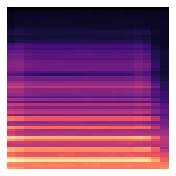

In [8]:
print('Working on subset from df_2')
generate_melspec(df_2)
print(time.ctime())

In [9]:
! ls /content/gdrive/MyDrive/trainpng4 | wc
! ls /content/gdrive/MyDrive/dumptrainpng2_new | wc
! pwd
! mv /content/gdrive/MyDrive/trainpng4/* /content/gdrive/MyDrive/dumptrainpng2_new/
! ls /content/gdrive/MyDrive/trainpng4 | wc
! ls /content/gdrive/MyDrive/dumptrainpng2_new | wc

   1999    1999   21486
   2000    2000   21487
/content/gdrive/MyDrive
      0       0       0
   3999    3999   42973


Working on subset from df_3
FileCount = 1: Working on spectogram /content/gdrive/MyDrive/trainpng4/351793.png
FileCount = 2: Working on spectogram /content/gdrive/MyDrive/trainpng4/20068.png
FileCount = 3: Working on spectogram /content/gdrive/MyDrive/trainpng4/259687.png
FileCount = 4: Working on spectogram /content/gdrive/MyDrive/trainpng4/157328.png
FileCount = 5: Working on spectogram /content/gdrive/MyDrive/trainpng4/368365.png
FileCount = 6: Working on spectogram /content/gdrive/MyDrive/trainpng4/151356.png
FileCount = 7: Working on spectogram /content/gdrive/MyDrive/trainpng4/151373.png
FileCount = 8: Working on spectogram /content/gdrive/MyDrive/trainpng4/137231.png
FileCount = 9: Working on spectogram /content/gdrive/MyDrive/trainpng4/7720.png
FileCount = 10: Working on spectogram /content/gdrive/MyDrive/trainpng4/326211.png
FileCount = 11: Working on spectogram /content/gdrive/MyDrive/trainpng4/325202.png
FileCount = 12: Working on spectogram /content/gdrive/MyDrive/trainpng4

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27649
  n_fft, y.shape[-1]


FileCount = 17: Working on spectogram /content/gdrive/MyDrive/trainpng4/405647.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18487
  n_fft, y.shape[-1]


FileCount = 18: Working on spectogram /content/gdrive/MyDrive/trainpng4/366792.png
FileCount = 19: Working on spectogram /content/gdrive/MyDrive/trainpng4/366807.png
FileCount = 20: Working on spectogram /content/gdrive/MyDrive/trainpng4/390414.png
FileCount = 21: Working on spectogram /content/gdrive/MyDrive/trainpng4/21914.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22050
  n_fft, y.shape[-1]


FileCount = 22: Working on spectogram /content/gdrive/MyDrive/trainpng4/378295.png
FileCount = 23: Working on spectogram /content/gdrive/MyDrive/trainpng4/156625.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26293
  n_fft, y.shape[-1]


FileCount = 24: Working on spectogram /content/gdrive/MyDrive/trainpng4/156628.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20066
  n_fft, y.shape[-1]


FileCount = 25: Working on spectogram /content/gdrive/MyDrive/trainpng4/49138.png
FileCount = 26: Working on spectogram /content/gdrive/MyDrive/trainpng4/49139.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33861
  n_fft, y.shape[-1]


FileCount = 27: Working on spectogram /content/gdrive/MyDrive/trainpng4/406336.png
FileCount = 28: Working on spectogram /content/gdrive/MyDrive/trainpng4/249811.png
FileCount = 29: Working on spectogram /content/gdrive/MyDrive/trainpng4/216088.png
FileCount = 30: Working on spectogram /content/gdrive/MyDrive/trainpng4/137256.png
FileCount = 31: Working on spectogram /content/gdrive/MyDrive/trainpng4/272453.png
FileCount = 32: Working on spectogram /content/gdrive/MyDrive/trainpng4/324690.png
FileCount = 33: Working on spectogram /content/gdrive/MyDrive/trainpng4/271471.png
FileCount = 34: Working on spectogram /content/gdrive/MyDrive/trainpng4/93346.png
FileCount = 35: Working on spectogram /content/gdrive/MyDrive/trainpng4/67786.png
FileCount = 36: Working on spectogram /content/gdrive/MyDrive/trainpng4/79064.png
FileCount = 37: Working on spectogram /content/gdrive/MyDrive/trainpng4/365800.png
FileCount = 38: Working on spectogram /content/gdrive/MyDrive/trainpng4/326904.png
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24997
  n_fft, y.shape[-1]


FileCount = 53: Working on spectogram /content/gdrive/MyDrive/trainpng4/366207.png
FileCount = 54: Working on spectogram /content/gdrive/MyDrive/trainpng4/371348.png
FileCount = 55: Working on spectogram /content/gdrive/MyDrive/trainpng4/408234.png
FileCount = 56: Working on spectogram /content/gdrive/MyDrive/trainpng4/90801.png
FileCount = 57: Working on spectogram /content/gdrive/MyDrive/trainpng4/267954.png
FileCount = 58: Working on spectogram /content/gdrive/MyDrive/trainpng4/416495.png
FileCount = 59: Working on spectogram /content/gdrive/MyDrive/trainpng4/433985.png
FileCount = 60: Working on spectogram /content/gdrive/MyDrive/trainpng4/159619.png
FileCount = 61: Working on spectogram /content/gdrive/MyDrive/trainpng4/118049.png
FileCount = 62: Working on spectogram /content/gdrive/MyDrive/trainpng4/429207.png
FileCount = 63: Working on spectogram /content/gdrive/MyDrive/trainpng4/429208.png
FileCount = 64: Working on spectogram /content/gdrive/MyDrive/trainpng4/326331.png
FileC

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35452
  n_fft, y.shape[-1]


FileCount = 97: Working on spectogram /content/gdrive/MyDrive/trainpng4/431773.png
FileCount = 98: Working on spectogram /content/gdrive/MyDrive/trainpng4/205982.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27008
  n_fft, y.shape[-1]


FileCount = 99: Working on spectogram /content/gdrive/MyDrive/trainpng4/205984.png
FileCount = 100: Working on spectogram /content/gdrive/MyDrive/trainpng4/26083.png
FileCount = 101: Working on spectogram /content/gdrive/MyDrive/trainpng4/269476.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28797
  n_fft, y.shape[-1]


FileCount = 102: Working on spectogram /content/gdrive/MyDrive/trainpng4/431774.png
FileCount = 103: Working on spectogram /content/gdrive/MyDrive/trainpng4/431777.png
FileCount = 104: Working on spectogram /content/gdrive/MyDrive/trainpng4/431779.png
FileCount = 105: Working on spectogram /content/gdrive/MyDrive/trainpng4/431780.png
FileCount = 106: Working on spectogram /content/gdrive/MyDrive/trainpng4/66488.png
FileCount = 107: Working on spectogram /content/gdrive/MyDrive/trainpng4/73443.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37760
  n_fft, y.shape[-1]


FileCount = 108: Working on spectogram /content/gdrive/MyDrive/trainpng4/73445.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16860
  n_fft, y.shape[-1]


FileCount = 109: Working on spectogram /content/gdrive/MyDrive/trainpng4/73453.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30464
  n_fft, y.shape[-1]


FileCount = 110: Working on spectogram /content/gdrive/MyDrive/trainpng4/73454.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14469
  n_fft, y.shape[-1]


FileCount = 111: Working on spectogram /content/gdrive/MyDrive/trainpng4/29938.png
FileCount = 112: Working on spectogram /content/gdrive/MyDrive/trainpng4/257777.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23424
  n_fft, y.shape[-1]


FileCount = 113: Working on spectogram /content/gdrive/MyDrive/trainpng4/73480.png
FileCount = 114: Working on spectogram /content/gdrive/MyDrive/trainpng4/73482.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19017
  n_fft, y.shape[-1]


FileCount = 115: Working on spectogram /content/gdrive/MyDrive/trainpng4/73485.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25353
  n_fft, y.shape[-1]


FileCount = 116: Working on spectogram /content/gdrive/MyDrive/trainpng4/271647.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20118
  n_fft, y.shape[-1]


FileCount = 117: Working on spectogram /content/gdrive/MyDrive/trainpng4/183159.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27730
  n_fft, y.shape[-1]


FileCount = 118: Working on spectogram /content/gdrive/MyDrive/trainpng4/183163.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13640
  n_fft, y.shape[-1]


FileCount = 119: Working on spectogram /content/gdrive/MyDrive/trainpng4/3536.png
FileCount = 120: Working on spectogram /content/gdrive/MyDrive/trainpng4/174101.png
FileCount = 121: Working on spectogram /content/gdrive/MyDrive/trainpng4/170585.png
FileCount = 122: Working on spectogram /content/gdrive/MyDrive/trainpng4/353883.png
FileCount = 123: Working on spectogram /content/gdrive/MyDrive/trainpng4/353884.png
FileCount = 124: Working on spectogram /content/gdrive/MyDrive/trainpng4/353885.png
FileCount = 125: Working on spectogram /content/gdrive/MyDrive/trainpng4/341793.png
FileCount = 126: Working on spectogram /content/gdrive/MyDrive/trainpng4/169288.png
FileCount = 127: Working on spectogram /content/gdrive/MyDrive/trainpng4/250230.png
FileCount = 128: Working on spectogram /content/gdrive/MyDrive/trainpng4/325539.png
FileCount = 129: Working on spectogram /content/gdrive/MyDrive/trainpng4/117250.png
FileCount = 130: Working on spectogram /content/gdrive/MyDrive/trainpng4/77241

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28614
  n_fft, y.shape[-1]


FileCount = 163: Working on spectogram /content/gdrive/MyDrive/trainpng4/253870.png
FileCount = 164: Working on spectogram /content/gdrive/MyDrive/trainpng4/397236.png
FileCount = 165: Working on spectogram /content/gdrive/MyDrive/trainpng4/362959.png
FileCount = 166: Working on spectogram /content/gdrive/MyDrive/trainpng4/32727.png
FileCount = 167: Working on spectogram /content/gdrive/MyDrive/trainpng4/322522.png
FileCount = 168: Working on spectogram /content/gdrive/MyDrive/trainpng4/17909.png
FileCount = 169: Working on spectogram /content/gdrive/MyDrive/trainpng4/191990.png
Fri Apr 29 08:27:45 2022


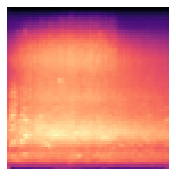

In [10]:
print('Working on subset from df_3')
generate_melspec(df_3)
print(time.ctime())


In [11]:
! ls /content/gdrive/MyDrive/trainpng4 | wc
! ls /content/gdrive/MyDrive/dumptrainpng2_new | wc
! pwd
! mv /content/gdrive/MyDrive/trainpng4/* /content/gdrive/MyDrive/dumptrainpng2_new/
! ls /content/gdrive/MyDrive/trainpng4 | wc
! ls /content/gdrive/MyDrive/dumptrainpng2_new | wc

    169     169    1810
   3999    3999   42973
/content/gdrive/MyDrive
      0       0       0
   4168    4168   44783
